# **CLASSIFICATION PROJECT** #

## ***PREDICTING LIVER DISEASE*** ##

File : project-data.csv

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, scale
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.over_sampling import SMOTE,  ADASYN
import xgboost as xgb

import tf
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout

from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV


import warnings
warnings.filterwarnings('ignore')
palette_color = sns.color_palette('rainbow')

### **Importing data from file project-data.csv** ###

In [2]:
# Reading the data from the file 'project-data.csv'
ldc_orig_data = pd.read_csv("project-data.csv",delimiter=";")
ldc_orig_data.head()

category  age sex  albumin  alkaline_phosphatase  \
0   no_disease   32   m     38.5                  52.5   
1   no_disease   32   m     38.5                  70.3   
2   no_disease   32   m     46.9                  74.7   
3   no_disease   32   m     43.2                  52.0   
4   no_disease   32   m     39.2                  74.1   

   alanine_aminotransferase  aspartate_aminotransferase  bilirubin  \
0                       7.7                        22.1        7.5   
1                      18.0                        24.7        3.9   
2                      36.2                        52.6        6.1   
3                      30.6                        22.6       18.9   
4                      32.6                        24.8        9.6   

   cholinesterase  cholesterol  creatinina  gamma_glutamyl_transferase   \
0            6.93         3.23       106.0                         12.1   
1           11.17         4.80        74.0                         15.6   
2            8.84         5.20        86.0                         33.2   
3            7.33         4.74        80.0                         33.8   
4            9.15         4.32        76.0                         29.9   

  protein     
0         69  
1       76.5  
2       79.3  
3       75.7  
4       68.7

In [3]:
ldc_orig_data.shape

(615, 13)

#### *Descriptive Analysis* ####

In [4]:
ldc_orig_data.describe()

age     albumin  alkaline_phosphatase  alanine_aminotransferase  \
count  615.000000  614.000000            597.000000                614.000000   
mean    47.408130   41.620195             68.283920                 28.450814   
std     10.055105    5.780629             26.028315                 25.469689   
min     19.000000   14.900000             11.300000                  0.900000   
25%     39.000000   38.800000             52.500000                 16.400000   
50%     47.000000   41.950000             66.200000                 23.000000   
75%     54.000000   45.200000             80.100000                 33.075000   
max     77.000000   82.200000            416.600000                325.300000   

       aspartate_aminotransferase   bilirubin  cholinesterase  cholesterol  \
count                  615.000000  615.000000      615.000000   605.000000   
mean                    34.786341   11.396748        8.196634     5.368099   
std                     33.090690   19.673150        2.205657     1.132728   
min                     10.600000    0.800000        1.420000     1.430000   
25%                     21.600000    5.300000        6.935000     4.610000   
50%                     25.900000    7.300000        8.260000     5.300000   
75%                     32.900000   11.200000        9.590000     6.060000   
max                    324.000000  254.000000       16.410000     9.670000   

        creatinina  gamma_glutamyl_transferase   
count   615.000000                   615.000000  
mean     81.287805                    39.533171  
std      49.756166                    54.661071  
min       8.000000                     4.500000  
25%      67.000000                    15.700000  
50%      77.000000                    23.300000  
75%      88.000000                    40.200000  
max    1079.100000                   650.900000

In [5]:
ldc_orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   category                     615 non-null    object 
 1   age                          615 non-null    int64  
 2   sex                          615 non-null    object 
 3   albumin                      614 non-null    float64
 4   alkaline_phosphatase         597 non-null    float64
 5   alanine_aminotransferase     614 non-null    float64
 6   aspartate_aminotransferase   615 non-null    float64
 7   bilirubin                    615 non-null    float64
 8   cholinesterase               615 non-null    float64
 9   cholesterol                  605 non-null    float64
 10  creatinina                   615 non-null    float64
 11  gamma_glutamyl_transferase   615 non-null    float64
 12  protein                      615 non-null    object 
dtypes: float64(9), int64

#### *Checking for missing values* ####

In [6]:
# check for missing values
ldc_orig_data.isna().sum() # The result shows that there are no missing values


category                        0
age                             0
sex                             0
albumin                         1
alkaline_phosphatase           18
alanine_aminotransferase        1
aspartate_aminotransferase      0
bilirubin                       0
cholinesterase                  0
cholesterol                    10
creatinina                      0
gamma_glutamyl_transferase      0
protein                         0
dtype: int64

In [7]:
# Creating a replicate 'ldc_data' of the original DataFrame 'ldc_orig_data'
ldc_data = ldc_orig_data.copy()

In [8]:
# Dropping the missing values
ldc_data = ldc_data.dropna()
ldc_data.isna().sum() # The result shows that there are no missing values


category                       0
age                            0
sex                            0
albumin                        0
alkaline_phosphatase           0
alanine_aminotransferase       0
aspartate_aminotransferase     0
bilirubin                      0
cholinesterase                 0
cholesterol                    0
creatinina                     0
gamma_glutamyl_transferase     0
protein                        0
dtype: int64

#### *Checking for Null Values* ####

In [9]:
# Checking to see if there are any null values
# We can get this information using fraud_orig_data.info() option as well
ldc_data.isnull().sum() # The result shows that there are no null values

category                       0
age                            0
sex                            0
albumin                        0
alkaline_phosphatase           0
alanine_aminotransferase       0
aspartate_aminotransferase     0
bilirubin                      0
cholinesterase                 0
cholesterol                    0
creatinina                     0
gamma_glutamyl_transferase     0
protein                        0
dtype: int64

#### *Checking for duplicates* ####

In [10]:
# Checking for Duplicate Values
ldc_data.duplicated()  # if any 2 rows has same values

0      False
1      False
2      False
3      False
4      False
       ...  
608    False
609    False
610    False
611    False
612    False
Length: 589, dtype: bool

In [11]:
# Count of duplicated rows
ldc_data[ldc_data.duplicated()].shape # We see that there are no duplicate

(0, 13)

In [12]:
# Print the duplicated rows. Since we have duplicates it will show us the record
ldc_data[ldc_data.duplicated()] # We don't find any duplicates

Empty DataFrame
Columns: [category, age, sex, albumin, alkaline_phosphatase, alanine_aminotransferase, aspartate_aminotransferase, bilirubin, cholinesterase, cholesterol, creatinina, gamma_glutamyl_transferase , protein   ]
Index: []

#### *Rename Columns* ####

In [13]:
# Renaming column names
ldc_data.rename(columns = {'category':'CATEGORY','age': 'AGE','sex':'SEX','albumin':'ALBUMIN','alkaline_phosphatase':'ALKAL_PHOS','alanine_aminotransferase':'ALAN_AMIN','aspartate_aminotransferase':'ASPA_AMINO','bilirubin':'BILIRUBIN','cholinesterase':'CHOLI','cholesterol':'CHOLESTEROL','creatinina':'CREATININA','gamma_glutamyl_transferase ':'GAMMA_GLU_TRAN','protein   ':'PROTEIN'}, inplace = True)
ldc_data.head()

CATEGORY  AGE SEX  ALBUMIN  ALKAL_PHOS  ALAN_AMIN  ASPA_AMINO  \
0   no_disease   32   m     38.5        52.5        7.7        22.1   
1   no_disease   32   m     38.5        70.3       18.0        24.7   
2   no_disease   32   m     46.9        74.7       36.2        52.6   
3   no_disease   32   m     43.2        52.0       30.6        22.6   
4   no_disease   32   m     39.2        74.1       32.6        24.8   

   BILIRUBIN  CHOLI  CHOLESTEROL  CREATININA  GAMMA_GLU_TRAN PROTEIN  
0        7.5   6.93         3.23       106.0            12.1      69  
1        3.9  11.17         4.80        74.0            15.6    76.5  
2        6.1   8.84         5.20        86.0            33.2    79.3  
3       18.9   7.33         4.74        80.0            33.8    75.7  
4        9.6   9.15         4.32        76.0            29.9    68.7

#### *Checking the data structure* ####

In [14]:
# Data Structure
print(type(ldc_data))
ldc_data.shape

<class 'pandas.core.frame.DataFrame'>


(589, 13)

In [15]:
# Checking data types
ldc_data.dtypes # check data types of all variables

CATEGORY           object
AGE                 int64
SEX                object
ALBUMIN           float64
ALKAL_PHOS        float64
ALAN_AMIN         float64
ASPA_AMINO        float64
BILIRUBIN         float64
CHOLI             float64
CHOLESTEROL       float64
CREATININA        float64
GAMMA_GLU_TRAN    float64
PROTEIN            object
dtype: object

In [16]:
ldc_data['PROTEIN'] = ldc_data['PROTEIN'].astype('float64')

In [17]:
# Checking data types
ldc_data.dtypes # check data types of all variables

CATEGORY           object
AGE                 int64
SEX                object
ALBUMIN           float64
ALKAL_PHOS        float64
ALAN_AMIN         float64
ASPA_AMINO        float64
BILIRUBIN         float64
CHOLI             float64
CHOLESTEROL       float64
CREATININA        float64
GAMMA_GLU_TRAN    float64
PROTEIN           float64
dtype: object

#### *Removing spaces seen before text for the column 'category'* ####

In [18]:
ldc_data['CATEGORY'] = ldc_data['CATEGORY'].str.replace(' ', '')

In [19]:
# Changing the 'CATEGORY' and 'SEX' columns to categorical columns
for col in ['CATEGORY', 'SEX']:
    ldc_data[col] = ldc_data[col].astype('category')

#### ***Segregating the columns into Numeric and Non-Numeric*** ####

In [20]:
ldc_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 589 entries, 0 to 612
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   CATEGORY        589 non-null    category
 1   AGE             589 non-null    int64   
 2   SEX             589 non-null    category
 3   ALBUMIN         589 non-null    float64 
 4   ALKAL_PHOS      589 non-null    float64 
 5   ALAN_AMIN       589 non-null    float64 
 6   ASPA_AMINO      589 non-null    float64 
 7   BILIRUBIN       589 non-null    float64 
 8   CHOLI           589 non-null    float64 
 9   CHOLESTEROL     589 non-null    float64 
 10  CREATININA      589 non-null    float64 
 11  GAMMA_GLU_TRAN  589 non-null    float64 
 12  PROTEIN         589 non-null    float64 
dtypes: category(2), float64(10), int64(1)
memory usage: 56.7 KB


In [21]:
categorical_cols = []
numeric_cols = []
for columns in ldc_data.columns:
      if ((ldc_data[columns].dtypes == 'object') or (ldc_data[columns].dtypes == 'category')):
            categorical_cols.append(columns)
            print(f"There are {len(ldc_data[columns].unique())} unique values in the categorical column name '{columns}'")
      elif ((ldc_data[columns].dtypes != 'object') and (ldc_data[columns].dtypes != 'category')):
            numeric_cols.append(columns)

print("\nThe categorical columns are: ",categorical_cols,"\n")
print("The numeric columns are: ",numeric_cols,"\n")

There are 5 unique values in the categorical column name 'CATEGORY'
There are 2 unique values in the categorical column name 'SEX'

The categorical columns are:  ['CATEGORY', 'SEX'] 

The numeric columns are:  ['AGE', 'ALBUMIN', 'ALKAL_PHOS', 'ALAN_AMIN', 'ASPA_AMINO', 'BILIRUBIN', 'CHOLI', 'CHOLESTEROL', 'CREATININA', 'GAMMA_GLU_TRAN', 'PROTEIN'] 



In [22]:
# Categorical variables
for columns in ldc_data[categorical_cols].columns:
        unique_count = len(ldc_data[columns].unique())
        print("\n------------------------------------------")
        print(f"There are {unique_count} unique columns in the column name '{columns}'")
        print("\n",ldc_data[columns].value_counts())


------------------------------------------
There are 5 unique columns in the column name 'CATEGORY'

 CATEGORY
no_disease         526
cirrhosis           24
hepatitis           20
fibrosis            12
suspect_disease      7
Name: count, dtype: int64

------------------------------------------
There are 2 unique columns in the column name 'SEX'

 SEX
m    363
f    226
Name: count, dtype: int64


In [23]:
ldc_data[numeric_cols].head()

AGE  ALBUMIN  ALKAL_PHOS  ALAN_AMIN  ASPA_AMINO  BILIRUBIN  CHOLI  \
0   32     38.5        52.5        7.7        22.1        7.5   6.93   
1   32     38.5        70.3       18.0        24.7        3.9  11.17   
2   32     46.9        74.7       36.2        52.6        6.1   8.84   
3   32     43.2        52.0       30.6        22.6       18.9   7.33   
4   32     39.2        74.1       32.6        24.8        9.6   9.15   

   CHOLESTEROL  CREATININA  GAMMA_GLU_TRAN  PROTEIN  
0         3.23       106.0            12.1     69.0  
1         4.80        74.0            15.6     76.5  
2         5.20        86.0            33.2     79.3  
3         4.74        80.0            33.8     75.7  
4         4.32        76.0            29.9     68.7

In [24]:
ldc_data[categorical_cols].head()

CATEGORY SEX
0  no_disease   m
1  no_disease   m
2  no_disease   m
3  no_disease   m
4  no_disease   m

In [25]:
# Creating dataframes for both categorical data as well as numeric data
ldc_cat_ldc_data = pd.DataFrame()
ldc_num_ldc_data = pd.DataFrame()

ldc_cat_ldc_data = ldc_data[categorical_cols]
ldc_num_ldc_data = ldc_data[numeric_cols]

print(f"The numerical data is - \n{ldc_num_ldc_data.head()}\n\nThe categorical data is - \n{ldc_cat_ldc_data.head()}")

The numerical data is - 
   AGE  ALBUMIN  ALKAL_PHOS  ALAN_AMIN  ASPA_AMINO  BILIRUBIN  CHOLI  \
0   32     38.5        52.5        7.7        22.1        7.5   6.93   
1   32     38.5        70.3       18.0        24.7        3.9  11.17   
2   32     46.9        74.7       36.2        52.6        6.1   8.84   
3   32     43.2        52.0       30.6        22.6       18.9   7.33   
4   32     39.2        74.1       32.6        24.8        9.6   9.15   

   CHOLESTEROL  CREATININA  GAMMA_GLU_TRAN  PROTEIN  
0         3.23       106.0            12.1     69.0  
1         4.80        74.0            15.6     76.5  
2         5.20        86.0            33.2     79.3  
3         4.74        80.0            33.8     75.7  
4         4.32        76.0            29.9     68.7  

The categorical data is - 
     CATEGORY SEX
0  no_disease   m
1  no_disease   m
2  no_disease   m
3  no_disease   m
4  no_disease   m


In [26]:
ldc_num_ldc_data.head()

AGE  ALBUMIN  ALKAL_PHOS  ALAN_AMIN  ASPA_AMINO  BILIRUBIN  CHOLI  \
0   32     38.5        52.5        7.7        22.1        7.5   6.93   
1   32     38.5        70.3       18.0        24.7        3.9  11.17   
2   32     46.9        74.7       36.2        52.6        6.1   8.84   
3   32     43.2        52.0       30.6        22.6       18.9   7.33   
4   32     39.2        74.1       32.6        24.8        9.6   9.15   

   CHOLESTEROL  CREATININA  GAMMA_GLU_TRAN  PROTEIN  
0         3.23       106.0            12.1     69.0  
1         4.80        74.0            15.6     76.5  
2         5.20        86.0            33.2     79.3  
3         4.74        80.0            33.8     75.7  
4         4.32        76.0            29.9     68.7

In [27]:
ldc_cat_ldc_data

CATEGORY SEX
0    no_disease   m
1    no_disease   m
2    no_disease   m
3    no_disease   m
4    no_disease   m
..          ...  ..
608   cirrhosis   f
609   cirrhosis   f
610   cirrhosis   f
611   cirrhosis   f
612   cirrhosis   f

[589 rows x 2 columns]

In [28]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(ldc_data, title="Profiling Report")
# profile

### **Visualizations** ###

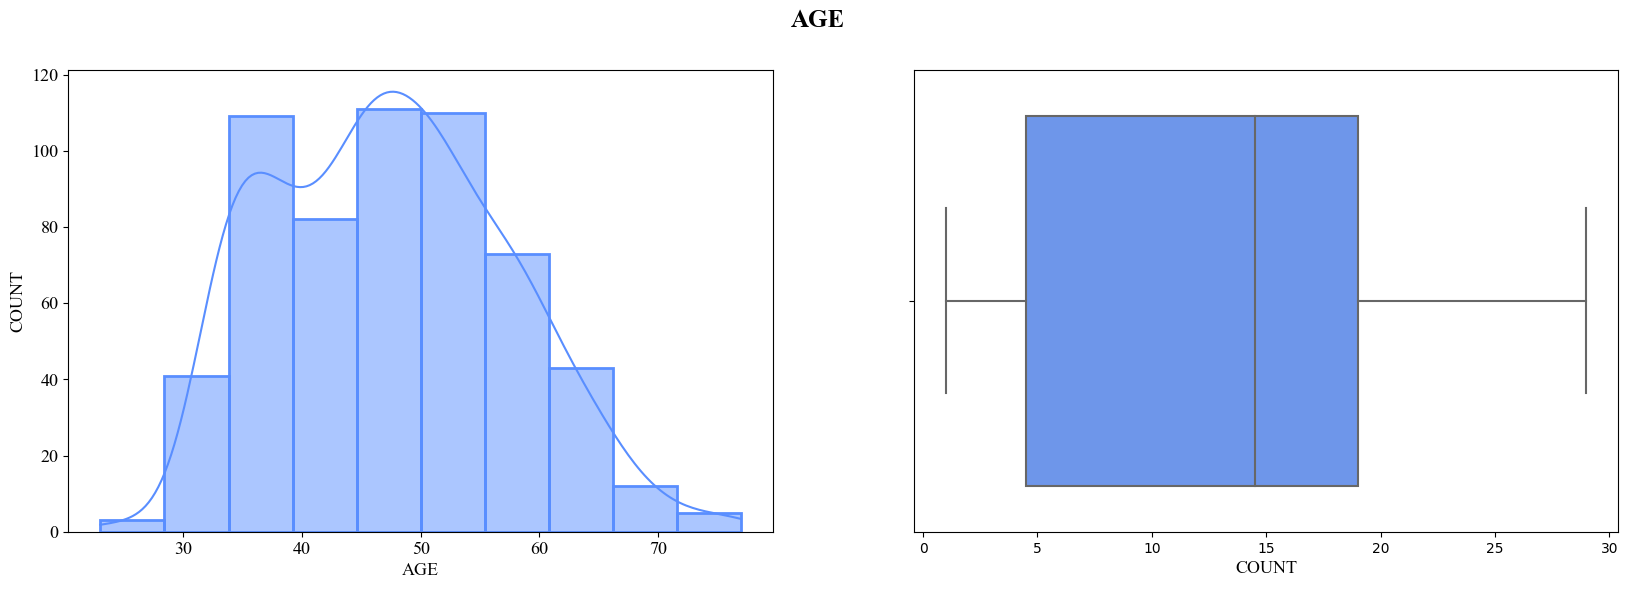

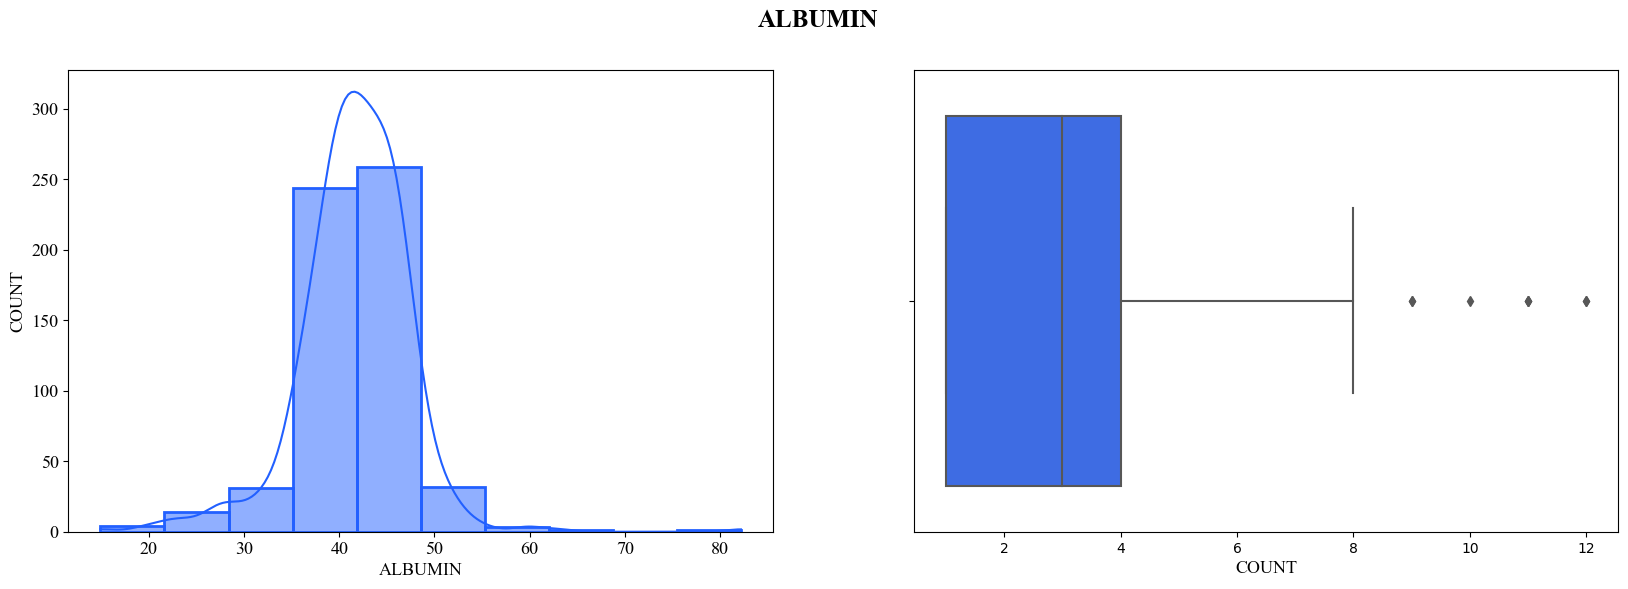

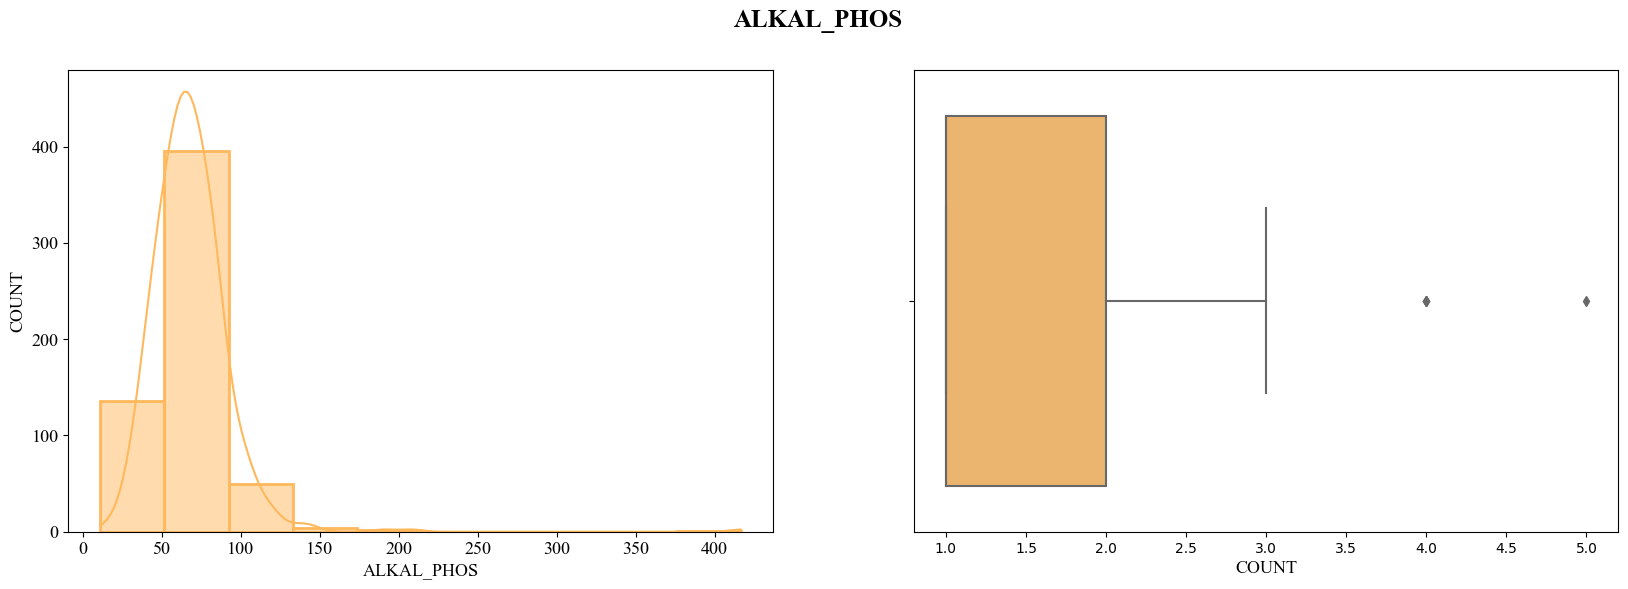

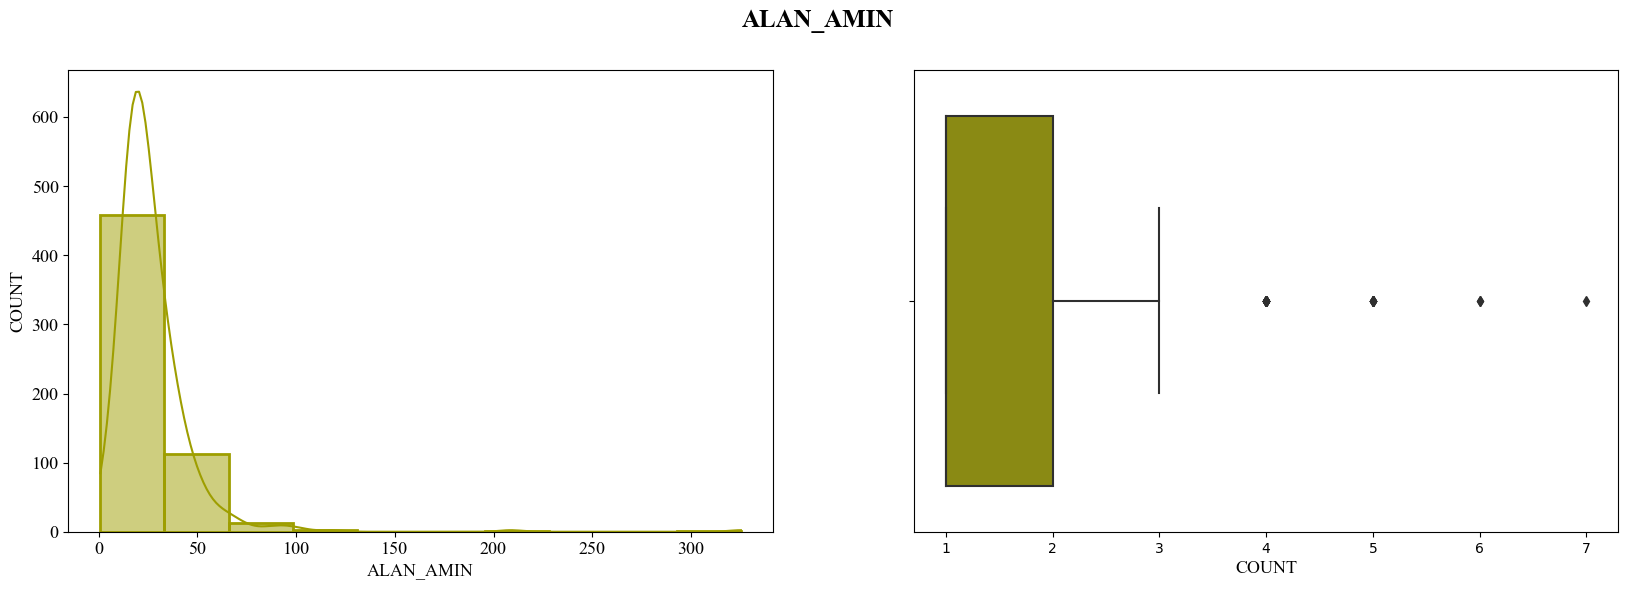

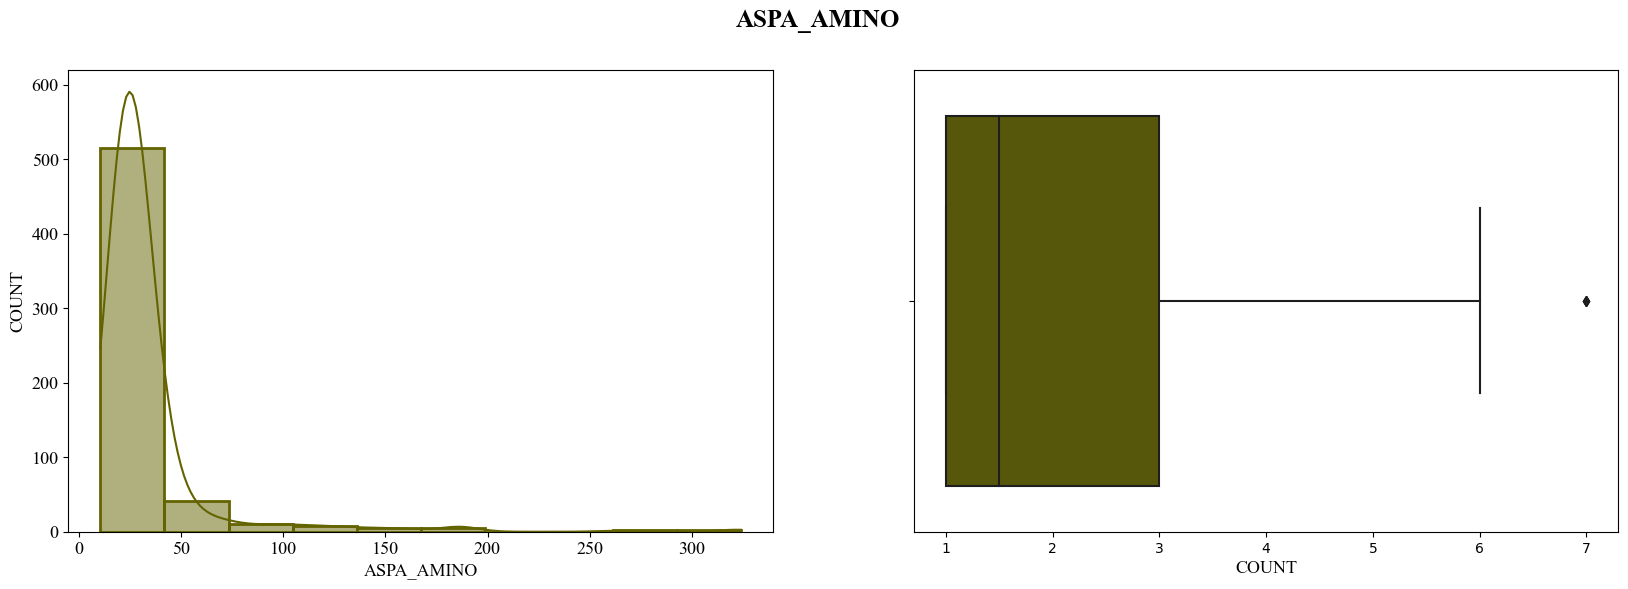

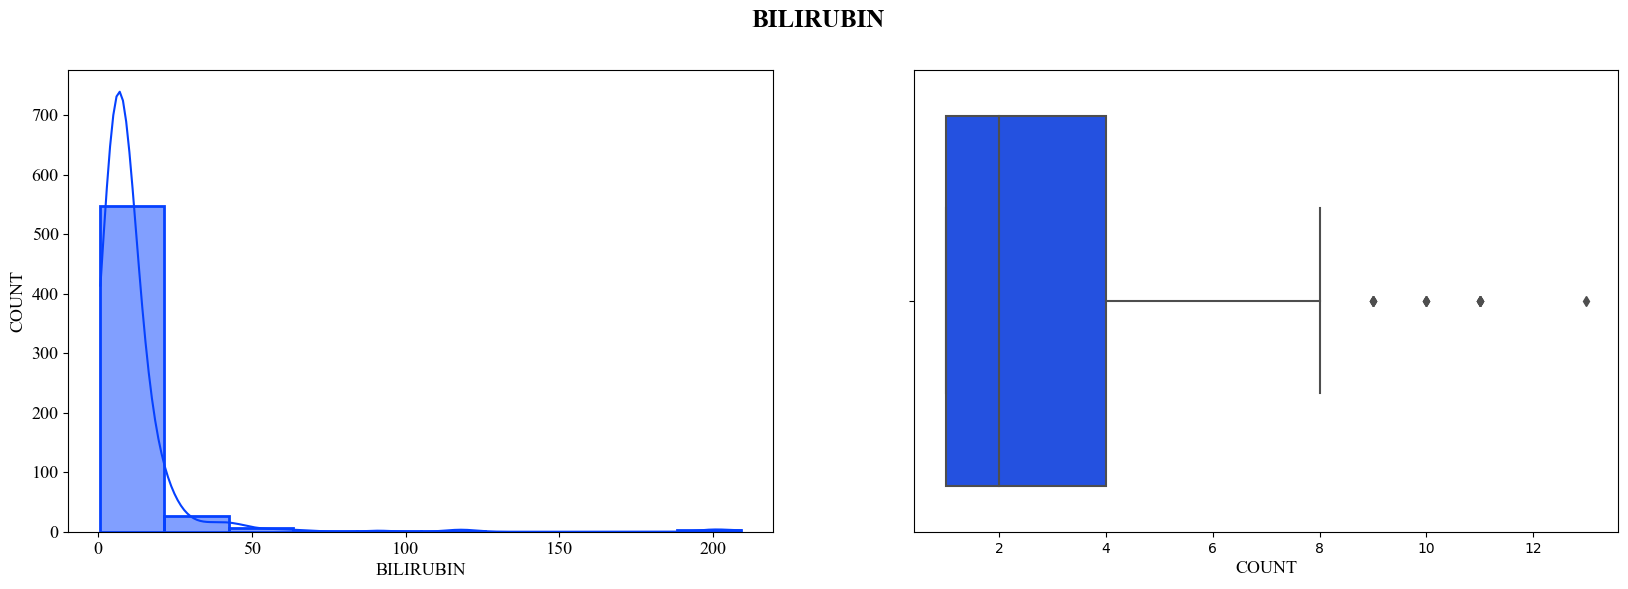

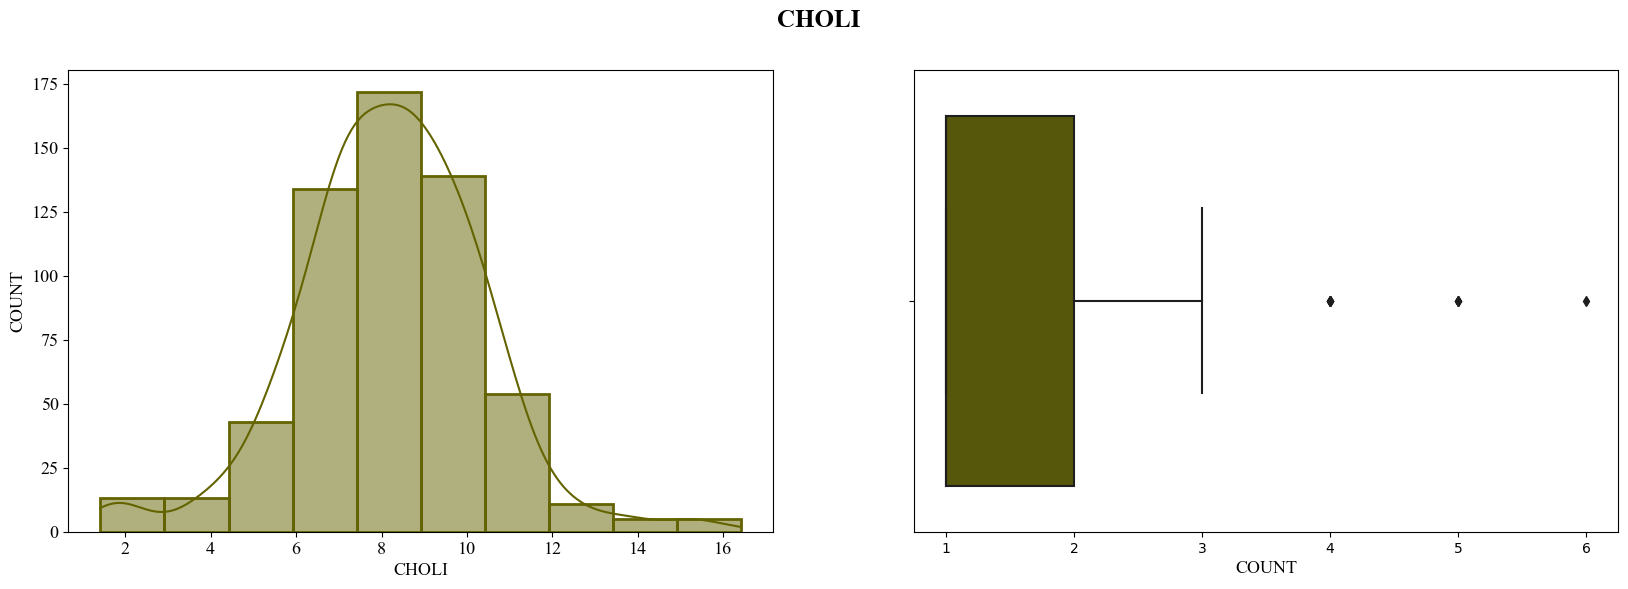

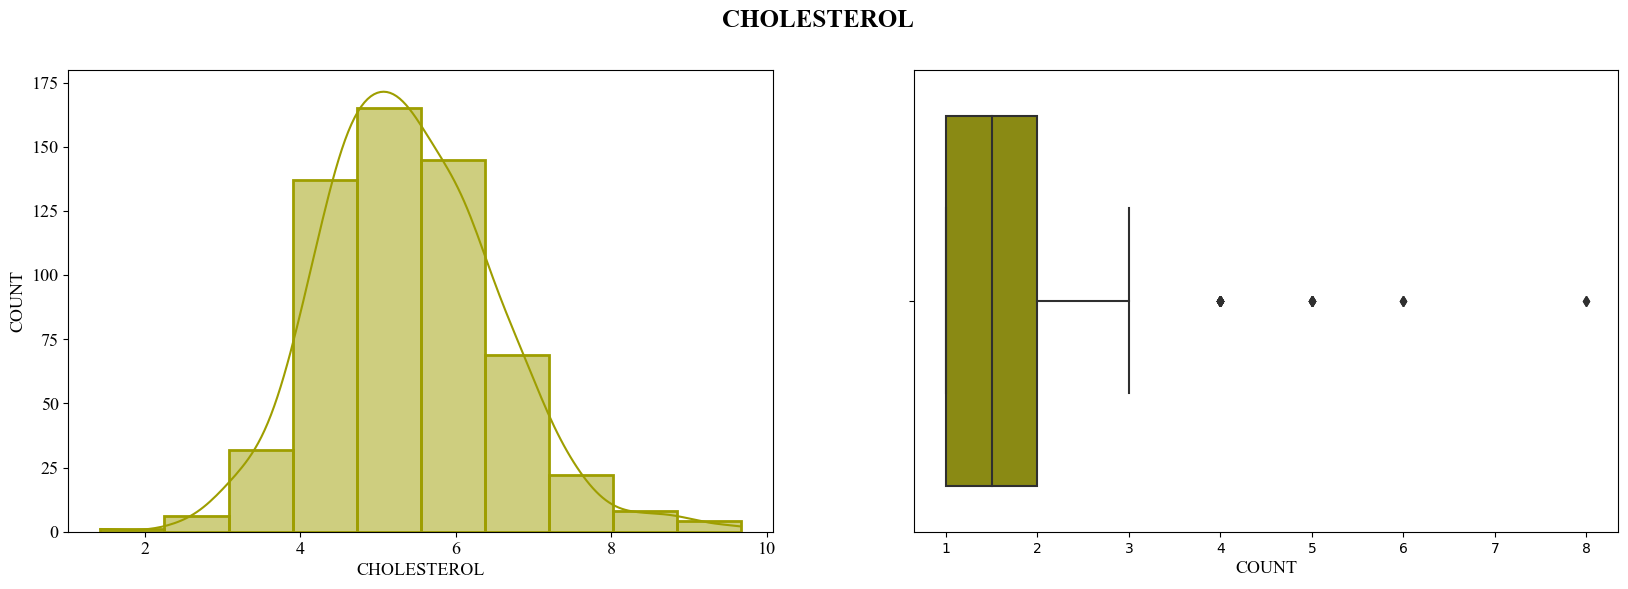

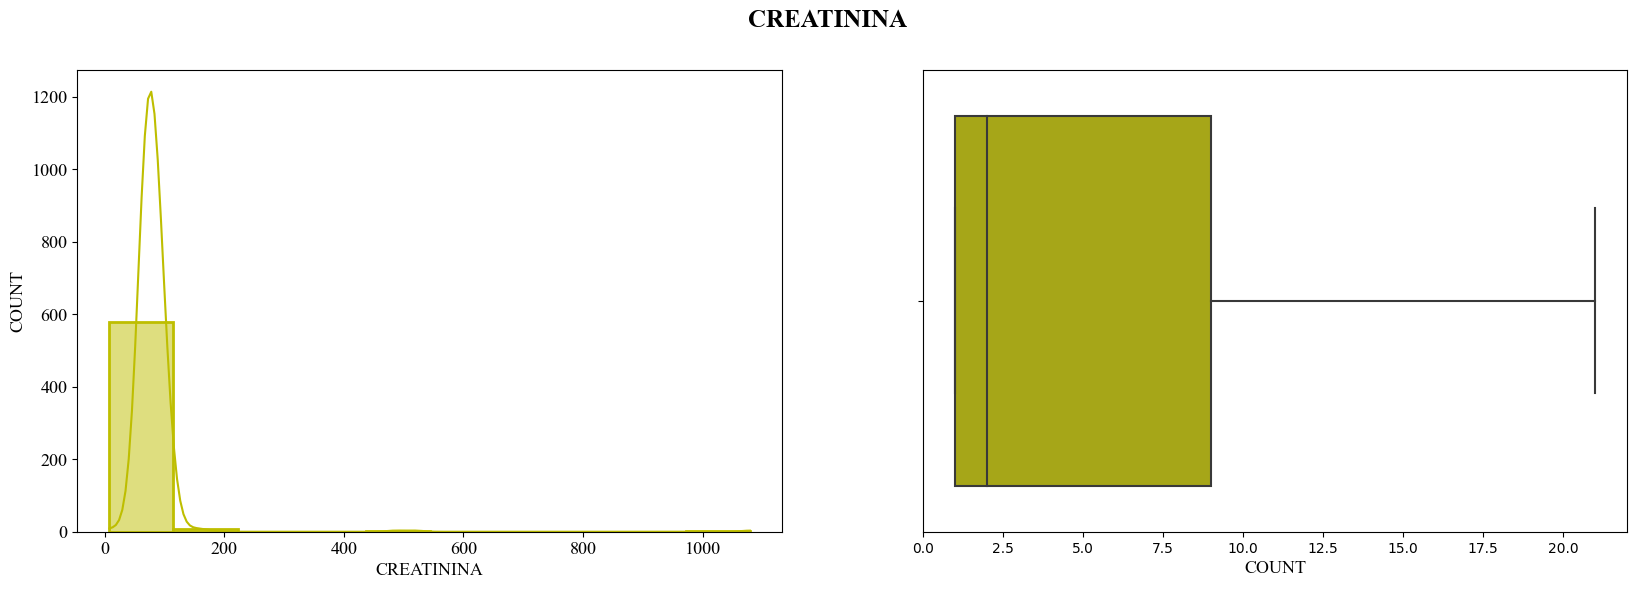

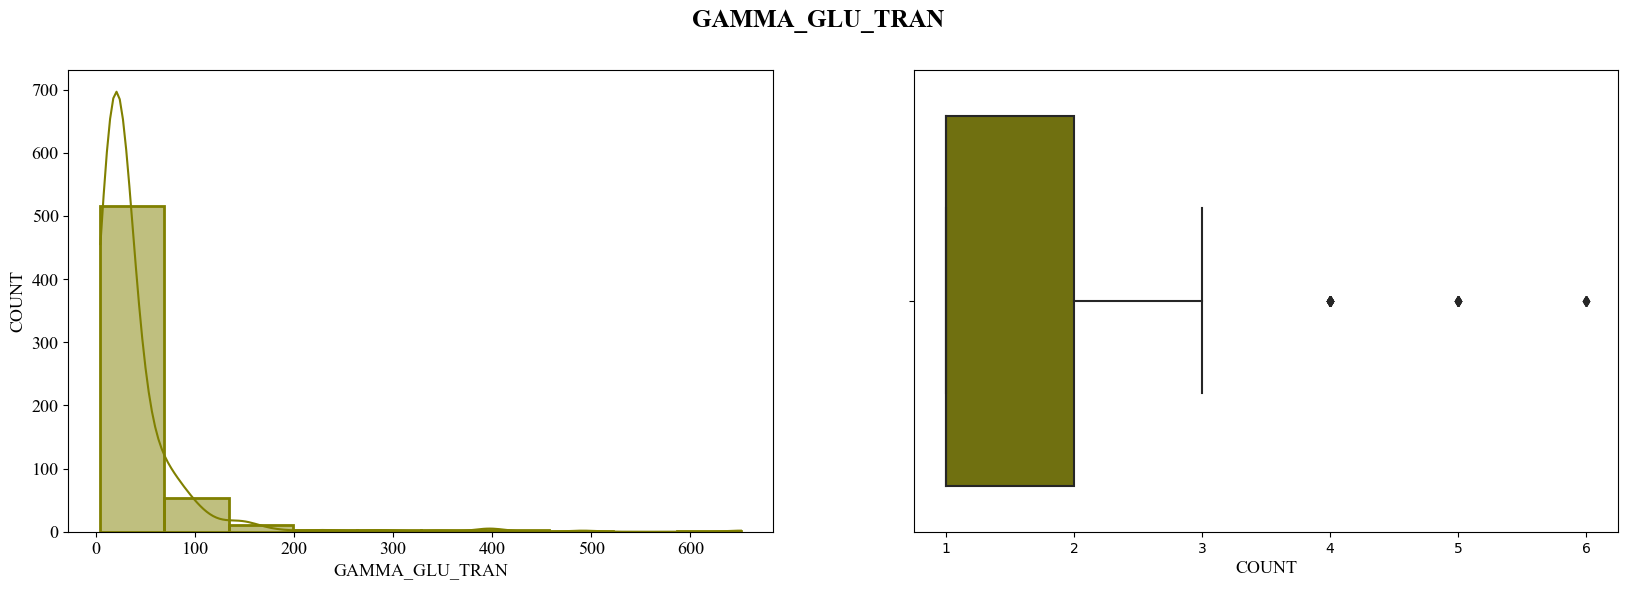

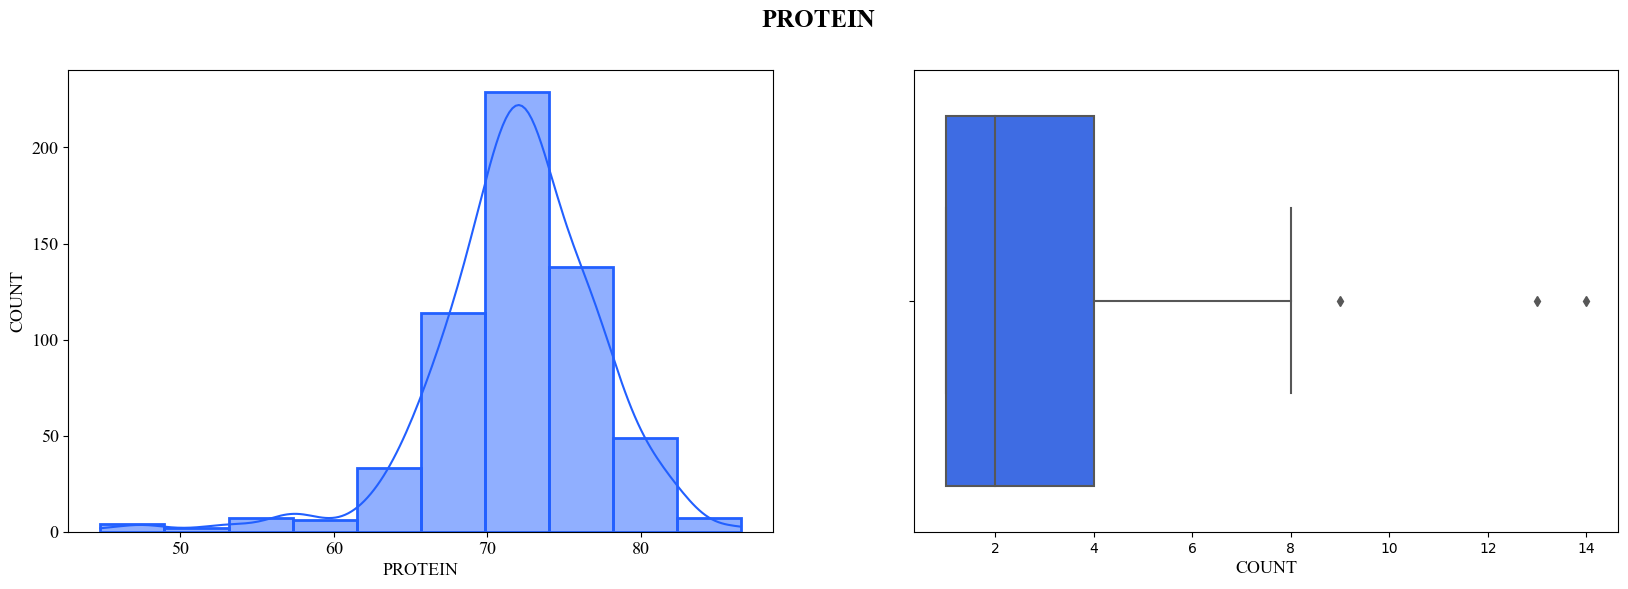

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    plot = sns.histplot(data, x=feature, color=color, edgecolor=color, linewidth=2, bins=10, kde=True)
    plt.xticks(rotation=0, fontfamily = "Times New Roman", size = '13')
    plt.yticks(rotation=0, fontfamily = "Times New Roman", size = '13')
    plt.xlabel(feature, rotation=0, fontfamily = "Times New Roman", size = '13')
    plt.ylabel("COUNT", rotation=90, fontfamily = "Times New Roman", size = '13')
    # plt.ylabel(rotation=0, fontfamily = "Times New Roman", size = '13')

    plt.subplot(1,2,2)
    sns.boxplot(x=data[feature].value_counts(), color=color)
    plt.setp(plot.get_xticklabels(), rotation=0, fontfamily = "Times New Roman", size = '13')
    plt.setp(plot.get_yticklabels(), rotation=0, fontfamily = "Times New Roman", size = '13')
    plt.xlabel("COUNT", rotation=0, fontfamily = "Times New Roman", size = '13')
    plt.suptitle(feature, weight='bold', fontfamily = "Times New Roman", size = '18')

for n_cols in ldc_num_ldc_data:
    colors = ['#4c9a47','#90c08c','#598eff','#636300','#74a3ff','#bebe00','#7ab375','#808000','#0541ff','#9e9e00','#ffc274','#de8f00','#64a65e','#2260ff','#ffb85c','#3e78ff']
    color = random.choice(colors)
    plot_data(ldc_num_ldc_data,n_cols)

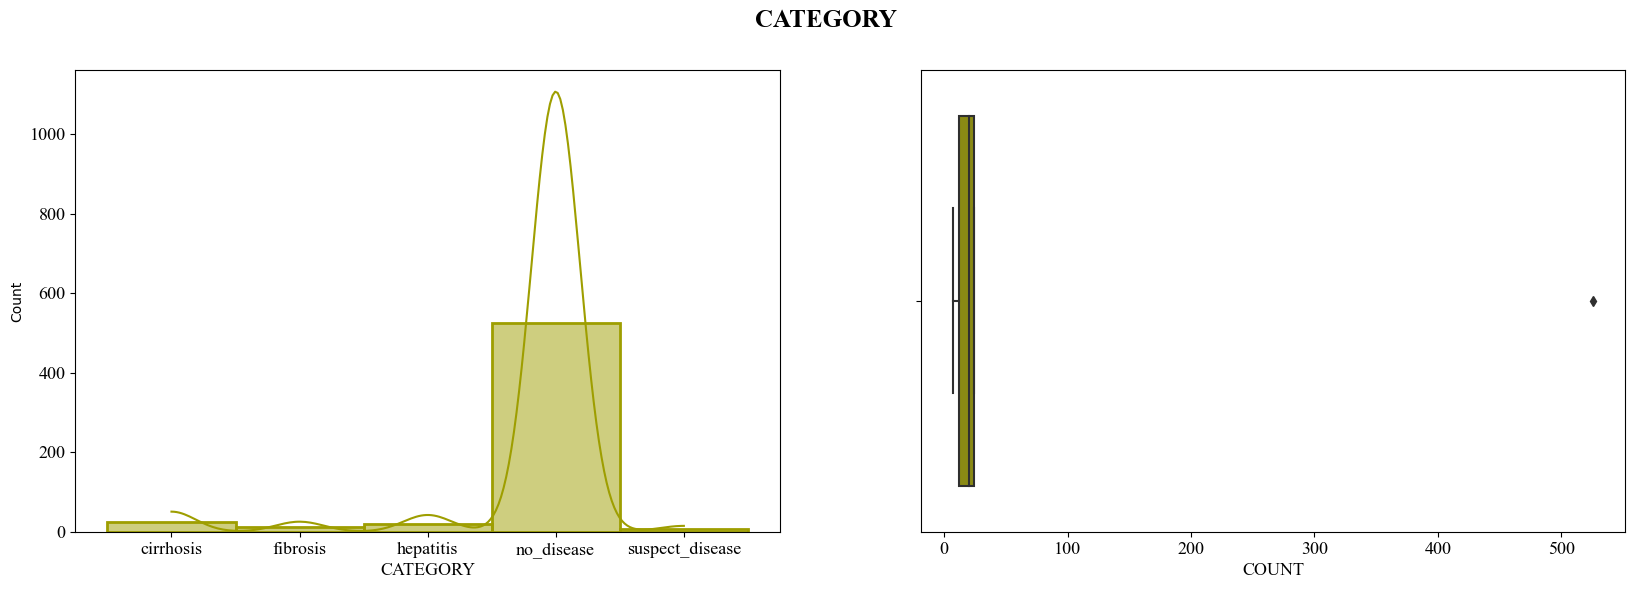

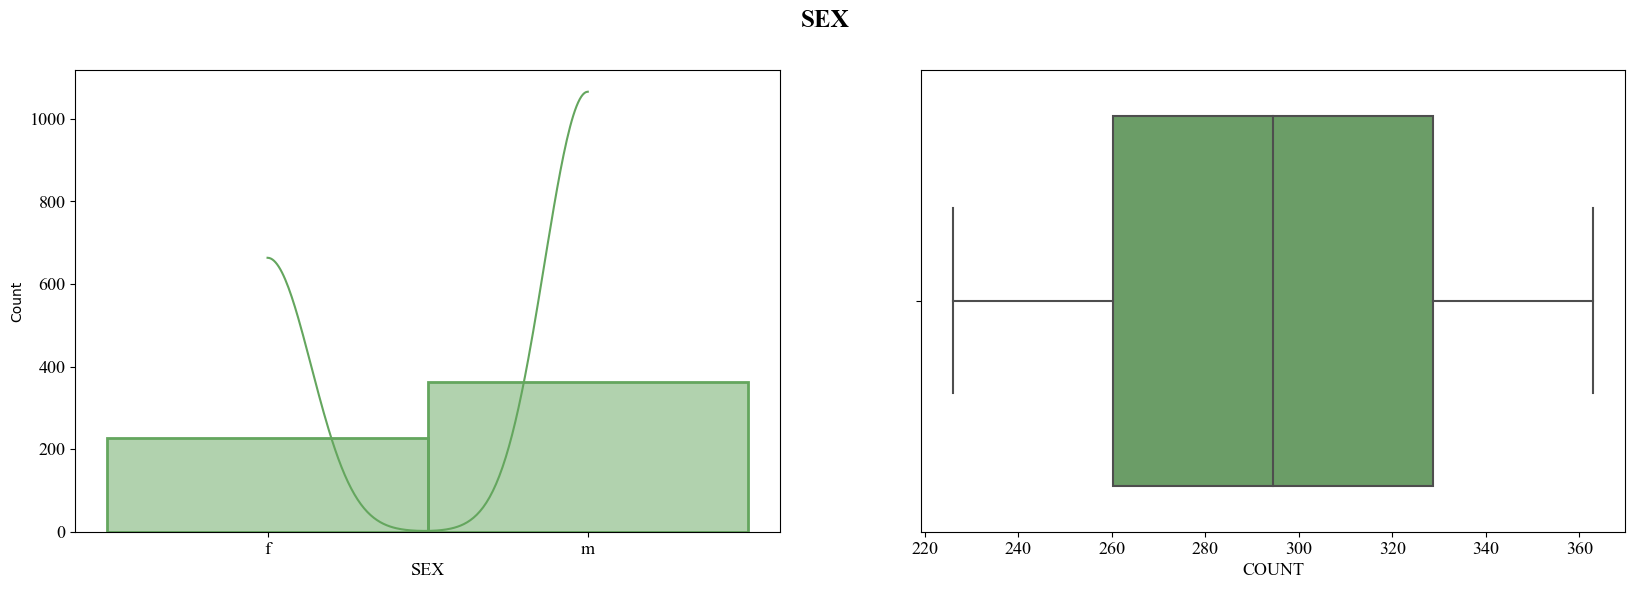

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    plt.xticks(rotation=0, fontfamily = "Times New Roman", size = '13')
    plt.yticks(rotation=0, fontfamily = "Times New Roman", size = '13')
    plt.xlabel("COUNT", rotation=90, fontfamily = "Times New Roman", size = '13')
    plt.xlabel(feature, rotation=0, fontfamily = "Times New Roman", size = '13')
    plot = sns.histplot(data, x=feature, color=color, edgecolor=color, linewidth=2, bins=10, kde=True)

    plt.subplot(1,2,2)
    sns.boxplot(x=data[feature].value_counts(), color=color)
    plt.xticks(rotation=0, fontfamily = "Times New Roman", size = '13')
    plt.xlabel("COUNT", rotation=0, fontfamily = "Times New Roman", size = '13')
    plt.suptitle(feature, weight='bold', fontfamily = "Times New Roman", size = '18')

for c_cols in ldc_cat_ldc_data:
    colors = ['#4c9a47','#90c08c','#598eff','#636300','#74a3ff','#bebe00','#7ab375','#808000','#0541ff','#9e9e00','#ffc274','#de8f00','#64a65e','#2260ff','#ffb85c','#3e78ff']
    color = random.choice(colors)
    plot_data(ldc_cat_ldc_data,c_cols)

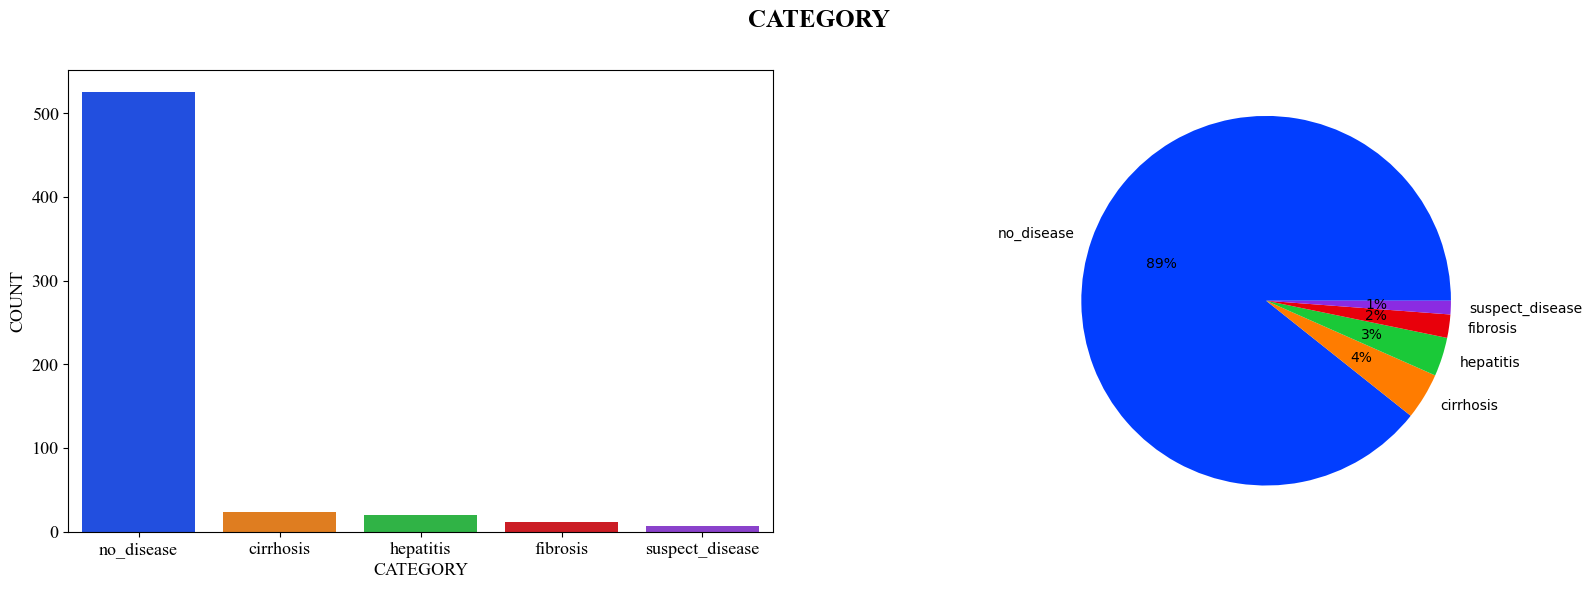

In [31]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
palette_color = sns.color_palette('bright')
sns.countplot(x='CATEGORY', data=ldc_cat_ldc_data, palette = palette_color, order=ldc_cat_ldc_data['CATEGORY'].value_counts().index )
plt.xticks(rotation=0, fontfamily = "Times New Roman", size = '13')
plt.yticks(rotation=0, fontfamily = "Times New Roman", size = '13')
plt.ylabel("COUNT", rotation=90, fontfamily = "Times New Roman", size = '13')
plt.xlabel('CATEGORY', rotation=0, fontfamily = "Times New Roman", size = '13')

# Display state data in a form of Pie Graph
plt.subplot(1,2,2)
values = ldc_cat_ldc_data['CATEGORY'].value_counts().keys().tolist()
counts = ldc_cat_ldc_data['CATEGORY'].value_counts().tolist()
plt.pie(ldc_cat_ldc_data['CATEGORY'].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%')

plt.suptitle('CATEGORY', weight='bold', rotation=0, fontfamily = "Times New Roman", size = '18')

plt.show()

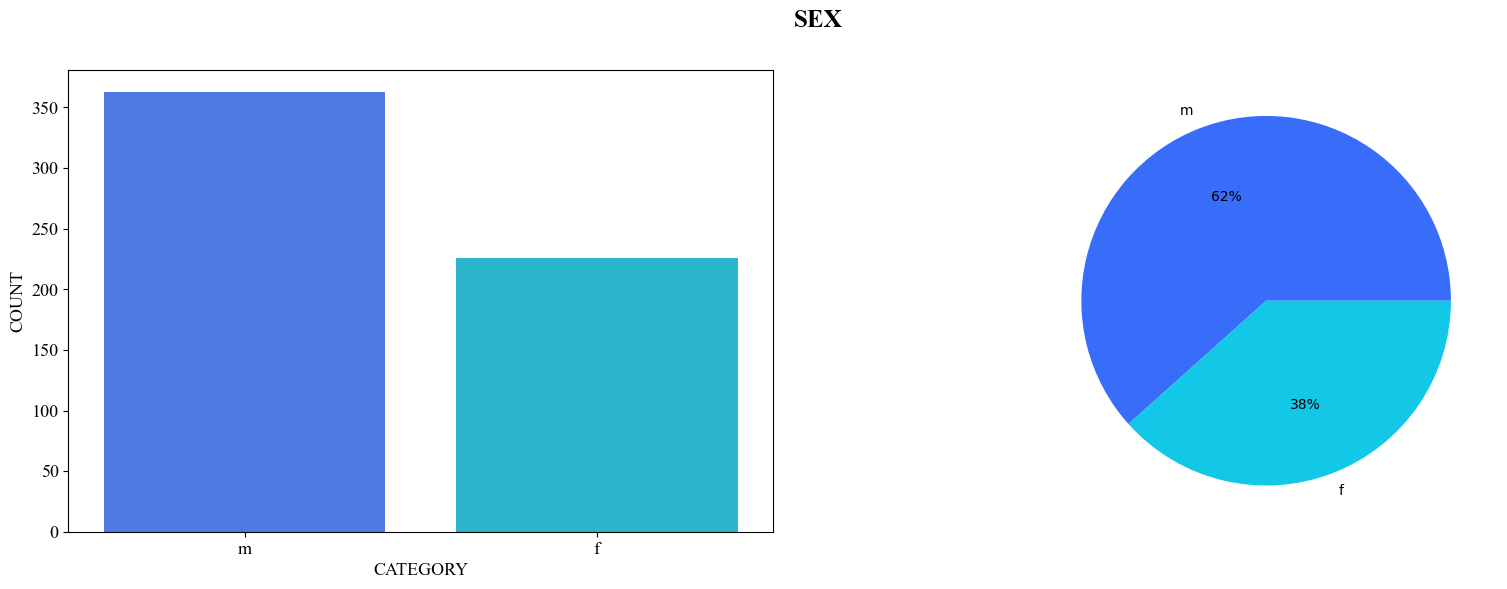

In [32]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
palette_color = sns.color_palette('rainbow')
sns.countplot(x='SEX', data=ldc_cat_ldc_data, palette = palette_color, order=ldc_cat_ldc_data['SEX'].value_counts().index )
plt.xticks(rotation=0, fontfamily = "Times New Roman", size = '13')
plt.yticks(rotation=0, fontfamily = "Times New Roman", size = '13')
plt.ylabel("COUNT", rotation=90, fontfamily = "Times New Roman", size = '13')
plt.xlabel('CATEGORY', rotation=0, fontfamily = "Times New Roman", size = '13')

# Display state data in a form of Pie Graph
plt.subplot(1,2,2)
values = ldc_cat_ldc_data['SEX'].value_counts().keys().tolist()
counts = ldc_cat_ldc_data['SEX'].value_counts().tolist()
plt.pie(ldc_cat_ldc_data['SEX'].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%')

plt.suptitle('SEX', weight='bold', rotation=0, fontfamily = "Times New Roman", size = '18')
plt.show()

### **Label Encoding** ###

In [33]:
ldcdata = ldc_data.copy()
ldcdata.head()

CATEGORY  AGE SEX  ALBUMIN  ALKAL_PHOS  ALAN_AMIN  ASPA_AMINO  BILIRUBIN  \
0  no_disease   32   m     38.5        52.5        7.7        22.1        7.5   
1  no_disease   32   m     38.5        70.3       18.0        24.7        3.9   
2  no_disease   32   m     46.9        74.7       36.2        52.6        6.1   
3  no_disease   32   m     43.2        52.0       30.6        22.6       18.9   
4  no_disease   32   m     39.2        74.1       32.6        24.8        9.6   

   CHOLI  CHOLESTEROL  CREATININA  GAMMA_GLU_TRAN  PROTEIN  
0   6.93         3.23       106.0            12.1     69.0  
1  11.17         4.80        74.0            15.6     76.5  
2   8.84         5.20        86.0            33.2     79.3  
3   7.33         4.74        80.0            33.8     75.7  
4   9.15         4.32        76.0            29.9     68.7

In [34]:
ldc_cat_ldc_data.head()

CATEGORY SEX
0  no_disease   m
1  no_disease   m
2  no_disease   m
3  no_disease   m
4  no_disease   m

In [35]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

for col in ldc_cat_ldc_data:
  ldcdata[str(col) + "_N"]= label_encoder.fit_transform(ldcdata[col])

In [36]:
ldcdata

CATEGORY  AGE SEX  ALBUMIN  ALKAL_PHOS  ALAN_AMIN  ASPA_AMINO  \
0    no_disease   32   m     38.5        52.5        7.7        22.1   
1    no_disease   32   m     38.5        70.3       18.0        24.7   
2    no_disease   32   m     46.9        74.7       36.2        52.6   
3    no_disease   32   m     43.2        52.0       30.6        22.6   
4    no_disease   32   m     39.2        74.1       32.6        24.8   
..          ...  ...  ..      ...         ...        ...         ...   
608   cirrhosis   58   f     34.0        46.4       15.0       150.0   
609   cirrhosis   59   f     39.0        51.3       19.6       285.8   
610   cirrhosis   62   f     32.0       416.6        5.9       110.3   
611   cirrhosis   64   f     24.0       102.8        2.9        44.4   
612   cirrhosis   64   f     29.0        87.3        3.5        99.0   

     BILIRUBIN  CHOLI  CHOLESTEROL  CREATININA  GAMMA_GLU_TRAN  PROTEIN  \
0          7.5   6.93         3.23       106.0            12.1     69.0   
1          3.9  11.17         4.80        74.0            15.6     76.5   
2          6.1   8.84         5.20        86.0            33.2     79.3   
3         18.9   7.33         4.74        80.0            33.8     75.7   
4          9.6   9.15         4.32        76.0            29.9     68.7   
..         ...    ...          ...         ...             ...      ...   
608        8.0   6.26         3.98        56.0            49.7     80.6   
609       40.0   5.77         4.51       136.1           101.1     70.5   
610       50.0   5.57         6.30        55.7           650.9     68.5   
611       20.0   1.54         3.02        63.0            35.9     71.3   
612       48.0   1.66         3.63        66.7            64.2     82.0   

     CATEGORY_N  SEX_N  
0             3      1  
1             3      1  
2             3      1  
3             3      1  
4             3      1  
..          ...    ...  
608           0      0  
609           0      0  
610           0      0  
611           0      0  
612           0      0  

[589 rows x 15 columns]

##### *The Column data for the Categorical columns is decoded by LabelEncoder in the following way:* #####
| **Column Name** | **1st Category** | **2nd Category** | **3rd Category** | **4th Category** | **5th Category** |
| --- | --- | --- | --- | --- | --- |
| **CATEGORY_N** | 0 - cirrhosis | 1 - fibrosis | 2 - hepatitis | 3 - no_disease | 4 - suspect_disease |
| **SEX_N** | 0 - f | 1 - m |||||

In [37]:
ldcdata.head()

CATEGORY  AGE SEX  ALBUMIN  ALKAL_PHOS  ALAN_AMIN  ASPA_AMINO  BILIRUBIN  \
0  no_disease   32   m     38.5        52.5        7.7        22.1        7.5   
1  no_disease   32   m     38.5        70.3       18.0        24.7        3.9   
2  no_disease   32   m     46.9        74.7       36.2        52.6        6.1   
3  no_disease   32   m     43.2        52.0       30.6        22.6       18.9   
4  no_disease   32   m     39.2        74.1       32.6        24.8        9.6   

   CHOLI  CHOLESTEROL  CREATININA  GAMMA_GLU_TRAN  PROTEIN  CATEGORY_N  SEX_N  
0   6.93         3.23       106.0            12.1     69.0           3      1  
1  11.17         4.80        74.0            15.6     76.5           3      1  
2   8.84         5.20        86.0            33.2     79.3           3      1  
3   7.33         4.74        80.0            33.8     75.7           3      1  
4   9.15         4.32        76.0            29.9     68.7           3      1

In [38]:
# Removing the Categorical Columns once we have desciphered the encoding done by LabelEncoder
ldcdata = ldcdata.drop(['CATEGORY','SEX'], axis = 'columns')
ldcdata

AGE  ALBUMIN  ALKAL_PHOS  ALAN_AMIN  ASPA_AMINO  BILIRUBIN  CHOLI  \
0     32     38.5        52.5        7.7        22.1        7.5   6.93   
1     32     38.5        70.3       18.0        24.7        3.9  11.17   
2     32     46.9        74.7       36.2        52.6        6.1   8.84   
3     32     43.2        52.0       30.6        22.6       18.9   7.33   
4     32     39.2        74.1       32.6        24.8        9.6   9.15   
..   ...      ...         ...        ...         ...        ...    ...   
608   58     34.0        46.4       15.0       150.0        8.0   6.26   
609   59     39.0        51.3       19.6       285.8       40.0   5.77   
610   62     32.0       416.6        5.9       110.3       50.0   5.57   
611   64     24.0       102.8        2.9        44.4       20.0   1.54   
612   64     29.0        87.3        3.5        99.0       48.0   1.66   

     CHOLESTEROL  CREATININA  GAMMA_GLU_TRAN  PROTEIN  CATEGORY_N  SEX_N  
0           3.23       106.0            12.1     69.0           3      1  
1           4.80        74.0            15.6     76.5           3      1  
2           5.20        86.0            33.2     79.3           3      1  
3           4.74        80.0            33.8     75.7           3      1  
4           4.32        76.0            29.9     68.7           3      1  
..           ...         ...             ...      ...         ...    ...  
608         3.98        56.0            49.7     80.6           0      0  
609         4.51       136.1           101.1     70.5           0      0  
610         6.30        55.7           650.9     68.5           0      0  
611         3.02        63.0            35.9     71.3           0      0  
612         3.63        66.7            64.2     82.0           0      0  

[589 rows x 13 columns]

In [39]:
# After decoded the data we can now only consider the label encoded columns and not the categorical column 'SEX' and also exclude the target column 'CATEGORY_N'
inputs_ldc= ldcdata.drop(['CATEGORY_N'], axis = 'columns')
inputs_ldc

AGE  ALBUMIN  ALKAL_PHOS  ALAN_AMIN  ASPA_AMINO  BILIRUBIN  CHOLI  \
0     32     38.5        52.5        7.7        22.1        7.5   6.93   
1     32     38.5        70.3       18.0        24.7        3.9  11.17   
2     32     46.9        74.7       36.2        52.6        6.1   8.84   
3     32     43.2        52.0       30.6        22.6       18.9   7.33   
4     32     39.2        74.1       32.6        24.8        9.6   9.15   
..   ...      ...         ...        ...         ...        ...    ...   
608   58     34.0        46.4       15.0       150.0        8.0   6.26   
609   59     39.0        51.3       19.6       285.8       40.0   5.77   
610   62     32.0       416.6        5.9       110.3       50.0   5.57   
611   64     24.0       102.8        2.9        44.4       20.0   1.54   
612   64     29.0        87.3        3.5        99.0       48.0   1.66   

     CHOLESTEROL  CREATININA  GAMMA_GLU_TRAN  PROTEIN  SEX_N  
0           3.23       106.0            12.1     69.0      1  
1           4.80        74.0            15.6     76.5      1  
2           5.20        86.0            33.2     79.3      1  
3           4.74        80.0            33.8     75.7      1  
4           4.32        76.0            29.9     68.7      1  
..           ...         ...             ...      ...    ...  
608         3.98        56.0            49.7     80.6      0  
609         4.51       136.1           101.1     70.5      0  
610         6.30        55.7           650.9     68.5      0  
611         3.02        63.0            35.9     71.3      0  
612         3.63        66.7            64.2     82.0      0  

[589 rows x 12 columns]

In [40]:
target_ldc = ldcdata['CATEGORY_N']
target_ldc.head()

0    3
1    3
2    3
3    3
4    3
Name: CATEGORY_N, dtype: int32

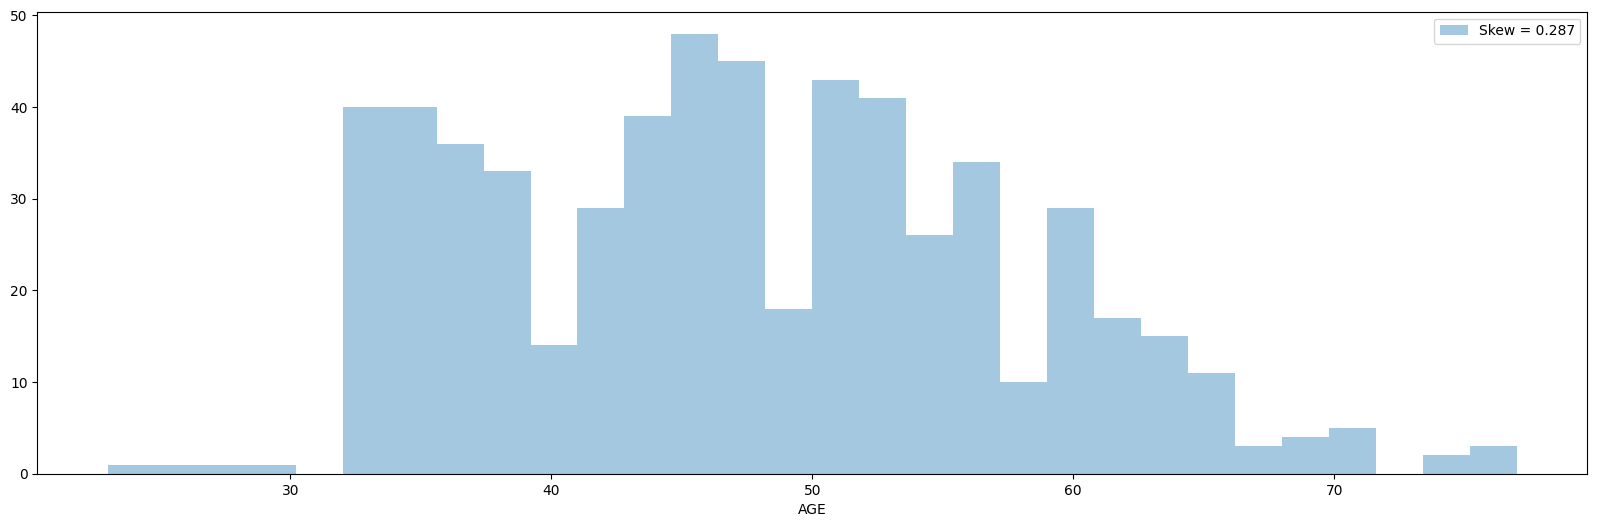

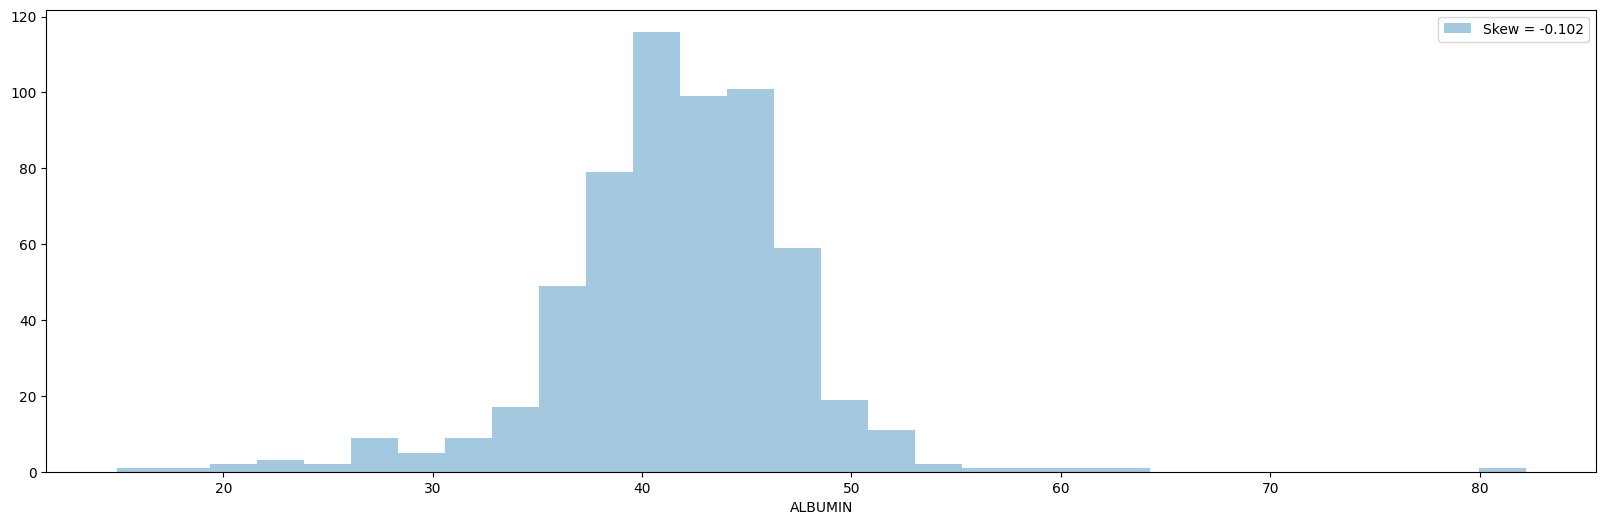

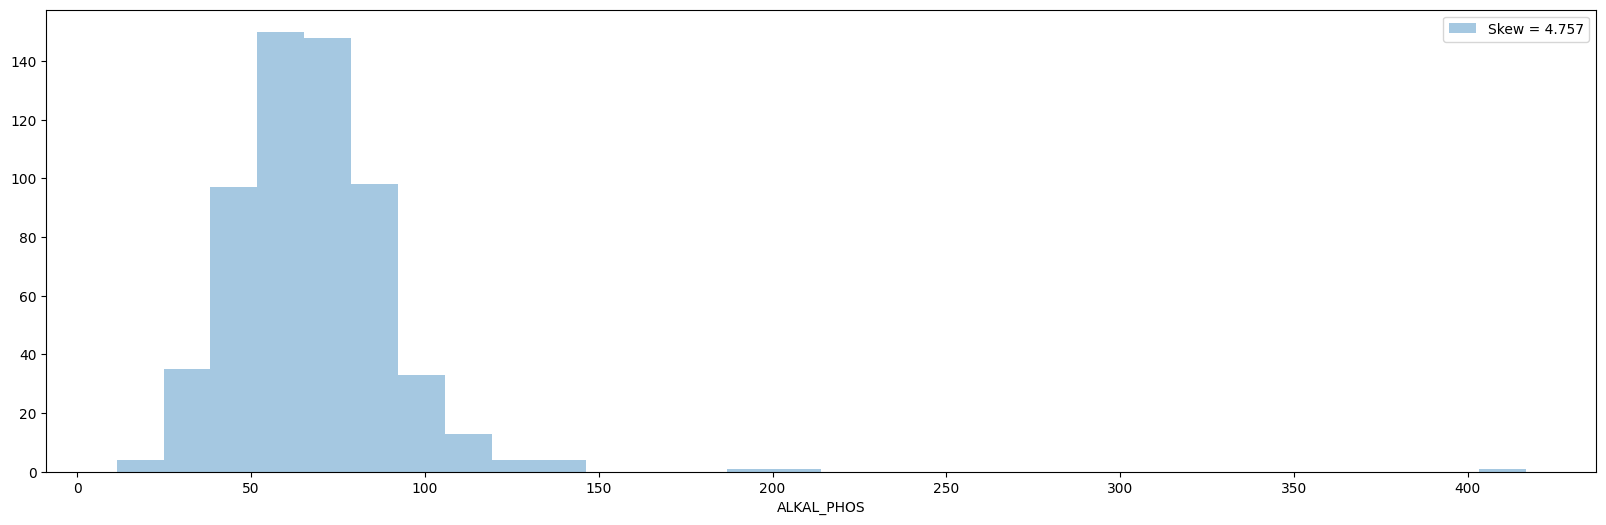

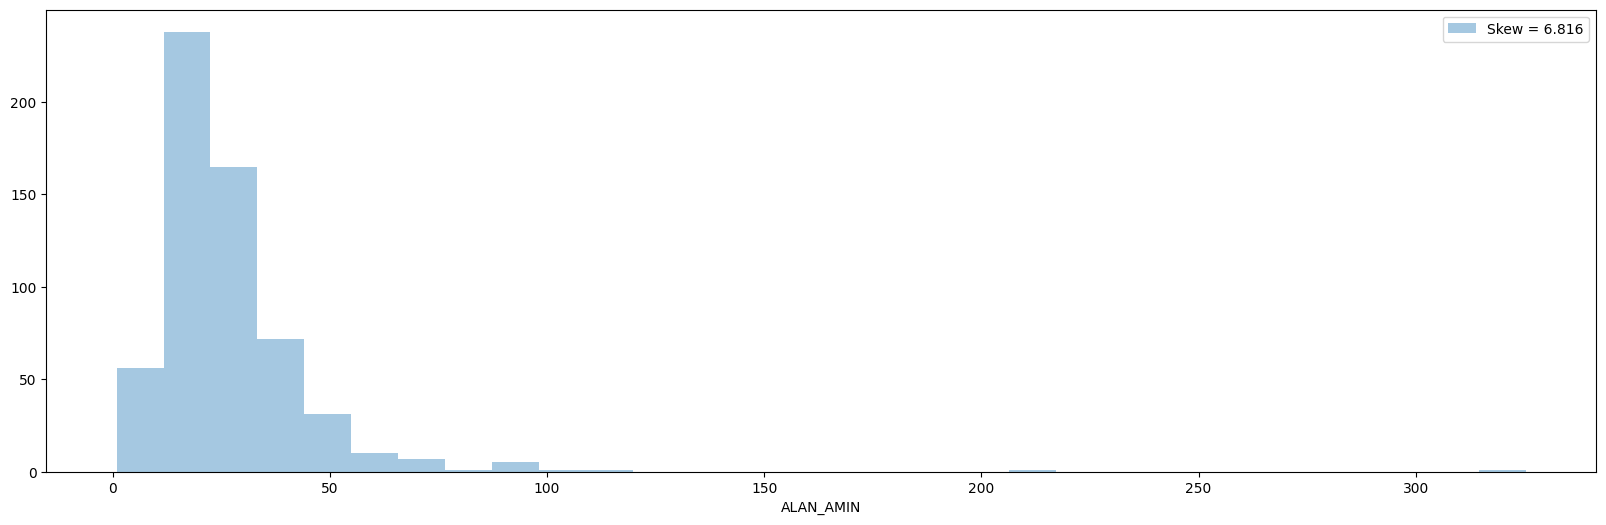

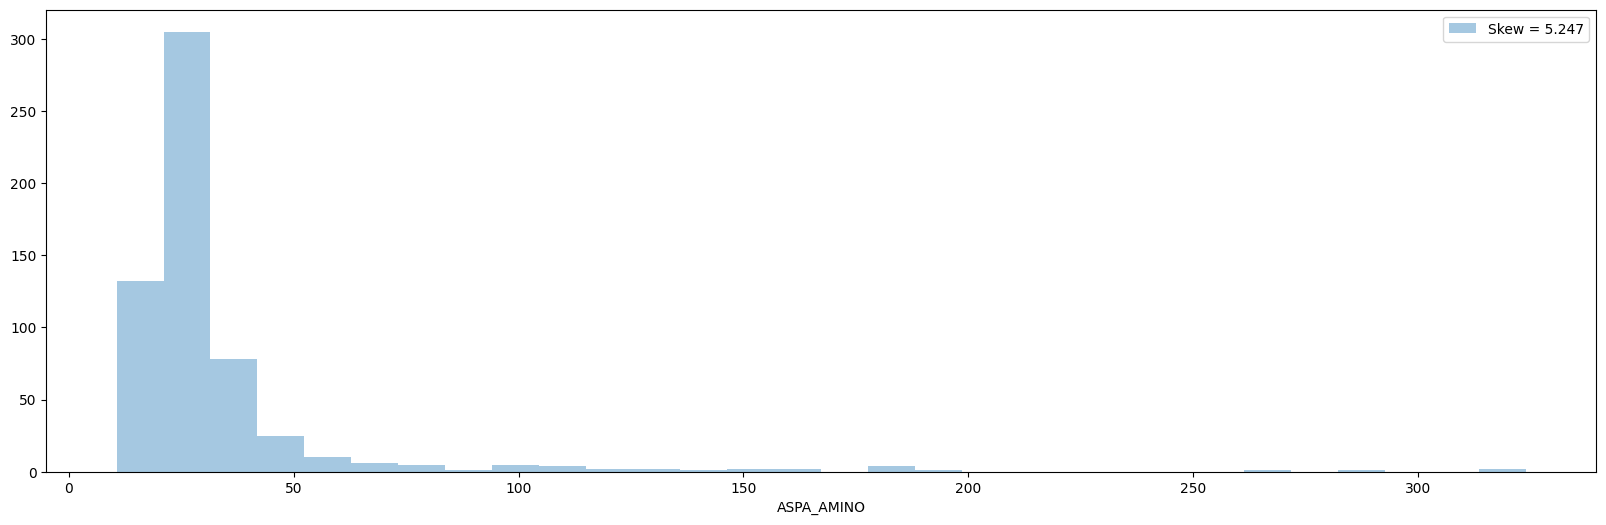

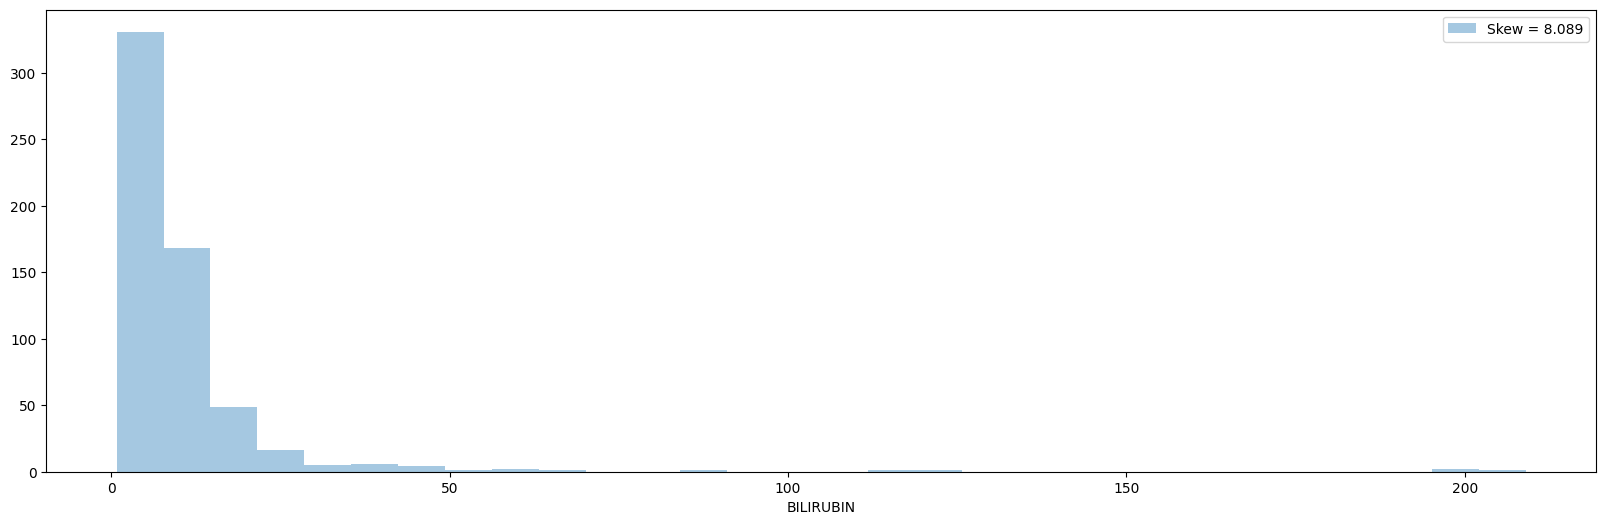

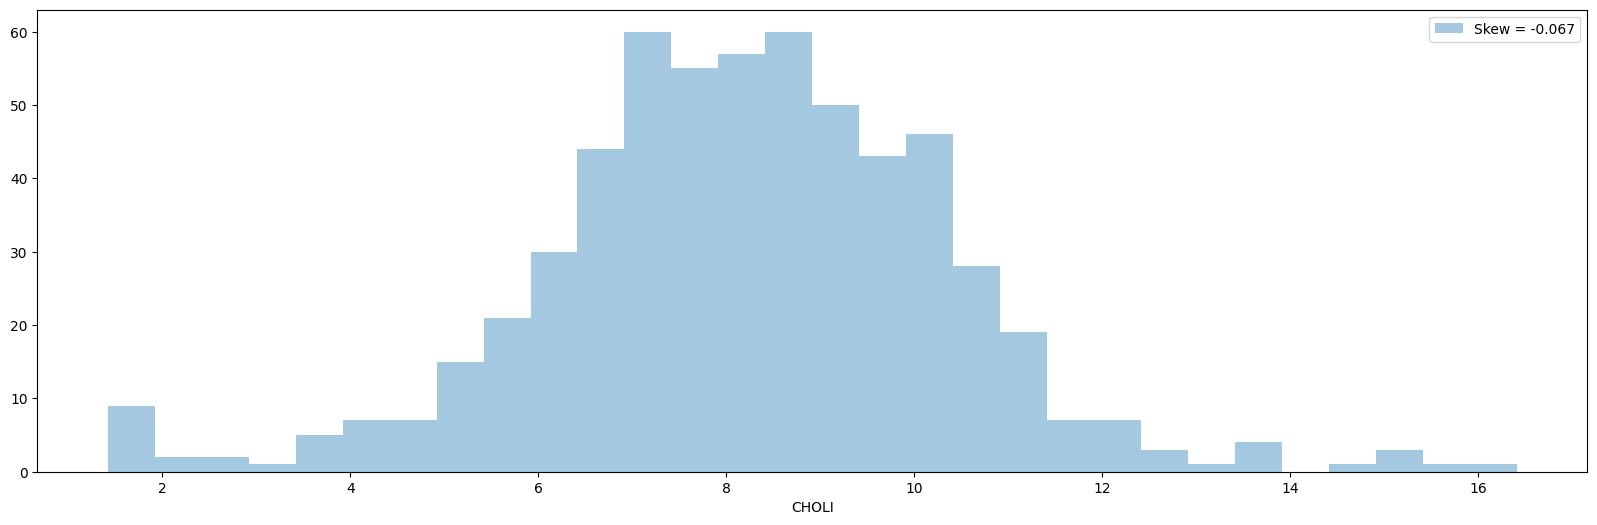

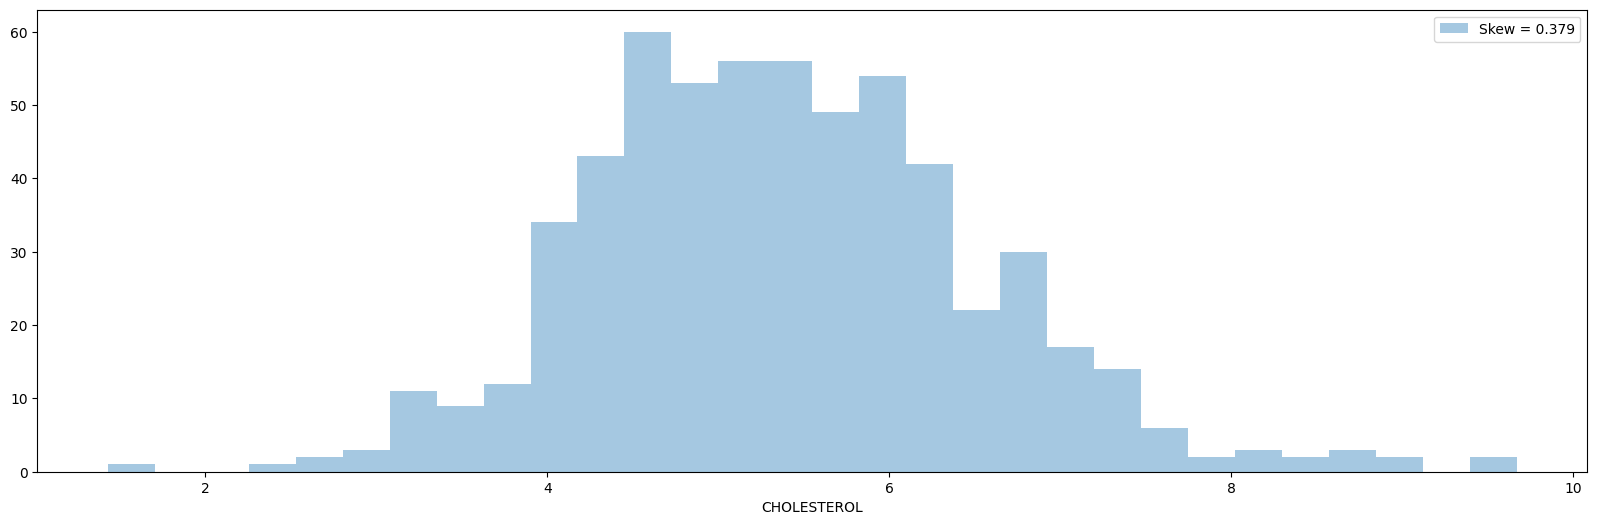

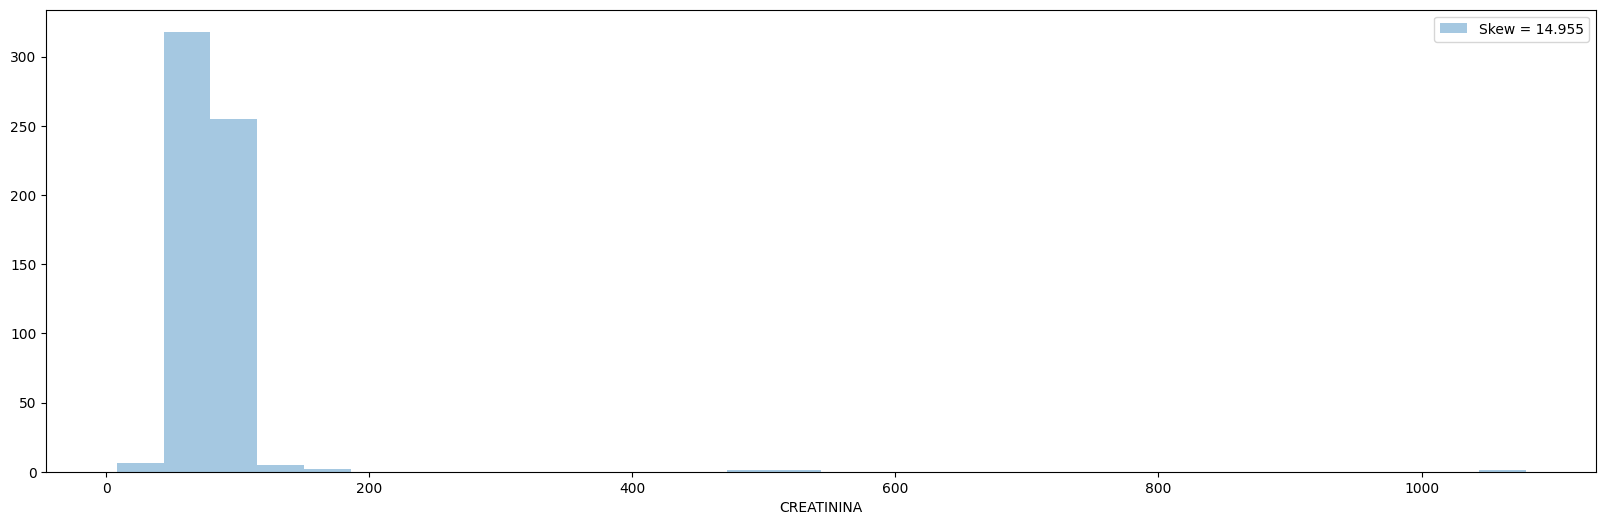

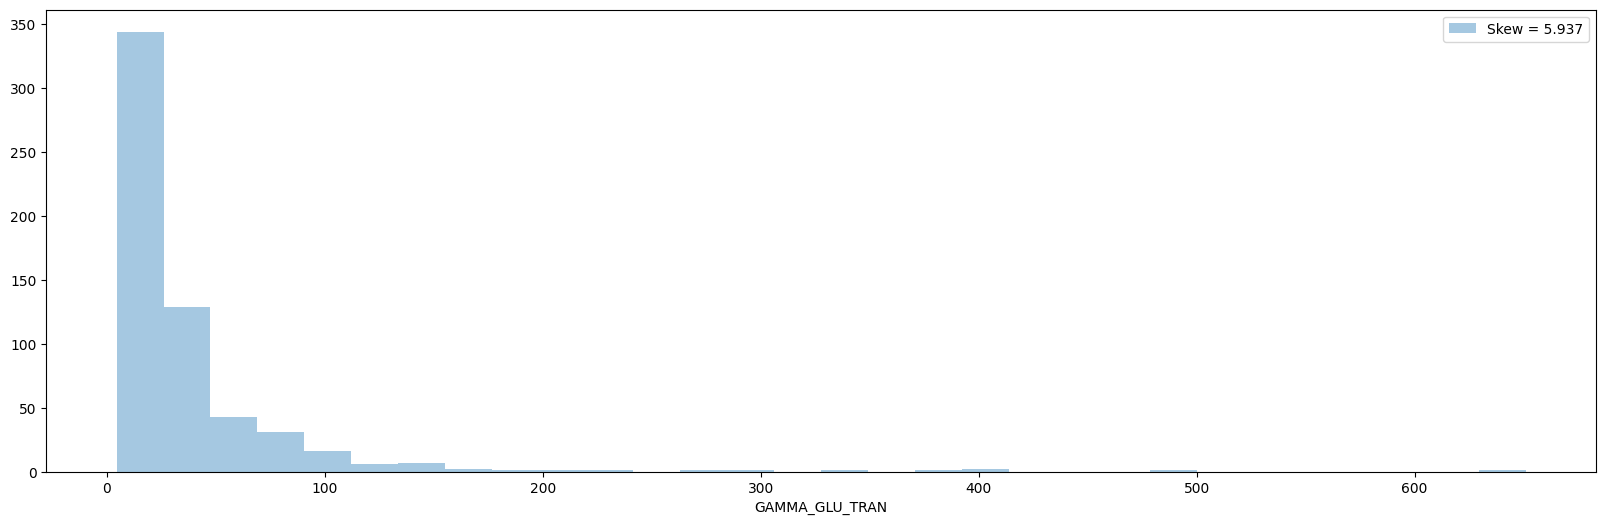

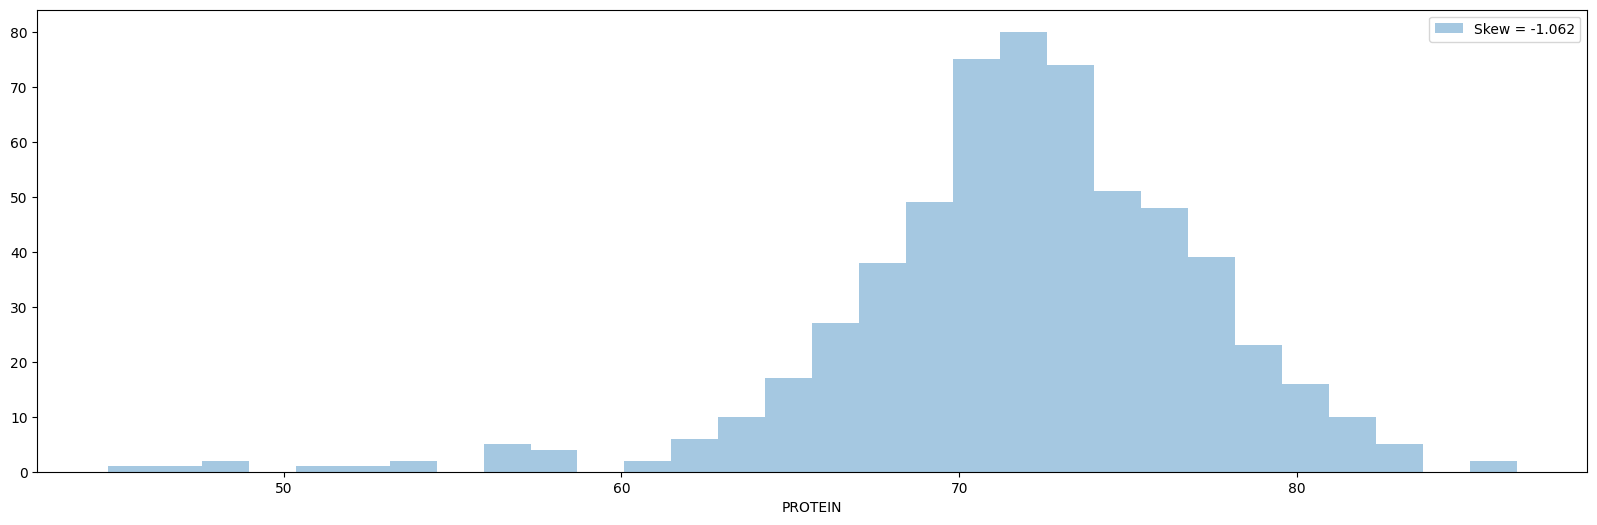

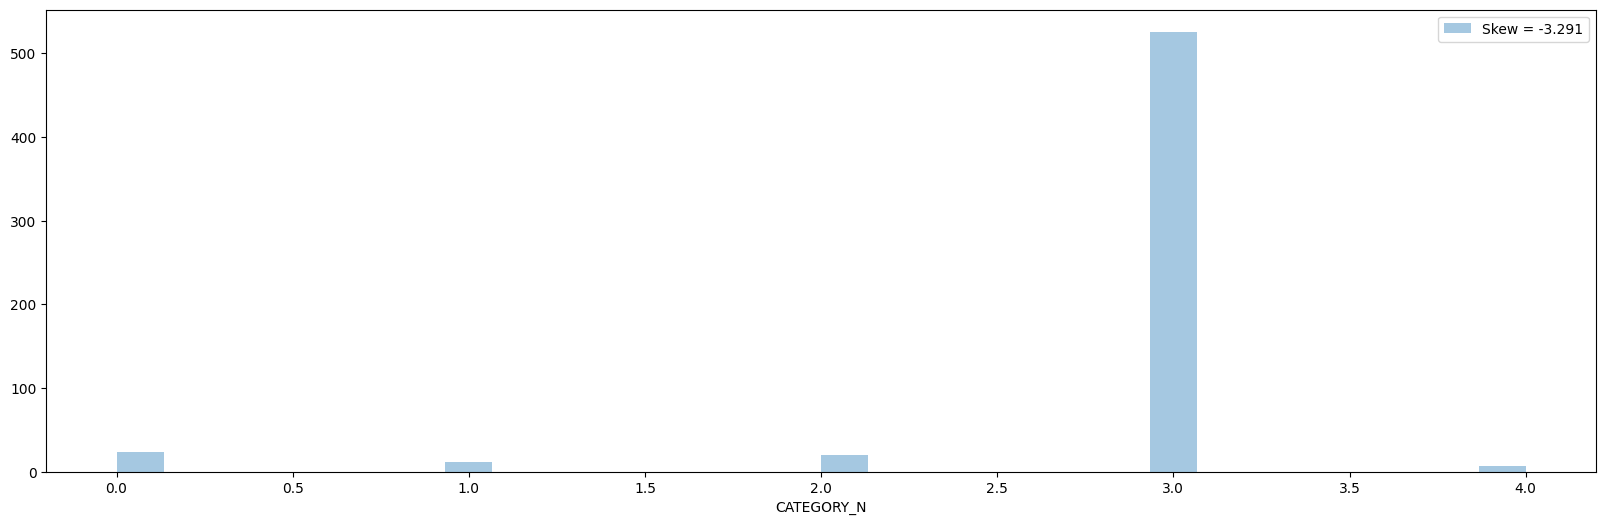

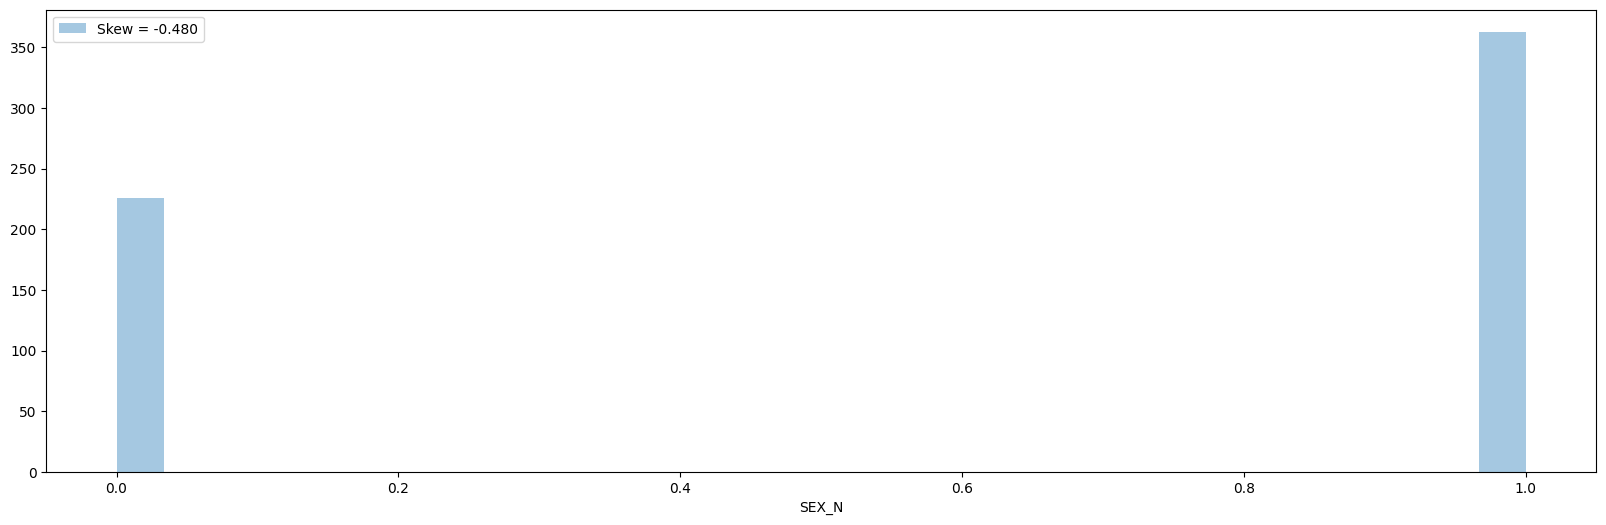

In [41]:
numerical_features=[feature for feature in ldcdata.columns if ldcdata[feature].dtypes != 'O']
for feat in numerical_features:
    f,ax = plt.subplots(figsize=(20,6))
    skew = ldcdata[feat].skew()
    sns.distplot(ldcdata[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

### **Correlation Matrix** ###
Check for Assumption: Independent variables are independent of each other

In [42]:
ldcdata.head()

AGE  ALBUMIN  ALKAL_PHOS  ALAN_AMIN  ASPA_AMINO  BILIRUBIN  CHOLI  \
0   32     38.5        52.5        7.7        22.1        7.5   6.93   
1   32     38.5        70.3       18.0        24.7        3.9  11.17   
2   32     46.9        74.7       36.2        52.6        6.1   8.84   
3   32     43.2        52.0       30.6        22.6       18.9   7.33   
4   32     39.2        74.1       32.6        24.8        9.6   9.15   

   CHOLESTEROL  CREATININA  GAMMA_GLU_TRAN  PROTEIN  CATEGORY_N  SEX_N  
0         3.23       106.0            12.1     69.0           3      1  
1         4.80        74.0            15.6     76.5           3      1  
2         5.20        86.0            33.2     79.3           3      1  
3         4.74        80.0            33.8     75.7           3      1  
4         4.32        76.0            29.9     68.7           3      1

In [43]:
ldcdata.corr()

AGE   ALBUMIN  ALKAL_PHOS  ALAN_AMIN  ASPA_AMINO  \
AGE             1.000000 -0.191094    0.177720  -0.040576    0.072739   
ALBUMIN        -0.191094  1.000000   -0.146120   0.039497   -0.177609   
ALKAL_PHOS      0.177720 -0.146120    1.000000   0.221603    0.067024   
ALAN_AMIN      -0.040576  0.039497    0.221603   1.000000    0.198658   
ASPA_AMINO      0.072739 -0.177609    0.067024   0.198658    1.000000   
BILIRUBIN       0.039655 -0.169597    0.058372  -0.106797    0.309580   
CHOLI          -0.075863  0.360919    0.029482   0.224344   -0.197270   
CHOLESTEROL     0.124742  0.210420    0.125900   0.149997   -0.201213   
CREATININA     -0.025142  0.001433    0.153909  -0.036106   -0.017948   
GAMMA_GLU_TRAN  0.143379 -0.147598    0.461300   0.219707    0.477774   
PROTEIN        -0.159760  0.570726   -0.063085   0.016786    0.017404   
CATEGORY_N     -0.086414  0.218696   -0.026265   0.258278   -0.597338   
SEX_N          -0.014288  0.150091   -0.007601   0.177107    0.129883   

                BILIRUBIN     CHOLI  CHOLESTEROL  CREATININA  GAMMA_GLU_TRAN  \
AGE              0.039655 -0.075863     0.124742   -0.025142        0.143379   
ALBUMIN         -0.169597  0.360919     0.210420    0.001433       -0.147598   
ALKAL_PHOS       0.058372  0.029482     0.125900    0.153909        0.461300   
ALAN_AMIN       -0.106797  0.224344     0.149997   -0.036106        0.219707   
ASPA_AMINO       0.309580 -0.197270    -0.201213   -0.017948        0.477774   
BILIRUBIN        1.000000 -0.320713    -0.181570    0.019910        0.210567   
CHOLI           -0.320713  1.000000     0.428018   -0.012120       -0.095716   
CHOLESTEROL     -0.181570  0.428018     1.000000   -0.051464        0.008823   
CREATININA       0.019910 -0.012120    -0.051464    1.000000        0.125353   
GAMMA_GLU_TRAN   0.210567 -0.095716     0.008823    0.125353        1.000000   
PROTEIN         -0.052575  0.306288     0.245050   -0.030111       -0.037127   
CATEGORY_N      -0.545507  0.357295     0.263910   -0.246496       -0.380140   
SEX_N            0.108063  0.181649    -0.030447    0.158068        0.128142   

                 PROTEIN  CATEGORY_N     SEX_N  
AGE            -0.159760   -0.086414 -0.014288  
ALBUMIN         0.570726    0.218696  0.150091  
ALKAL_PHOS     -0.063085   -0.026265 -0.007601  
ALAN_AMIN       0.016786    0.258278  0.177107  
ASPA_AMINO      0.017404   -0.597338  0.129883  
BILIRUBIN      -0.052575   -0.545507  0.108063  
CHOLI           0.306288    0.357295  0.181649  
CHOLESTEROL     0.245050    0.263910 -0.030447  
CREATININA     -0.030111   -0.246496  0.158068  
GAMMA_GLU_TRAN -0.037127   -0.380140  0.128142  
PROTEIN         1.000000   -0.020179  0.043296  
CATEGORY_N     -0.020179    1.000000 -0.035132  
SEX_N           0.043296   -0.035132  1.000000

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ldc_norm = pd.DataFrame()

ldc_norm[['AGE','ALBUMIN','ALKAL_PHOS','ALAN_AMIN','ASPA_AMINO','BILIRUBIN','CHOLI','CHOLESTEROL','CREATININA','GAMMA_GLU_TRAN','PROTEIN','SEX_N']] = scaler.fit_transform(ldcdata[['AGE','ALBUMIN','ALKAL_PHOS','ALAN_AMIN','ASPA_AMINO','BILIRUBIN','CHOLI','CHOLESTEROL','CREATININA','GAMMA_GLU_TRAN','PROTEIN','SEX_N']])
ldc_norm.head()

AGE   ALBUMIN  ALKAL_PHOS  ALAN_AMIN  ASPA_AMINO  BILIRUBIN     CHOLI  \
0  0.166667  0.350669    0.101653   0.020962    0.036694   0.032181  0.367578   
1  0.166667  0.350669    0.145571   0.052713    0.044990   0.014890  0.650434   
2  0.166667  0.475483    0.156427   0.108816    0.134014   0.025456  0.494997   
3  0.166667  0.420505    0.100419   0.091554    0.038290   0.086936  0.394263   
4  0.166667  0.361070    0.154947   0.097719    0.045310   0.042267  0.515677   

   CHOLESTEROL  CREATININA  GAMMA_GLU_TRAN   PROTEIN  SEX_N  
0     0.218447    0.091495        0.011757  0.580336    1.0  
1     0.408981    0.061619        0.017172  0.760192    1.0  
2     0.457524    0.072822        0.044400  0.827338    1.0  
3     0.401699    0.067221        0.045328  0.741007    1.0  
4     0.350728    0.063486        0.039295  0.573141    1.0

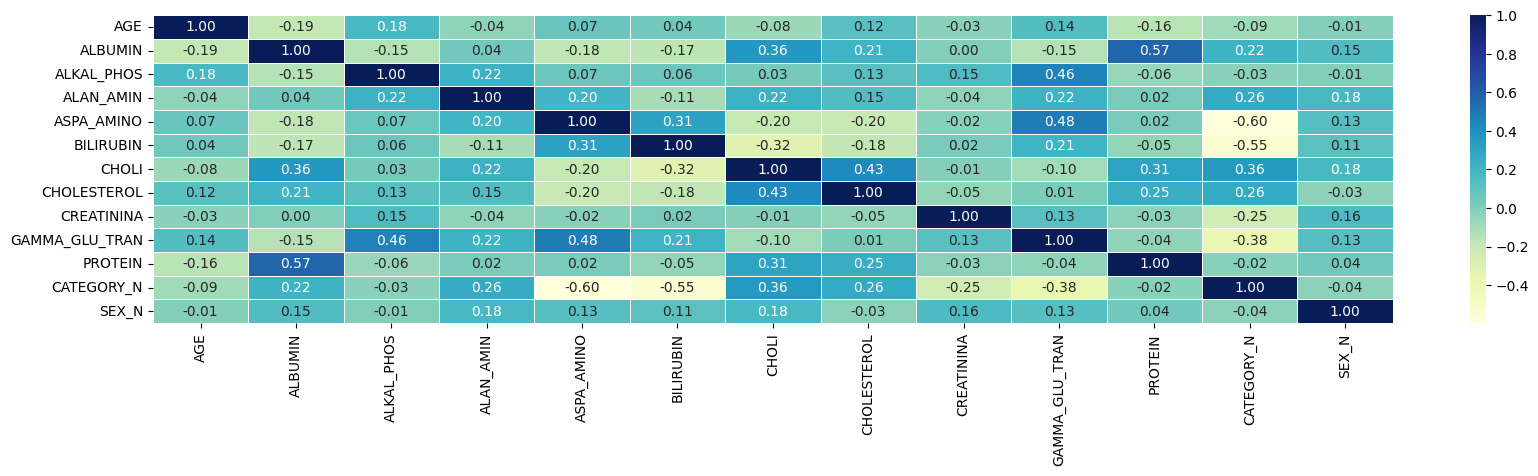

In [45]:
# Correlation Heatmap
f,ax = plt.subplots(figsize=(20,4))
sns.heatmap(ldcdata.corr(), annot=True, linewidths =.5, fmt ='.2f',cmap="YlGnBu",ax=ax)
plt.show()

Based on the heatmap we see very less correlation between the individual entities. So the issue of colinearity problem will not arise.

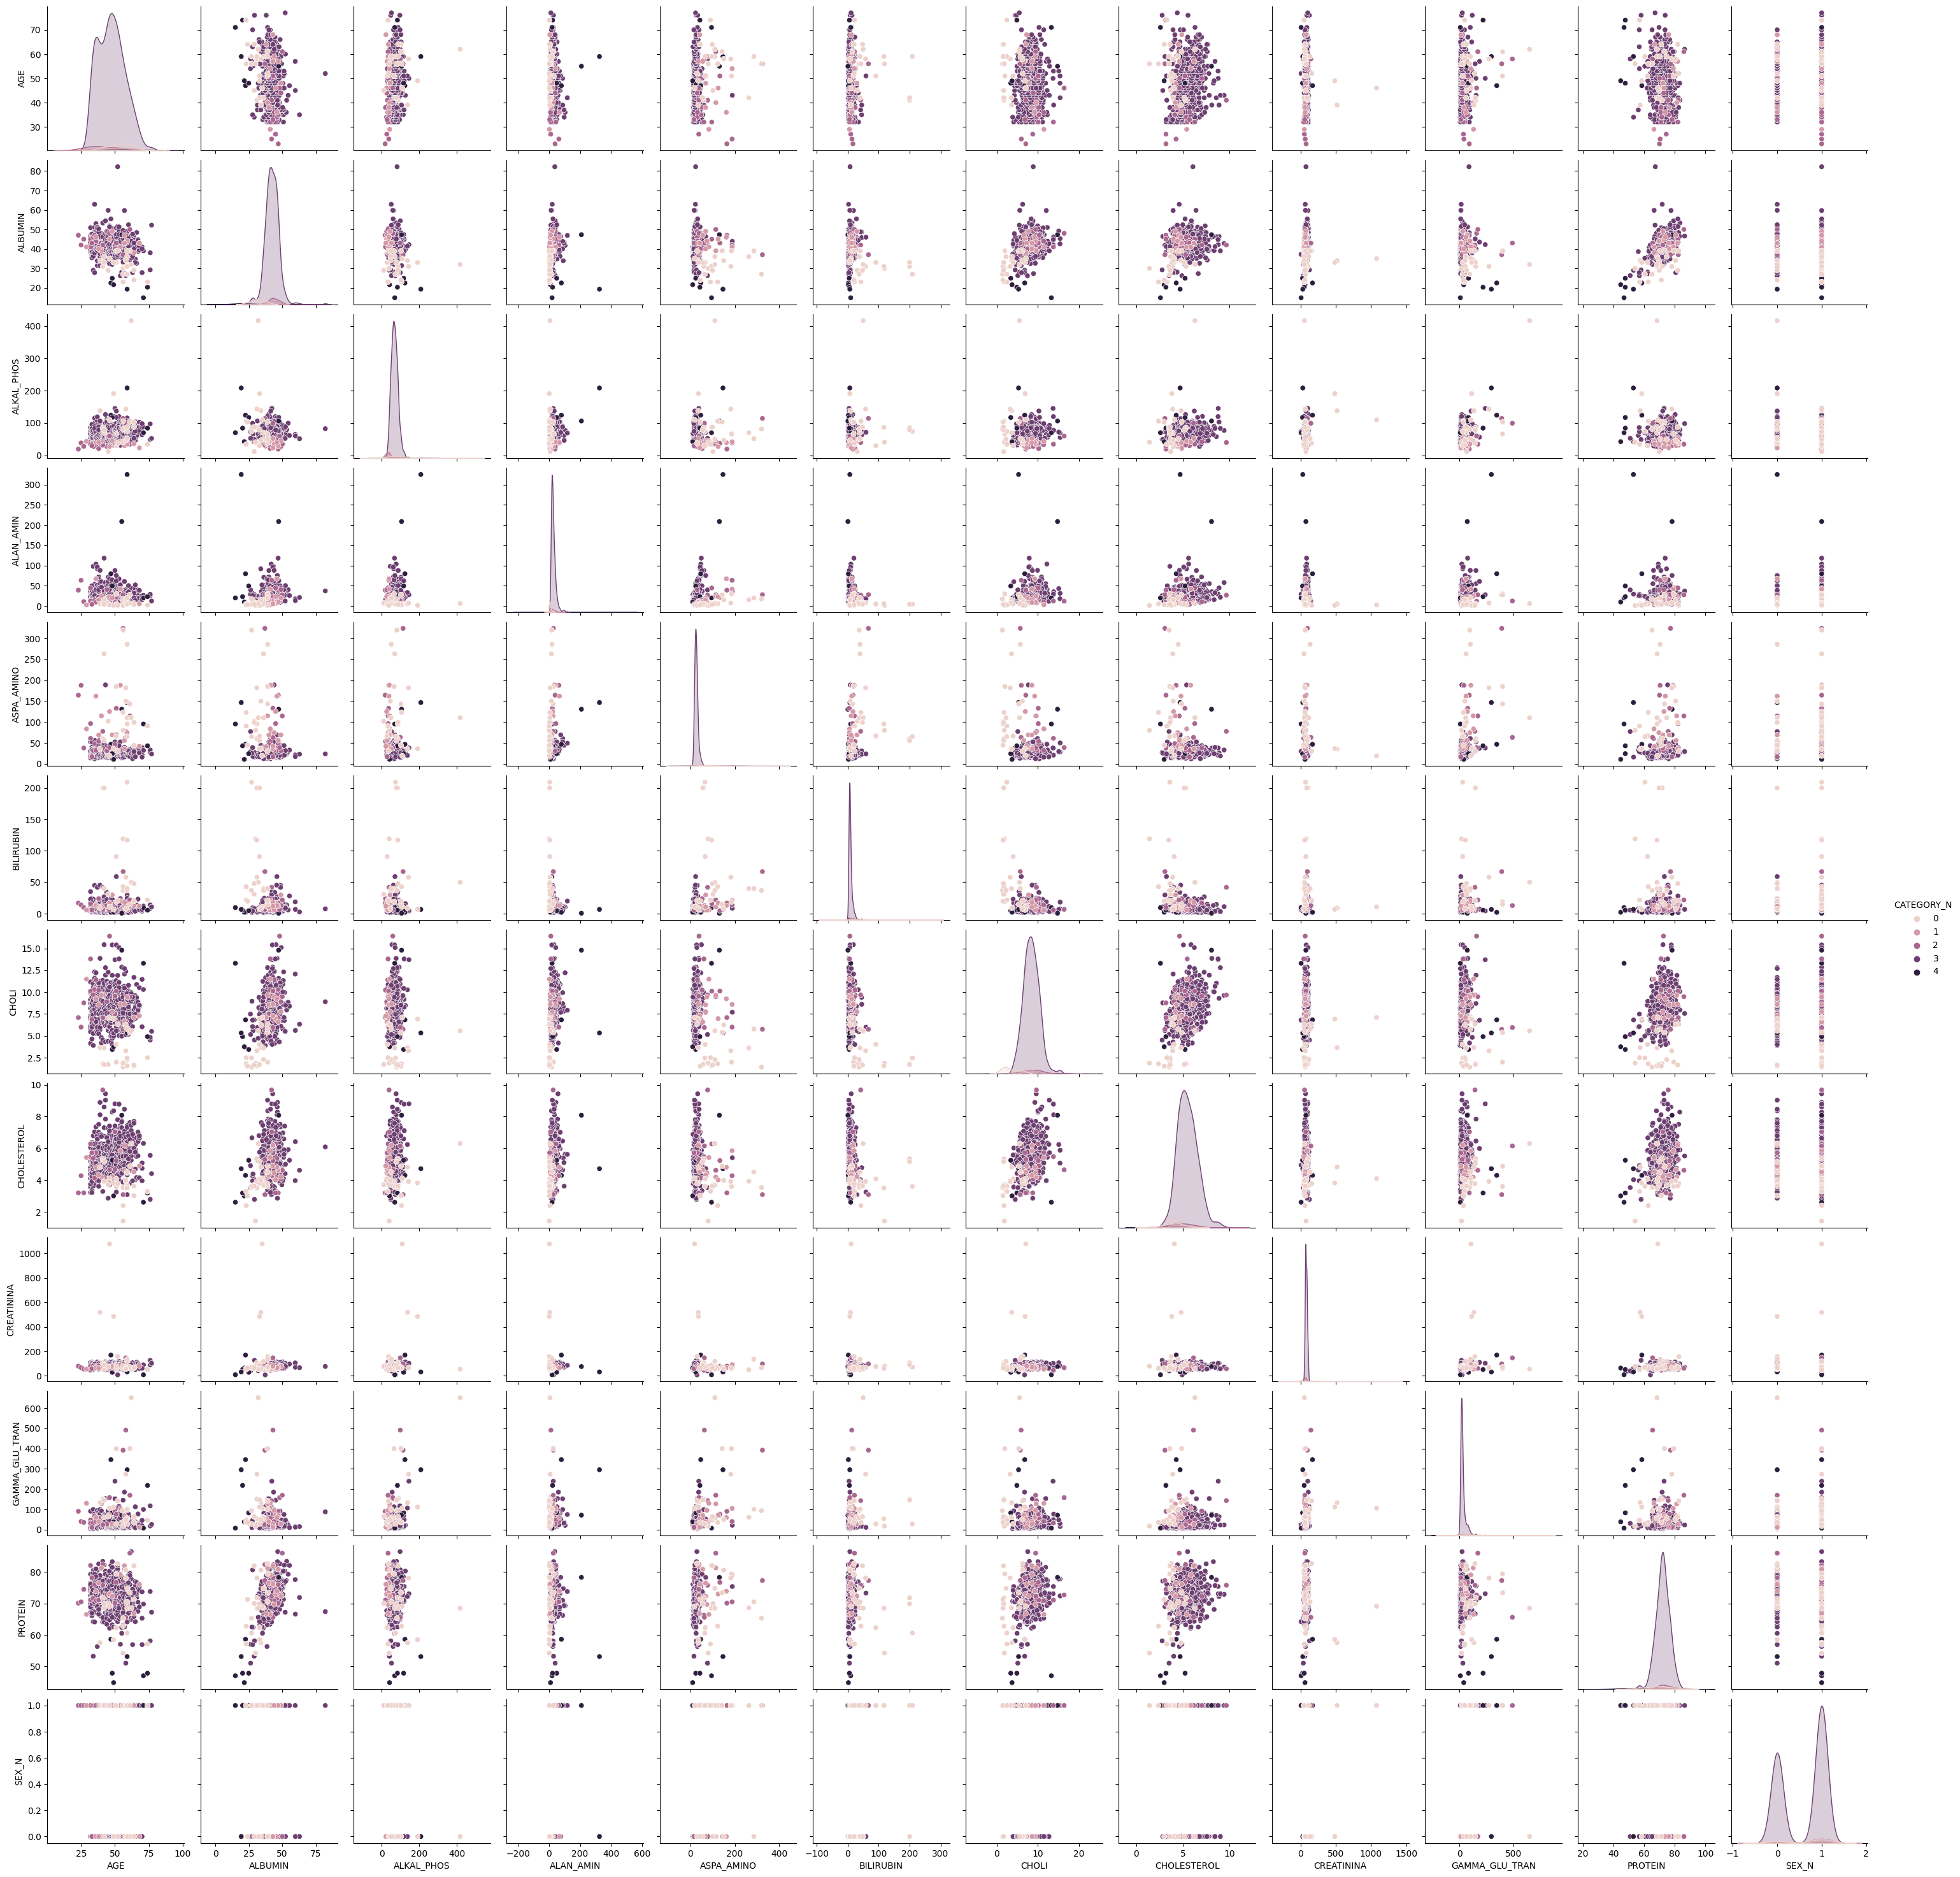

In [46]:
#Format the plot background and scatter plots for all the variables
import seaborn as sns
sns.pairplot(ldcdata, hue='CATEGORY_N')

In [47]:
ldcdata.to_csv("auto_eda_data.csv")

### **Automated Exploratory Data Analysis (EDA)** ###

In [48]:
! pip install autoviz

In [49]:
import autoviz as av
import pandas as pd

Imported v0.1.803. After importing autoviz, you must run '%matplotlib inline' to display charts inline.
    AV = AutoViz_Class()
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [50]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

filename = 'auto_eda_data.csv'
depVar = 'CATEGORY_N'
sep=','

In [51]:
AV = AutoViz_Class()

In [52]:
%matplotlib inline

Shape of your Data Set loaded: (589, 14)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  10
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    14 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Unnamed: 0']
To fix these data quality issues in the dataset, impo

Number of All Scatter Plots = 55


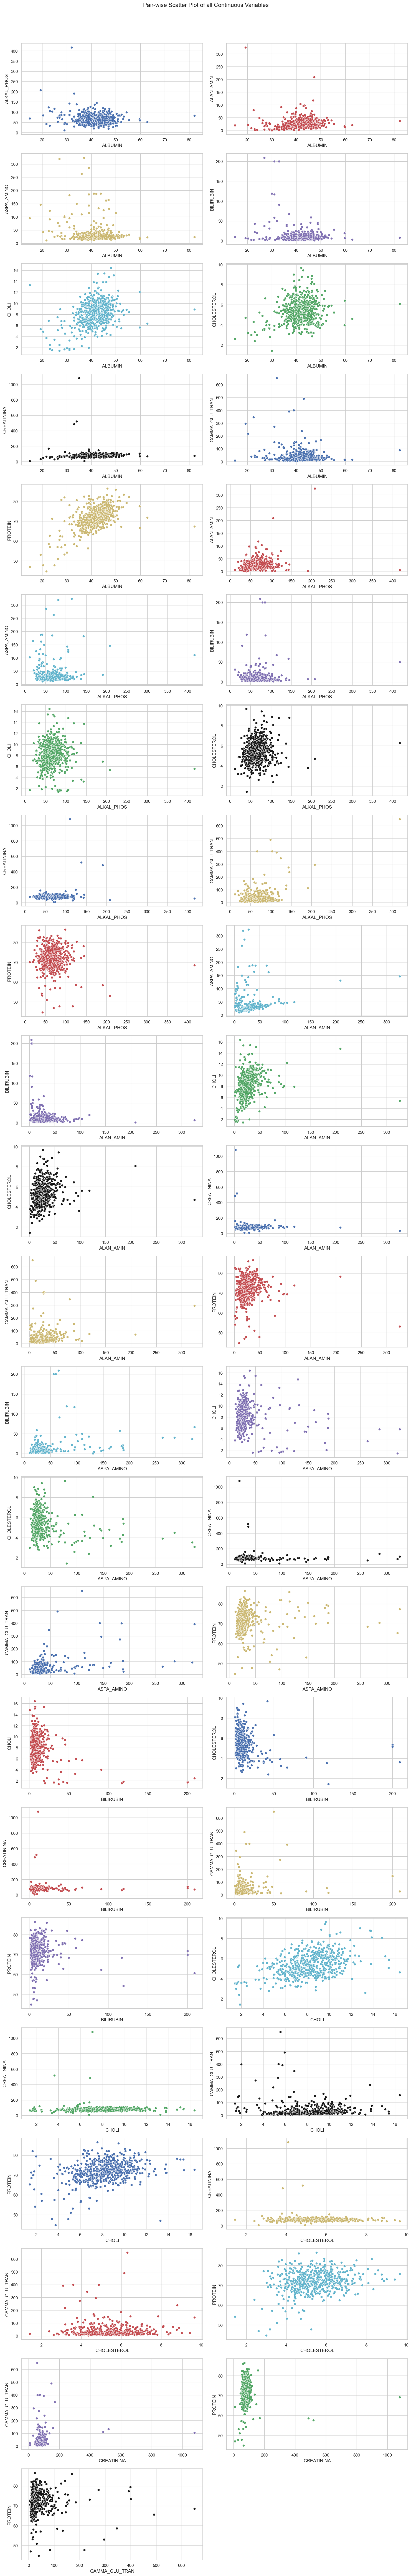

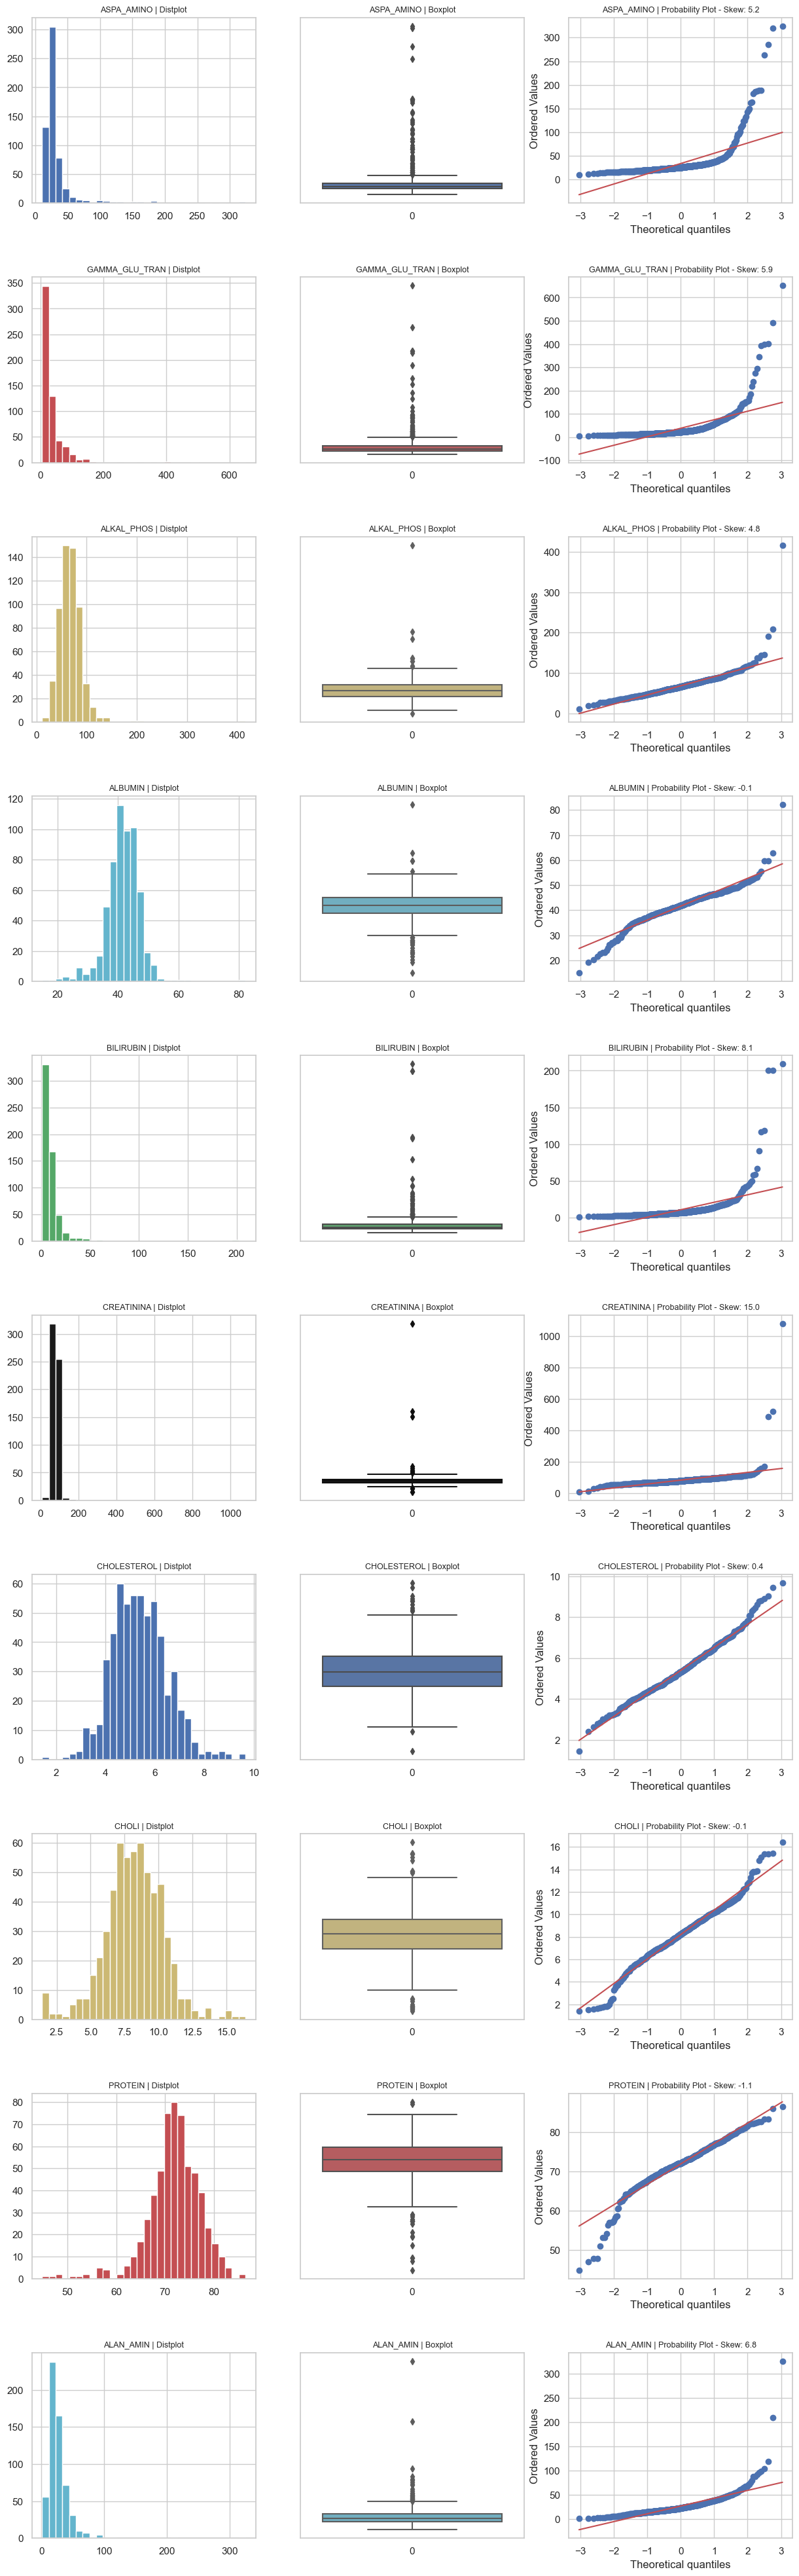

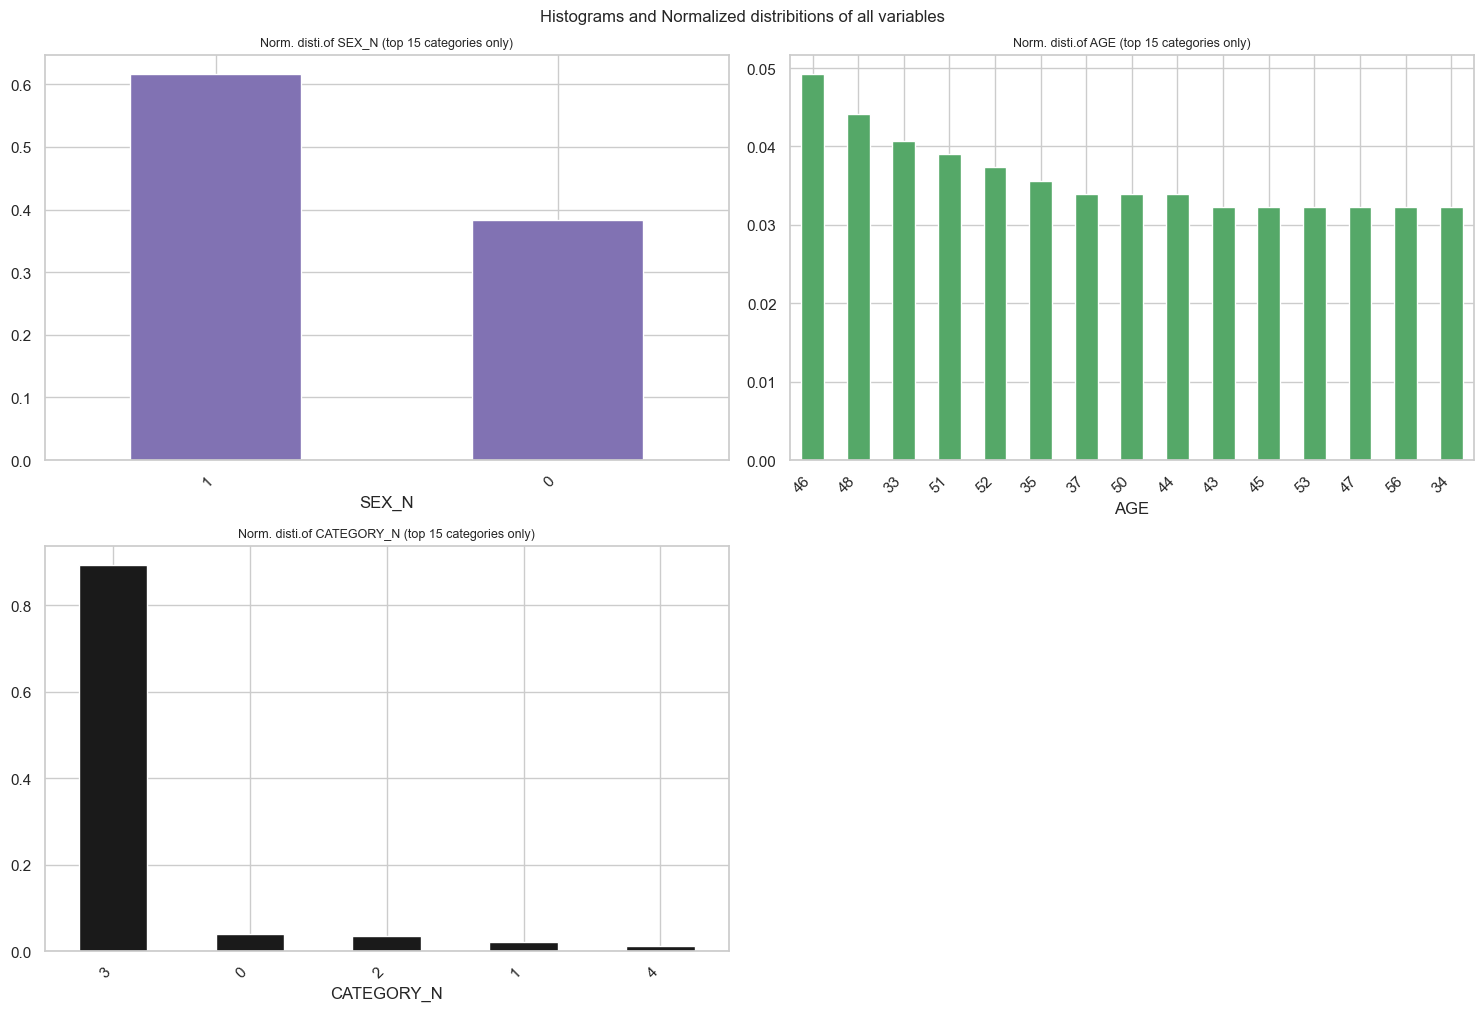

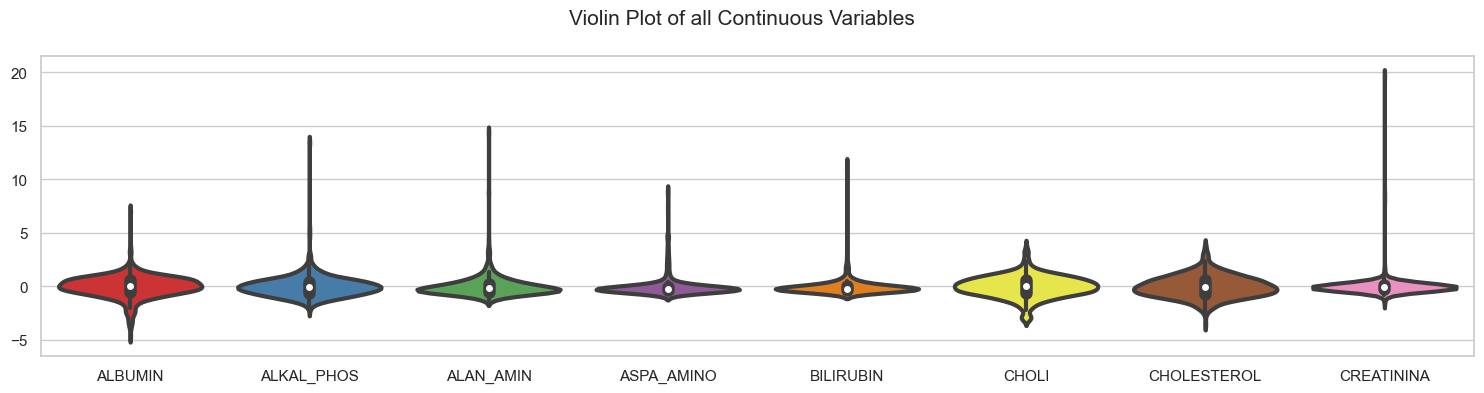

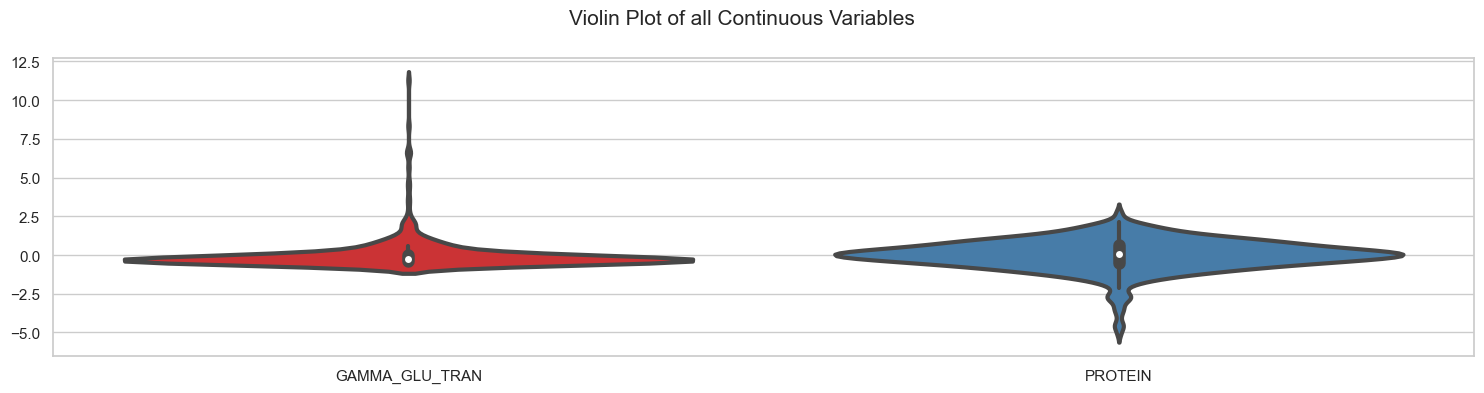

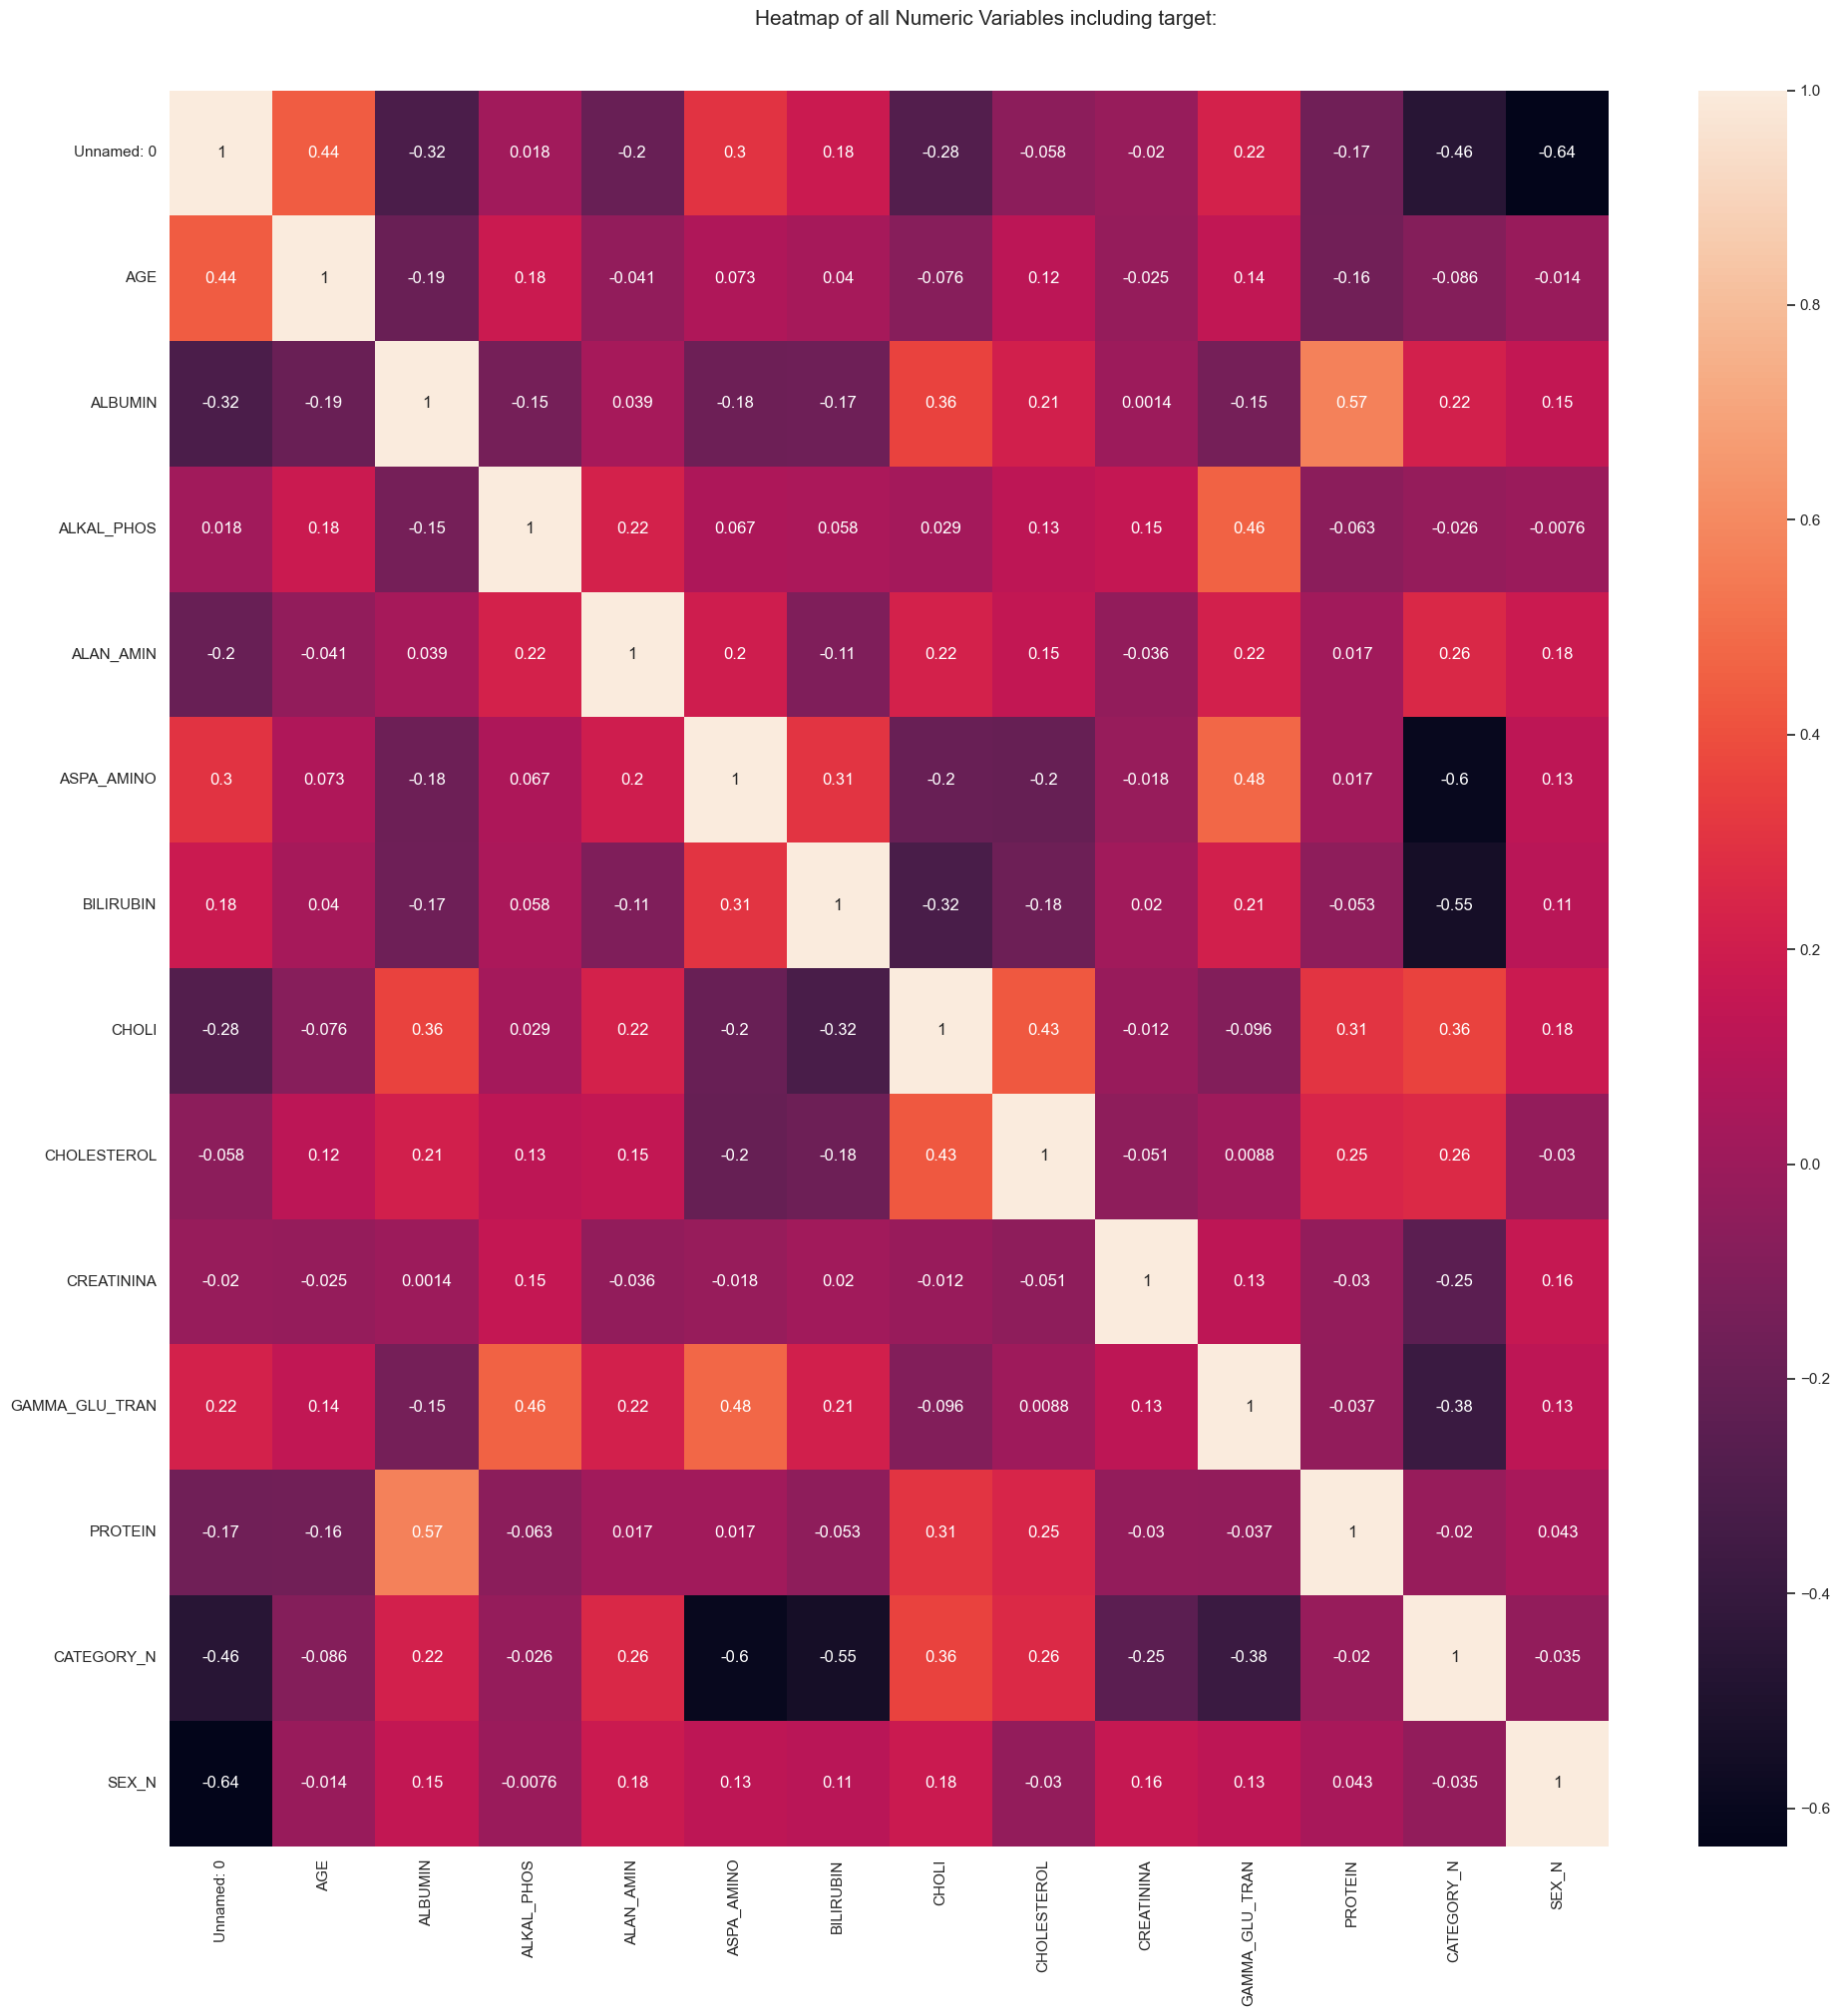

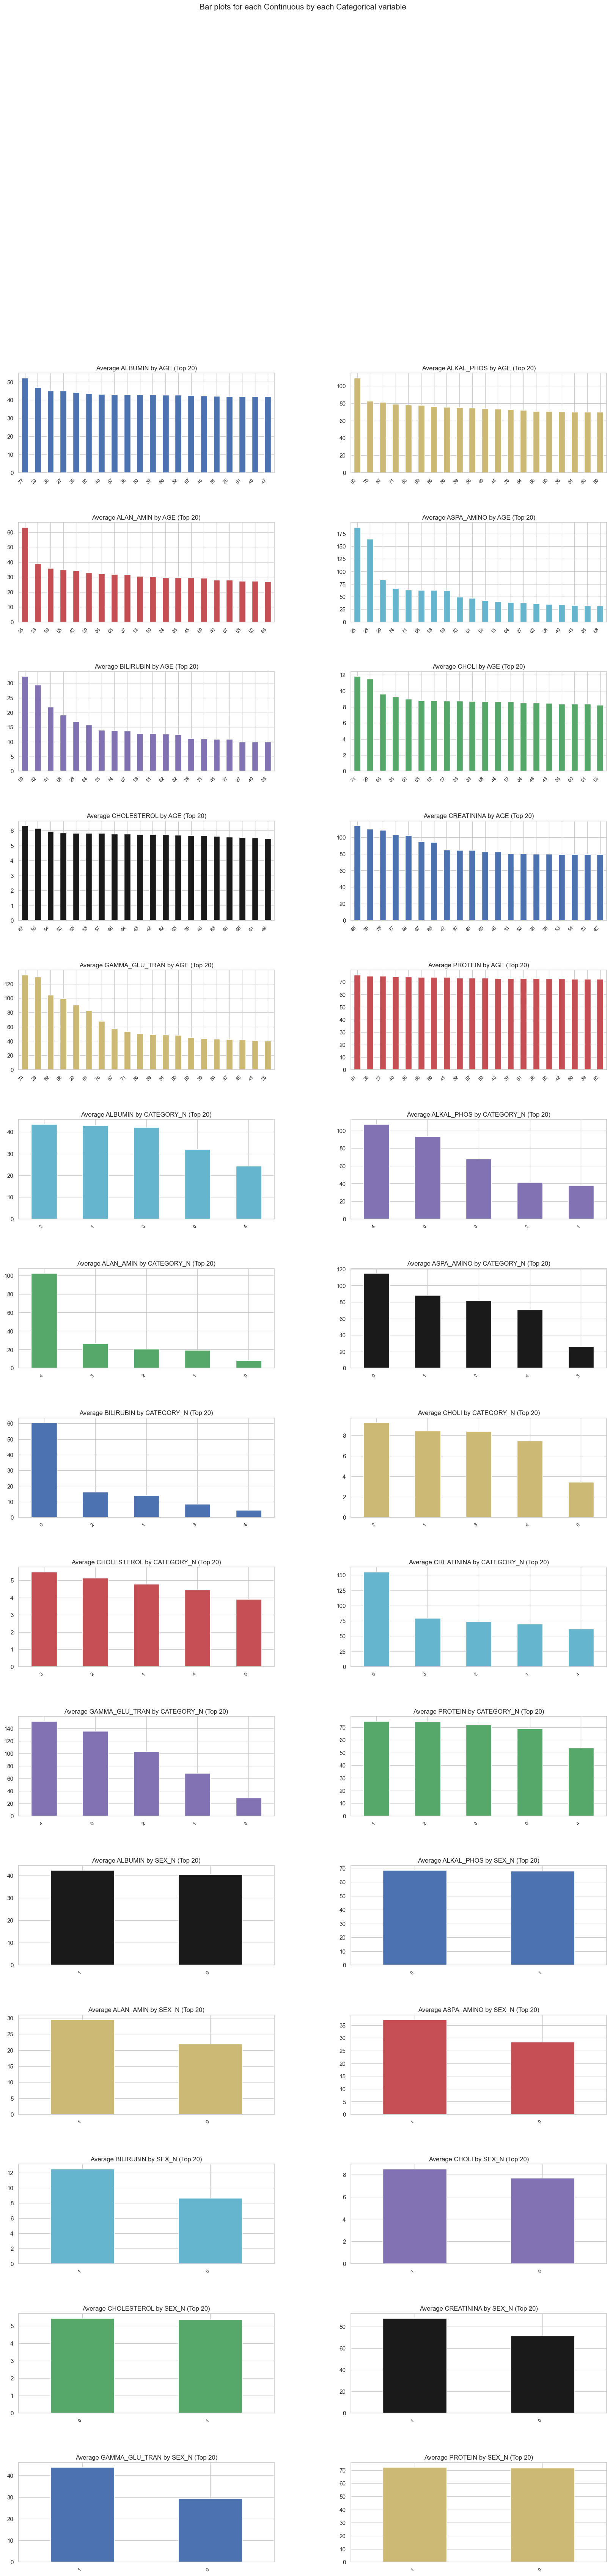

All Plots done
Time to run AutoViz = 31 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [53]:

_ = AV.AutoViz(filename)

### ***Categorizing Training and Testing Sets with testing sample size as 20%*** ###

In [54]:
ldc_df = ldcdata.copy()
ldc_df.head()

AGE  ALBUMIN  ALKAL_PHOS  ALAN_AMIN  ASPA_AMINO  BILIRUBIN  CHOLI  \
0  32    38.5       52.5        7.7        22.1        7.5      6.93   
1  32    38.5       70.3       18.0        24.7        3.9     11.17   
2  32    46.9       74.7       36.2        52.6        6.1      8.84   
3  32    43.2       52.0       30.6        22.6       18.9      7.33   
4  32    39.2       74.1       32.6        24.8        9.6      9.15   

   CHOLESTEROL  CREATININA  GAMMA_GLU_TRAN  PROTEIN  CATEGORY_N  SEX_N  
0     3.23         106.0         12.1        69.0         3        1    
1     4.80          74.0         15.6        76.5         3        1    
2     5.20          86.0         33.2        79.3         3        1    
3     4.74          80.0         33.8        75.7         3        1    
4     4.32          76.0         29.9        68.7         3        1

In [55]:
# Segregating the input columns from the target column
inputs = ldc_df.drop(['CATEGORY_N'], axis = 'columns')
inputs

AGE  ALBUMIN  ALKAL_PHOS  ALAN_AMIN  ASPA_AMINO  BILIRUBIN  CHOLI  \
0    32    38.5        52.5       7.7         22.1       7.5      6.93   
1    32    38.5        70.3      18.0         24.7       3.9     11.17   
2    32    46.9        74.7      36.2         52.6       6.1      8.84   
3    32    43.2        52.0      30.6         22.6      18.9      7.33   
4    32    39.2        74.1      32.6         24.8       9.6      9.15   
..   ...      ...         ...        ...         ...        ...    ...   
608  58    34.0        46.4      15.0        150.0       8.0      6.26   
609  59    39.0        51.3      19.6        285.8      40.0      5.77   
610  62    32.0       416.6       5.9        110.3      50.0      5.57   
611  64    24.0       102.8       2.9         44.4      20.0      1.54   
612  64    29.0        87.3       3.5         99.0      48.0      1.66   

     CHOLESTEROL  CREATININA  GAMMA_GLU_TRAN  PROTEIN  SEX_N  
0       3.23         106.0          12.1       69.0      1    
1       4.80          74.0          15.6       76.5      1    
2       5.20          86.0          33.2       79.3      1    
3       4.74          80.0          33.8       75.7      1    
4       4.32          76.0          29.9       68.7      1    
..           ...         ...             ...      ...    ...  
608     3.98          56.0          49.7       80.6      0    
609     4.51         136.1         101.1       70.5      0    
610     6.30          55.7         650.9       68.5      0    
611     3.02          63.0          35.9       71.3      0    
612     3.63          66.7          64.2       82.0      0    

[589 rows x 12 columns]

In [56]:
# Segregating the target column
target = ldc_df['CATEGORY_N']
target.head()

0    3
1    3
2    3
3    3
4    3
Name: CATEGORY_N, dtype: int32

### ***Feature Selection Technique after evaluation of scores*** ###

In [57]:
# Feature importance
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2

In [58]:
ldc_norm # Normalized Data

AGE     ALBUMIN  ALKAL_PHOS  ALAN_AMIN  ASPA_AMINO  BILIRUBIN  \
0    0.166667  0.350669   0.101653   0.020962    0.036694   0.032181    
1    0.166667  0.350669   0.145571   0.052713    0.044990   0.014890    
2    0.166667  0.475483   0.156427   0.108816    0.134014   0.025456    
3    0.166667  0.420505   0.100419   0.091554    0.038290   0.086936    
4    0.166667  0.361070   0.154947   0.097719    0.045310   0.042267    
..        ...       ...         ...        ...         ...        ...   
584  0.648148  0.283804   0.086603   0.043465    0.444799   0.034582    
585  0.666667  0.358098   0.098692   0.057645    0.878111   0.188280    
586  0.722222  0.254086   1.000000   0.015413    0.318124   0.236311    
587  0.759259  0.135215   0.225759   0.006165    0.107849   0.092219    
588  0.759259  0.209510   0.187515   0.008015    0.282068   0.226705    

       CHOLI   CHOLESTEROL  CREATININA  GAMMA_GLU_TRAN   PROTEIN  SEX_N  
0    0.367578   0.218447     0.091495      0.011757     0.580336   1.0   
1    0.650434   0.408981     0.061619      0.017172     0.760192   1.0   
2    0.494997   0.457524     0.072822      0.044400     0.827338   1.0   
3    0.394263   0.401699     0.067221      0.045328     0.741007   1.0   
4    0.515677   0.350728     0.063486      0.039295     0.573141   1.0   
..        ...          ...         ...             ...       ...    ...  
584  0.322882   0.309466     0.044814      0.069926     0.858513   0.0   
585  0.290193   0.373786     0.119597      0.149443     0.616307   0.0   
586  0.276851   0.591019     0.044534      1.000000     0.568345   0.0   
587  0.008005   0.192961     0.051349      0.048577     0.635492   0.0   
588  0.016011   0.266990     0.054803      0.092358     0.892086   0.0   

[589 rows x 12 columns]

In [59]:
x_data = ldc_norm.copy()
y_data = ldc_df['CATEGORY_N']

In [60]:
# Feature extraction
test_comp_feat = SelectKBest(score_func=chi2, k=4)
fit_comp_feat = test_comp_feat.fit(x_data, y_data)

In [61]:
# Summarizing scores
scores_comp_feat = fit_comp_feat.scores_
features_comp = fit_comp_feat.transform(x_data)

In [62]:
score_feat_df = pd.DataFrame(list(zip(scores_comp_feat, x_data.columns)), columns =['Score', 'Feature'])
score_feat_df.sort_values(by="Score", ascending=False, inplace=True)
score_feat_df

Score       Feature    
4   38.036027      ASPA_AMINO
5   29.558434       BILIRUBIN
9   20.922871  GAMMA_GLU_TRAN
3    5.940325       ALAN_AMIN
6    5.807481           CHOLI
1    2.550402         ALBUMIN
10   2.395084         PROTEIN
2    2.220669      ALKAL_PHOS
0    2.171666             AGE
7    2.126514     CHOLESTEROL
11   2.060875           SEX_N
8    1.759730      CREATININA

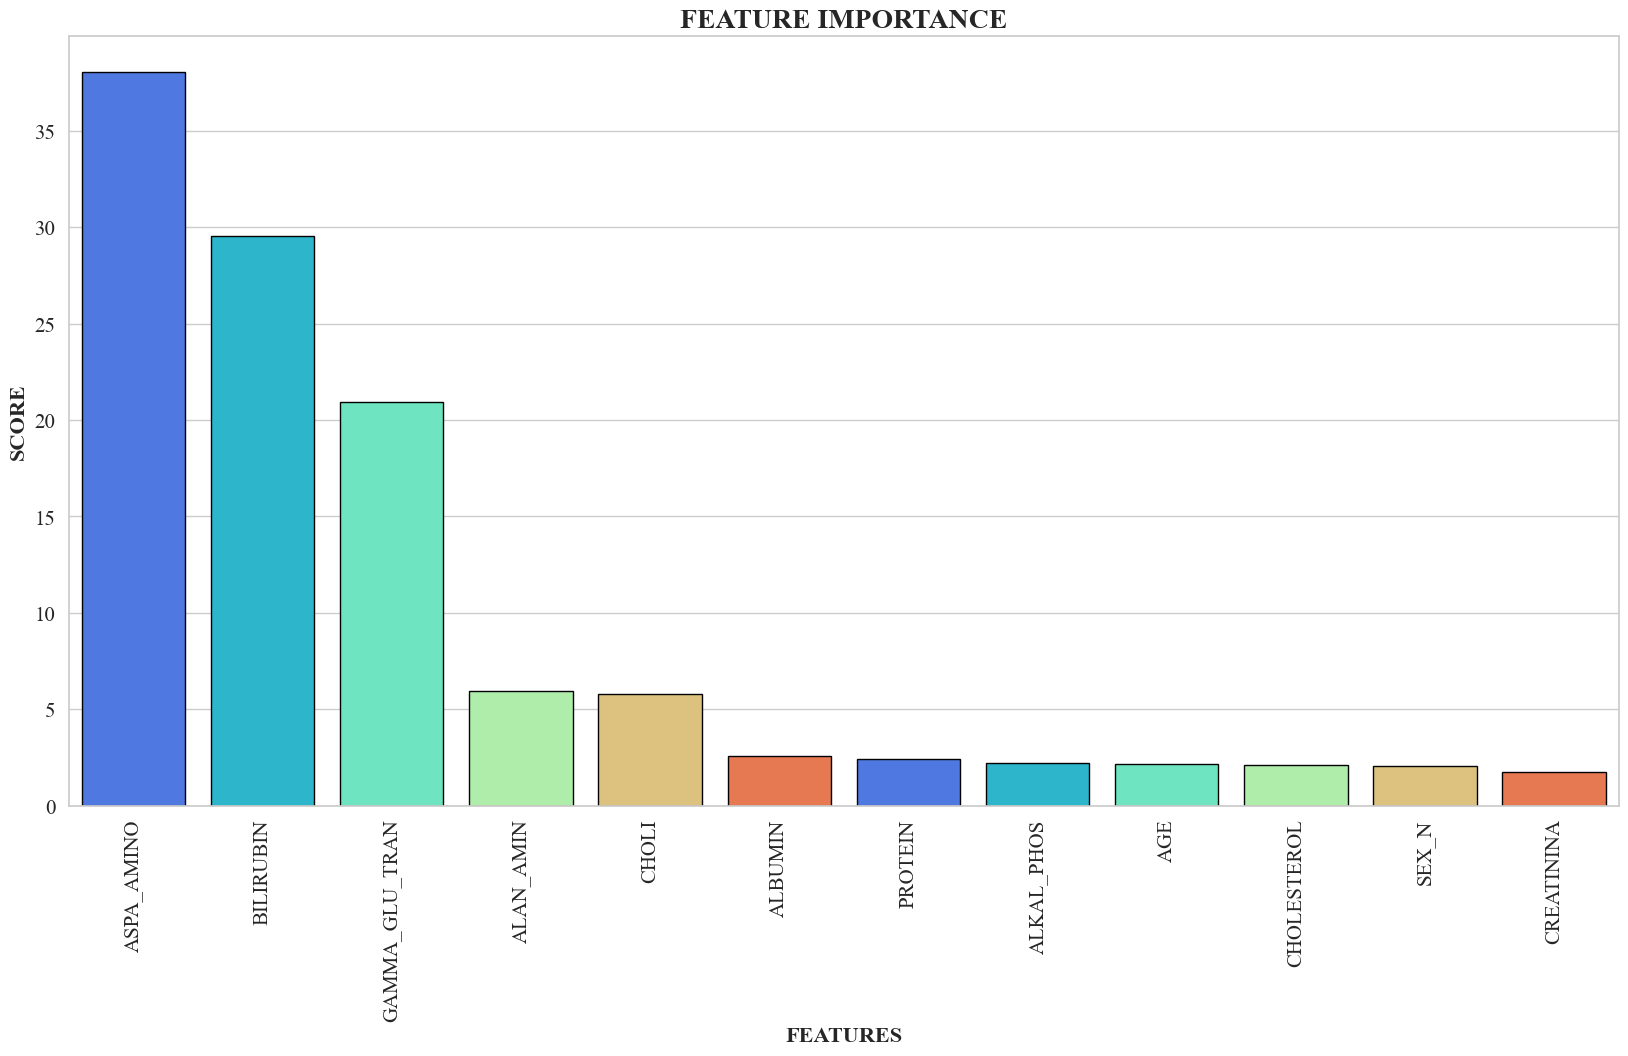

In [63]:
# Creating a chart with the Feature Score
plt.figure(figsize=(20,10))

# Creating the barplot for RMSE
palette_color = sns.color_palette('rainbow')
sns.barplot(x='Feature', y="Score", data=score_feat_df, palette=palette_color, edgecolor="#000000", linewidth=1,)

# Setting labels, title and other paraments
plt.xlabel("FEATURES", rotation=0, fontfamily = "Times New Roman", weight='bold', size = '16')
plt.ylabel("SCORE", rotation=90, fontfamily = "Times New Roman", weight='bold', size = '16')
plt.yticks(rotation = 0, fontfamily = "Times New Roman", size = '15')
plt.xticks(rotation = 90, fontfamily = "Times New Roman", size = '15')
plt.title("FEATURE IMPORTANCE", rotation=0, fontfamily = "Times New Roman", weight='bold', size = '20')

plt.show()

### **IMBALANCED DATA** ###

### ***Categorizing Training and Testing Sets with testing sample size as 20%*** ###

In [64]:
# Splitting x and y into training and testing sets, testing sample size being 20%

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)

In [65]:
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (471, 12)
Shape of x_test:  (118, 12)
Shape of y_train:  (471,)
Shape of y_test:  (118,)


In [66]:
target.value_counts()

CATEGORY_N
3    526
0     24
2     20
1     12
4      7
Name: count, dtype: int64

### ***Scaling the data using StandardScaler*** ###

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ldc_ss = pd.DataFrame()
x_train_s = pd.DataFrame()
x_test_s = pd.DataFrame()


# x_columns = ldcdata.drop(['CATEGORY_N'], axis=1).columns.tolist()
# ldc_ss[x_columns] = scaler.fit_transform(ldcdata[x_columns])
# x_train_s[x_columns] = scaler.fit_transform(x_train[x_columns])
# x_test_s[x_columns]  = scaler.fit_transform(x_test[x_columns])

ldc_ss = scaler.fit_transform(ldcdata)
x_train_s = scaler.fit_transform(x_train)
x_test_s  = scaler.fit_transform(x_test)

y_train_s = y_train.copy()
y_test_s = y_test.copy()

print("Shape of x_train_s: ", x_train_s.shape)
print("Shape of x_test_s: ", x_test_s.shape)
print("Shape of y_train_s: ", y_train_s.shape)
print("Shape of y_test_s: ", y_test_s.shape)




Shape of x_train_s:  (471, 12)
Shape of x_test_s:  (118, 12)
Shape of y_train_s:  (471,)
Shape of y_test_s:  (118,)


### **BALANCING DATA** ###

### **SMOTE: Synthetic Minority Oversampling Technique** ###

In [68]:
# check version number
import imblearn
print("imblearn Version: ", imblearn.__version__)

imblearn Version:  0.11.0


In [69]:
# Using SMOTE to balance the data using Oversampling technique. 

from collections import Counter
from imblearn.over_sampling import SMOTE,  ADASYN

# Actual Data
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()

x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

# Standardized Data
x_train_s_sm, y_train_s_sm = smt.fit_resample(x_train_s, y_train_s)



Before Counter({3: 420, 0: 18, 2: 16, 1: 10, 4: 7})


  File "c:\Users\Office\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


After Counter({3: 420, 4: 420, 0: 420, 2: 420, 1: 420})


### **ADASYN: Adaptive Synthetic Sampling Approach** ###

In [70]:
# Using ADASYN to balance the data using Oversampling technique. 
from collections import Counter
from imblearn.over_sampling import SMOTE,  ADASYN

# Actual Data
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
x_train_ada, y_train_ada = ada.fit_resample(x_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

# Standardized Data
x_train_s_ada, y_train_s_ada = ada.fit_resample(x_train_s, y_train_s)

Before Counter({3: 420, 0: 18, 2: 16, 1: 10, 4: 7})
After Counter({4: 423, 0: 421, 1: 421, 3: 420, 2: 418})


### **SMOTE-Tomek: Combination of SMOTE and undersampling Tomek link** ###

In [71]:
from imblearn.combine import SMOTETomek

# Actual Data
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
x_train_smtom, y_train_smtom = smtom.fit_resample(x_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

# Standardized Data
x_train_s_smtom, y_train_s_smtom = smtom.fit_resample(x_train_s, y_train_s)

Before Counter({3: 420, 0: 18, 2: 16, 1: 10, 4: 7})
After Counter({3: 420, 4: 420, 1: 420, 0: 419, 2: 419})


### **SMOTE-ENN (Edited Nearest Neighbour)** ###

In [72]:
from imblearn.combine import SMOTEENN

# Actual Data
counter = Counter(y_train)
print('Before',counter)
#oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
x_train_smenn, y_train_smenn = smenn.fit_resample(x_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

# Standardized Data
x_train_s_smenn, y_train_s_smenn = smenn.fit_resample(x_train_s, y_train_s)

Before Counter({3: 420, 0: 18, 2: 16, 1: 10, 4: 7})
After Counter({1: 420, 4: 420, 0: 411, 2: 404, 3: 404})


### **Borderline-SMOTE** ###

In [73]:
from imblearn.over_sampling import BorderlineSMOTE

# Actual Data
counter = Counter(y_train)
print('Before',counter)

bsmote = BorderlineSMOTE()
x_train_bs, y_train_bs = bsmote.fit_resample(x_train, y_train)

counter = Counter(y_train_bs)
print('After',counter)

# Standardized Data
x_train_s_bs, y_train_s_bs = bsmote.fit_resample(x_train_s, y_train_s)

Before Counter({3: 420, 0: 18, 2: 16, 1: 10, 4: 7})
After Counter({3: 420, 4: 420, 0: 420, 2: 420, 1: 420})


### **SMOTE-NC (SMOTE for the categorical data)** ###

In [74]:
from imblearn.over_sampling import SMOTENC

# Actual Data
counter = Counter(y_train)
print('Before',counter)

smotenc = SMOTENC([1])
x_train_snc, y_train_snc = smotenc.fit_resample(x_train, y_train)

counter = Counter(y_train_snc)
print('After',counter)

# Standardized Data
x_train_s_snc, y_train_s_snc = smotenc.fit_resample(x_train_s, y_train_s)

Before Counter({3: 420, 0: 18, 2: 16, 1: 10, 4: 7})
After Counter({3: 420, 4: 420, 0: 420, 2: 420, 1: 420})


## **Model Creation** ##

### ***Function to get all the details for Accuracy, Classification Report and Confustion Matrix*** ###

In [75]:
# Function to get all the metrics like Accuracy Score, ROC_AUC, Classification Report and Confusion Matrix
# based on the classification model, train and test x and y values
def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        classify_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("\n**********************************************************")
        print("                  TRAINING RESULT\n**********************************************************\n")
        print(f"ACCURACY: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("\n____________________________________________________________________\n")
        #print(f"ROC_AUC: {metrics.roc_auc_score(y_train, clf.predict_proba(x_train), multi_class='ovr') * 100:.2f}%")
        #print("\n____________________________________________________________________\n")
        print(f"CLASSIFICATION REPORT:\n{classify_report}")
        print("\n____________________________________________________________________\n")
        print(f"CONFUSION MATRIX: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(x_test)
        classify_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("\n**********************************************************")
        print("                  TESTING RESULT\n**********************************************************\n")        
        print(f"ACCURACY: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("\n____________________________________________________________________\n")
        #print(f"ROC_AUC: {metrics.roc_auc_score(y_test, clf.predict_proba(x_test), multi_class='ovr') * 100:.2f}%")
        #print("\n____________________________________________________________________\n")
        print(f"CLASSIFICATION REPORT:\n{classify_report}")
        print("\n____________________________________________________________________\n")
        print(f"CONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}\n")

### ***Function to get the Accuracy Parameters to identify best model*** ###

In [76]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn import metrics

# Function to give the confusion matrix, classification report, f1_score, recall score, precision score for given model and parameter values provided

def test_eval(clf_model, x_test, y_test, algo=None, sampling=None):
    
    # Getting the Prediction probability and prediction values for Test Set
    y_prob=clf_model.predict_proba(x_test)
    y_pred=clf_model.predict(x_test)
    print('\nCONFUSION MATRIX')
    print(confusion_matrix(y_test,y_pred))
    print('_'*60)
    
    # Calculating the Accuracy
    diag_f = np.trace(confusion_matrix(y_test,y_pred))
    total_f = sum(sum(confusion_matrix(y_test,y_pred)))
    maccs_f = diag_f/total_f
    print(f"\nACCURACY: {maccs_f}\n") 

    # Calculating the ROC_AUC
    from sklearn.tree import DecisionTreeClassifier
    #roc_auc_f = metrics.roc_auc_score(y_test, clf_model.predict_proba(x_test), multi_class='ovr')
    #print(f"ROC_AUC: {roc_auc_f}\n")
    print('_'*60)


    print(f"\nCLASSIFICATION REPORT")
    print('-'*60)
    print(classification_report(y_test,y_pred))
    print('-'*60)
    print('_'*60)
    f1 = f1_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    precision = precision_score(y_test, y_pred, average='micro')
          
    
    return algo,precision,recall,f1,sampling

## **Naive Bayes** ##

In [77]:
# Gaussian Naive Bayes classification - spam filter
# The Gaussian Naive Bayes Classifier is best where the data contains continuous values
# Training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)

# print_score(gnb_model, x_train, y_train, x_test, y_test, train=True)
print_score(gnb_model, x_train, y_train, x_test, y_test, train=False)

# Making predictions on the testing set
gnb_y_pred = gnb_model.predict(x_test)
gnb_y_pred


**********************************************************
                  TESTING RESULT
**********************************************************

ACCURACY: 94.92%

____________________________________________________________________

CLASSIFICATION REPORT:
            0    1       2          3       4   accuracy   macro avg  \
precision  1.0  0.0  0.500000    0.981308  0.0  0.949153    0.496262   
recall     1.0  0.0  0.250000    0.990566  0.0  0.949153    0.448113   
f1-score   1.0  0.0  0.333333    0.985915  0.0  0.949153    0.463850   
support    6.0  2.0  4.000000  106.000000  0.0  0.949153  118.000000   

           weighted avg  
precision     0.949311   
recall        0.949153   
f1-score      0.947800   
support     118.000000   

____________________________________________________________________

CONFUSION MATRIX: 
 [[  6   0   0   0   0]
 [  0   0   1   1   0]
 [  0   2   1   1   0]
 [  0   0   0 105   1]
 [  0   0   0   0   0]]



array([3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 2, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3])

In [78]:
from sklearn.model_selection import GridSearchCV

params = {
        'var_smoothing': [1e-9, 1e-6, 1e-12, 1e-11, 1e-10, 1e-9],
         }

nb_grid = GridSearchCV(GaussianNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
nb_grid.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-06, 1e-12, 1e-11, 1e-10,
                                           1e-09]},
             verbose=5)

In [79]:
# print_score(bernoulli_nb_grid, x_train, y_train, x_test, y_test, train=True)
print_score(nb_grid, x_train, y_train, x_test, y_test, train=False)


**********************************************************
                  TESTING RESULT
**********************************************************

ACCURACY: 94.92%

____________________________________________________________________

CLASSIFICATION REPORT:
            0    1       2          3       4   accuracy   macro avg  \
precision  1.0  0.0  0.500000    0.981308  0.0  0.949153    0.496262   
recall     1.0  0.0  0.250000    0.990566  0.0  0.949153    0.448113   
f1-score   1.0  0.0  0.333333    0.985915  0.0  0.949153    0.463850   
support    6.0  2.0  4.000000  106.000000  0.0  0.949153  118.000000   

           weighted avg  
precision     0.949311   
recall        0.949153   
f1-score      0.947800   
support     118.000000   

____________________________________________________________________

CONFUSION MATRIX: 
 [[  6   0   0   0   0]
 [  0   0   1   1   0]
 [  0   2   1   1   0]
 [  0   0   0 105   1]
 [  0   0   0   0   0]]



In [80]:
nb_pred = nb_grid.predict(x_train)
d = "_"*70
s = "*"*70
sp = " "*28
print(f"\n{d}\n")
print(f"\n{s}")
print(f"{sp}NAIVE BAYES\n{s}\n")
print(f"ACCURACY: {accuracy_score(y_train, nb_pred) * 100:.2f}%")
print(f"\n{d}\n")


______________________________________________________________________


**********************************************************************
                            NAIVE BAYES
**********************************************************************

ACCURACY: 93.63%

______________________________________________________________________



#### ***The best accuracy that we are getting with Naive Bayes 93.84%*** ####

## **Support Vector Machine (SVM)** ##

In [81]:

# import GridSearchCV
from sklearn.model_selection import GridSearchCV

# import SVC classifier
from sklearn.svm import SVC

# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC() 

# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.001,0.01,0.02,0.03,0.04,0.05]} 
              ]

SVM_model = GridSearchCV(estimator = svc, param_grid = parameters, scoring = 'accuracy', cv = 10, verbose=0)

SVM_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                    1],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [82]:
# Examine the best model for SVM


# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(SVM_model.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (SVM_model.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (SVM_model.best_estimator_))

GridSearch CV best score : 0.9681


Parameters that give the best results : 

 {'C': 1, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly'}


Estimator that was chosen by the search : 

 SVC(C=1, degree=2, gamma=0.001, kernel='poly')


In [83]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

# import SVC classifier
from sklearn.svm import SVC

# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC() 

# declare parameters for hyperparameter tuning
parameters = [ {'C':[1], 'kernel':['poly'], 'degree': [2] ,'gamma':[0.001]} 
              ]

SVM_model_final = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)


SVM_model_final.fit(x_train, y_train)

print("\n____________________________________________________________________\n")
print(f"BEST PARAMETERS: {SVM_model_final.best_estimator_})")
print("\n____________________________________________________________________\n")


____________________________________________________________________

BEST PARAMETERS: SVC(C=1, degree=2, gamma=0.001, kernel='poly'))

____________________________________________________________________



In [84]:
svc_final_model = SVC(C=1, degree=2, gamma=0.001, kernel='poly').fit(x_train, y_train)
# print_score(SVM_model_final, x_train, y_train, x_test, y_test, train=True)
print_score(SVM_model_final, x_train, y_train, x_test, y_test, train=False)


**********************************************************
                  TESTING RESULT
**********************************************************

ACCURACY: 93.22%

____________________________________________________________________

CLASSIFICATION REPORT:
               0      1       2          3       4   accuracy   macro avg  \
precision  0.800000  0.0  0.500000    0.981308  0.0  0.932203    0.456262   
recall     0.666667  0.0  0.250000    0.990566  0.0  0.932203    0.381447   
f1-score   0.727273  0.0  0.333333    0.985915  0.0  0.932203    0.409304   
support    6.000000  2.0  4.000000  106.000000  0.0  0.932203  118.000000   

           weighted avg  
precision     0.939141   
recall        0.932203   
f1-score      0.933932   
support     118.000000   

____________________________________________________________________

CONFUSION MATRIX: 
 [[  4   1   0   0   1]
 [  1   0   1   0   0]
 [  0   1   1   2   0]
 [  0   0   0 105   1]
 [  0   0   0   0   0]]



In [85]:
pred_svm = svc_final_model.predict(x_test)
d = "_"*70
s = "*"*70
sp = " "*20
print(f"\n{d}\n")
print(f"\n{s}")
print(f"{sp}SUPPORT VECTOR MACHINE (SVM)\n{s}\n")
print(f"ACCURACY: {accuracy_score(y_test, pred_svm) * 100:.2f}%")
print(f"\n{d}\n")


______________________________________________________________________


**********************************************************************
                    SUPPORT VECTOR MACHINE (SVM)
**********************************************************************

ACCURACY: 93.22%

______________________________________________________________________



#### ***The best accuracy that we are getting with SVM Model is 98.31%*** ####

## **Neural Networks Model** ##

### ***Scaling the data using MinMaxScaler*** ###

In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ldc_norm = pd.DataFrame()

ldc_norm[['AGE','ALBUMIN','ALKAL_PHOS','ALAN_AMIN','ASPA_AMINO','BILIRUBIN','CHOLI','CHOLESTEROL','CREATININA','GAMMA_GLU_TRAN','PROTEIN','SEX_N']] = scaler.fit_transform(ldcdata[['AGE','ALBUMIN','ALKAL_PHOS','ALAN_AMIN','ASPA_AMINO','BILIRUBIN','CHOLI','CHOLESTEROL','CREATININA','GAMMA_GLU_TRAN','PROTEIN','SEX_N']])
ldc_norm.head()

# After decoded the data we can now only consider the label encoded columns and not the categorical column 'SEX' and also exclude the target column 'CATEGORY_N'
n_inputs_ldc= ldc_norm
n_target_ldc = target_ldc

In [87]:
# Splitting x and y into training and testing sets, testing sample size being 20%
# Normaized data x_data and y_data defined earlier
# x_data = ldc_norm.copy()
# y_data = ldc_df['CATEGORY_N']

from sklearn.model_selection import train_test_split
x_train_n, x_test_n, y_train_n, y_test_n = train_test_split(n_inputs_ldc, n_target_ldc, test_size=0.2)

In [88]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

nn_model = MLPClassifier(random_state=1, max_iter=300).fit(x_train_n, y_train_n)

nn_model.fit(x_train_n, y_train_n)

# print_score(nn_model, x_train_n, y_train_n, x_test_n, y_test_n, train=True)
print_score(nn_model, x_train_n, y_train_n, x_test_n, y_test_n, train=False)


**********************************************************
                  TESTING RESULT
**********************************************************

ACCURACY: 94.92%

____________________________________________________________________

CLASSIFICATION REPORT:
            0    1       2          3       4   accuracy   macro avg  \
precision  1.0  0.0  0.666667    0.963303  1.0  0.949153    0.725994   
recall     1.0  0.0  0.400000    1.000000  1.0  0.949153    0.680000   
f1-score   1.0  0.0  0.500000    0.981308  1.0  0.949153    0.696262   
support    3.0  3.0  5.000000  105.000000  2.0  0.949153  118.000000   

           weighted avg  
precision     0.927798   
recall        0.949153   
f1-score      0.936757   
support     118.000000   

____________________________________________________________________

CONFUSION MATRIX: 
 [[  3   0   0   0   0]
 [  0   0   1   2   0]
 [  0   1   2   2   0]
 [  0   0   0 105   0]
 [  0   0   0   0   2]]



### ***Scaling the data using StandardScaler*** ###

In [89]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

nn_model = MLPClassifier(random_state=1, max_iter=300).fit(x_train_s, y_train_s)

nn_model.fit(x_train_s, y_train_s)

# print_score(nn_model, x_train_s, y_train_s, x_test_s, y_test_s, train=True)
print_score(nn_model, x_train_s, y_train_s, x_test_s, y_test_s, train=False)


**********************************************************
                  TESTING RESULT
**********************************************************

ACCURACY: 95.76%

____________________________________________________________________

CLASSIFICATION REPORT:
               0      1       2          3      accuracy   macro avg  \
precision  0.833333  0.5  0.500000    0.981481  0.957627    0.703704   
recall     0.833333  0.5  0.250000    1.000000  0.957627    0.645833   
f1-score   0.833333  0.5  0.333333    0.990654  0.957627    0.664330   
support    6.000000  2.0  4.000000  106.000000  0.957627  118.000000   

           weighted avg  
precision     0.949466   
recall        0.957627   
f1-score      0.952057   
support     118.000000   

____________________________________________________________________

CONFUSION MATRIX: 
 [[  5   0   1   0]
 [  1   1   0   0]
 [  0   1   1   2]
 [  0   0   0 106]]



*Fine tuning with GridSearchCV and StandardScaler Data*

In [90]:
from sklearn.model_selection import GridSearchCV 
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(random_state=1, max_iter=300)

# What hyperparameter we want to play with
parameters = {
    'hidden_layer_sizes': [(10,),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
    # 'batch_size': [16, 32, 64, 128]
}

nn_gs_model = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 5, n_jobs=-1)
grid_search = nn_gs_model.fit(x_train_s, y_train_s)
best_score = grid_search.best_score_
best_param = grid_search.best_estimator_
# print_score(nn_gs_model, x_train_s, y_train_s, x_test_s, y_test_s, train=True)
print_score(nn_gs_model, x_train_s, y_train_s, x_test_s, y_test_s, train=False)

print("\n____________________________________________________________________\n")
print(f"BEST SCORE: {best_score}")
print("\n____________________________________________________________________\n")
print(f"BEST PARAMETERS: {best_param})")
print("\n____________________________________________________________________\n")


**********************************************************
                  TESTING RESULT
**********************************************************

ACCURACY: 96.61%

____________________________________________________________________

CLASSIFICATION REPORT:
               0      1     2        3      accuracy   macro avg  weighted avg
precision  0.857143  0.5  1.00    0.981481  0.966102    0.834656     0.967626 
recall     1.000000  0.5  0.25    1.000000  0.966102    0.687500     0.966102 
f1-score   0.923077  0.5  0.40    0.990654  0.966102    0.703433     0.958880 
support    6.000000  2.0  4.00  106.000000  0.966102  118.000000   118.000000 

____________________________________________________________________

CONFUSION MATRIX: 
 [[  6   0   0   0]
 [  1   1   0   0]
 [  0   1   1   2]
 [  0   0   0 106]]


____________________________________________________________________

BEST SCORE: 0.9427323628219485

____________________________________________________________________


In [91]:
nn_final_model = MLPClassifier(hidden_layer_sizes=(20,), max_iter=300, random_state=1).fit(x_train_s, y_train_s)
# print_score(nn_final_model, x_train_s, y_train_s, x_test_s, y_test_s, train=True)
print_score(nn_final_model, x_train_s, y_train_s, x_test_s, y_test_s, train=False)


**********************************************************
                  TESTING RESULT
**********************************************************

ACCURACY: 96.61%

____________________________________________________________________

CLASSIFICATION REPORT:
               0      1     2        3      accuracy   macro avg  weighted avg
precision  0.857143  0.5  1.00    0.981481  0.966102    0.834656     0.967626 
recall     1.000000  0.5  0.25    1.000000  0.966102    0.687500     0.966102 
f1-score   0.923077  0.5  0.40    0.990654  0.966102    0.703433     0.958880 
support    6.000000  2.0  4.00  106.000000  0.966102  118.000000   118.000000 

____________________________________________________________________

CONFUSION MATRIX: 
 [[  6   0   0   0]
 [  1   1   0   0]
 [  0   1   1   2]
 [  0   0   0 106]]



#### ***The best accuracy that we are getting with Neural Networks is 95.76%*** ####

In [92]:
sampled_data = {
    'ACTUAL':[x_train_s, y_train_s],
    'SMOTE':[x_train_s_sm, y_train_s_sm],
    'ADASYN':[x_train_s_ada, y_train_s_ada],
    'SMOTETomek':[x_train_s_smtom, y_train_s_smtom],
    'SMOTEENN':[x_train_s_smenn, y_train_s_smenn],
    'BorderlineSMOTE':[x_train_s_bs, y_train_s_bs],
    'SMOTENC':[x_train_s_snc, y_train_s_snc]
}

model_params = {
    'Neural Networks' :{
        'model' :  MLPClassifier(),
        'params' : {
            'hidden_layer_sizes': [(10,),(20,)],
            'activation': ['tanh', 'relu'],
            'solver': ['sgd', 'adam'],
            'alpha': [0.0001, 0.05],
            'learning_rate': ['constant', 'adaptive'],
        }
        
    }
}

mlp = MLPClassifier(hidden_layer_sizes=(20,), max_iter=300, random_state=1)
kfold = StratifiedKFold(n_splits=4, shuffle=True,random_state= 0)

output = []
for model , model_hp in model_params.items():
    for resam , data in sampled_data.items():
        clf = GridSearchCV(estimator=mlp, param_grid=model_hp['params'], cv = kfold, n_jobs=1, verbose=1, scoring="accuracy")
        clf.fit(data[0], data[1])
        clf_best = clf.best_estimator_
        print("\n\n",' '*7, f"USING {model.upper()} WITH {resam.upper()}")
        print('_'*60)
        output.append(test_eval(clf_best, x_test_s, y_test_s, model, resam))
        print("\n____________________________________________________________________\n")
        print(f"BEST PARAMETERS: {clf.best_estimator_})")
        print("\n____________________________________________________________________\n")

Fitting 4 folds for each of 32 candidates, totalling 128 fits




         USING NEURAL NETWORKS WITH ACTUAL
____________________________________________________________

CONFUSION MATRIX
[[  6   0   0   0]
 [  1   0   0   1]
 [  0   1   1   2]
 [  0   0   0 106]]
____________________________________________________________

ACCURACY: 0.9576271186440678

____________________________________________________________

CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.00      0.00      0.00         2
           2       1.00      0.25      0.40         4
           3       0.97      1.00      0.99       106

    accuracy                           0.96       118
   macro avg       0.71      0.56      0.58       118
weighted avg       0.95      0.96      0.95       118

------------------------------------------------------------
____________________________________________________________

____

In [93]:
nn_final_model = MLPClassifier(hidden_layer_sizes=(20,), max_iter=300, random_state=1).fit(x_train_s_snc, y_train_s_snc)
# print_score(nn_final_model, x_train_s, y_train_s, x_test_s, y_test_s, train=True)
print_score(nn_final_model, x_train_s, y_train_s_snc, x_test_s, y_test_s, train=False)



**********************************************************
                  TESTING RESULT
**********************************************************

ACCURACY: 96.61%

____________________________________________________________________

CLASSIFICATION REPORT:
            0       1       2        3       4   accuracy   macro avg  \
precision  1.0  0.666667  1.00    0.981308  0.0  0.966102    0.729595   
recall     1.0  1.000000  0.25    0.990566  0.0  0.966102    0.648113   
f1-score   1.0  0.800000  0.40    0.985915  0.0  0.966102    0.637183   
support    6.0  2.000000  4.00  106.000000  0.0  0.966102  118.000000   

           weighted avg  
precision     0.977560   
recall        0.966102   
f1-score      0.963619   
support     118.000000   

____________________________________________________________________

CONFUSION MATRIX: 
 [[  6   0   0   0   0]
 [  0   2   0   0   0]
 [  0   1   1   2   0]
 [  0   0   0 105   1]
 [  0   0   0   0   0]]



## **Decision Tree Model** ##

In [94]:
# Preparing a Decision Trees model on training data set
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
print_score(dt_model, x_train, y_train, x_test, y_test, train=True)
print_score(dt_model, x_train, y_train, x_test, y_test, train=False)



**********************************************************
                  TRAINING RESULT
**********************************************************

ACCURACY: 100.00%

____________________________________________________________________

CLASSIFICATION REPORT:
             0     1     2     3     4   accuracy  macro avg  weighted avg
precision   1.0   1.0   1.0    1.0  1.0     1.0        1.0          1.0   
recall      1.0   1.0   1.0    1.0  1.0     1.0        1.0          1.0   
f1-score    1.0   1.0   1.0    1.0  1.0     1.0        1.0          1.0   
support    18.0  10.0  16.0  420.0  7.0     1.0      471.0        471.0   

____________________________________________________________________

CONFUSION MATRIX: 
 [[ 18   0   0   0   0]
 [  0  10   0   0   0]
 [  0   0  16   0   0]
 [  0   0   0 420   0]
 [  0   0   0   0   7]]


**********************************************************
                  TESTING RESULT
**********************************************************

In [95]:
from sklearn.model_selection import GridSearchCV

params = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth': range(1,10),
              'criterion' :['gini', 'entropy'],
              'max_depth': [5,6,7,8,9,10],
              'min_samples_leaf': [5,10],
             }
dt = DecisionTreeClassifier()
GS_DT_Model = GridSearchCV(estimator=dt, param_grid=params, cv=5, n_jobs=-1, verbose=True, scoring="accuracy")
GS_DT_Model.fit(x_train, y_train)

print("\n____________________________________________________________________\n")
print(f"BEST SCORE: {GS_DT_Model.best_score_}")
print("\n____________________________________________________________________\n")
print(f"BEST PARAMETERS: {GS_DT_Model.best_estimator_})")
print("\n____________________________________________________________________\n")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits



____________________________________________________________________

BEST SCORE: 0.9299216125419933

____________________________________________________________________

BEST PARAMETERS: DecisionTreeClassifier(ccp_alpha=0.001, max_depth=8, max_features='sqrt',
                       min_samples_leaf=5))

____________________________________________________________________



In [96]:
GS_DT_Best_Model = GS_DT_Model.best_estimator_
print_score(GS_DT_Best_Model, x_train, y_train, x_test, y_test, train=True)
print_score(GS_DT_Best_Model, x_train, y_train, x_test, y_test, train=False)


**********************************************************
                  TRAINING RESULT
**********************************************************

ACCURACY: 95.33%

____________________________________________________________________

CLASSIFICATION REPORT:
               0        1       2           3          4     accuracy  \
precision   0.600000   0.6   0.800000    0.981176  1.000000  0.953291   
recall      0.666667   0.6   0.500000    0.992857  0.857143  0.953291   
f1-score    0.631579   0.6   0.615385    0.986982  0.923077  0.953291   
support    18.000000  10.0  16.000000  420.000000  7.000000  0.953291   

            macro avg  weighted avg  
precision    0.796235     0.952641   
recall       0.723333     0.953291   
f1-score     0.751405     0.951611   
support    471.000000   471.000000   

____________________________________________________________________

CONFUSION MATRIX: 
 [[ 12   1   0   5   0]
 [  1   6   2   1   0]
 [  4   2   8   2   0]
 [  2   1   0 417  

In [97]:
# Getting the necessary details i.e., confusion matrix, classification report, f1_score, recall score, precision score for given model and parameter values provided
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV

model_params = {
    'decision_tree' :{
        'model' :  DecisionTreeClassifier(),
        'params' : {
            'ccp_alpha': [0.001],
            'max_features': ['sqrt'],
            'max_depth': [8],
            'min_samples_leaf': [5],
            'criterion': ['gini', 'entropy']
        }
        
    }
}

sampled_data = {
    'ACTUAL':[x_train, y_train],
    'SMOTE':[x_train_sm, y_train_sm],
    'ADASYN':[x_train_ada, y_train_ada],
    'SMOTETomek':[x_train_smtom, y_train_smtom],
    'SMOTEENN':[x_train_smenn, y_train_smenn],
    'BorderlineSMOTE':[x_train_bs, y_train_bs],
    'SMOTENC':[x_train_snc, y_train_snc]
}

output = []
for model , model_hp in model_params.items():
    for resam , data in sampled_data.items():
        clf = GridSearchCV(estimator=model_hp['model'], param_grid=model_hp['params'], n_jobs=-1, verbose=1, scoring="accuracy")
        clf.fit(data[0], data[1])
        clf_best = clf.best_estimator_
        print("\n\n",' '*7, f"USING {model.upper()} WITH {resam.upper()}")
        print('_'*60)
        output.append(test_eval(clf_best, x_test, y_test, model, resam))
        print("\n____________________________________________________________________\n")
        print(f"BEST PARAMETERS: {clf.best_estimator_})")
        print("\n____________________________________________________________________\n")

Fitting 5 folds for each of 2 candidates, totalling 10 fits


         USING DECISION_TREE WITH ACTUAL
____________________________________________________________

CONFUSION MATRIX
[[  4   0   0   1   1]
 [  0   0   1   1   0]
 [  0   2   0   2   0]
 [  0   0   0 106   0]
 [  0   0   0   0   0]]
____________________________________________________________

ACCURACY: 0.9322033898305084

____________________________________________________________

CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         4
           3       0.96      1.00      0.98       106
           4       0.00      0.00      0.00         0

    accuracy                           0.93       118
   macro avg       0.39      0.33      0.36       118
weighted avg       0.92      0.


____________________________________________________________________

BEST PARAMETERS: DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,
                       max_features='sqrt', min_samples_leaf=5))

____________________________________________________________________

Fitting 5 folds for each of 2 candidates, totalling 10 fits


         USING DECISION_TREE WITH ADASYN
____________________________________________________________

CONFUSION MATRIX
[[ 4  0  1  1  0]
 [ 0  1  0  1  0]
 [ 0  0  0  4  0]
 [ 0  0  7 98  1]
 [ 0  0  0  0  0]]
____________________________________________________________

ACCURACY: 0.8728813559322034

____________________________________________________________

CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      0.50      0.67         2
           2       0.00      

In [98]:
# Creation of the Final Model
dt = DecisionTreeClassifier()
params = {'ccp_alpha': [0.001], 'max_depth': [8], 'min_samples_leaf': [5], 'max_features': ['sqrt']}
dtc_model = GridSearchCV(estimator=dt, cv = 4, param_grid=params, verbose=1, scoring="accuracy")
dtc_model.fit(x_train, y_train) # The actual model is giving the best result
print_score(dtc_model, x_train, y_train, x_test, y_test, train=False)

Fitting 4 folds for each of 1 candidates, totalling 4 fits

**********************************************************
                  TESTING RESULT
**********************************************************

ACCURACY: 92.37%

____________________________________________________________________

CLASSIFICATION REPORT:
               0      1    2        3      accuracy   macro avg  weighted avg
precision  0.666667  0.0  0.0    0.954545  0.923729    0.405303     0.891371 
recall     0.666667  0.0  0.0    0.990566  0.923729    0.414308     0.923729 
f1-score   0.666667  0.0  0.0    0.972222  0.923729    0.409722     0.907250 
support    6.000000  2.0  4.0  106.000000  0.923729  118.000000   118.000000 

____________________________________________________________________

CONFUSION MATRIX: 
 [[  4   0   0   2]
 [  1   0   0   1]
 [  1   1   0   2]
 [  0   0   1 105]]



In [99]:
pred_dt = dtc_model.predict(x_test)
d = "_"*70
s = "*"*70
sp = " "*20
print(f"\n{d}\n")
print(f"\n{s}")
print(f"{sp}Decision Tree\n{s}\n")
print(f"ACCURACY: {accuracy_score(y_test, pred_dt) * 100:.2f}%")
print(f"\n{d}\n")


______________________________________________________________________


**********************************************************************
                    Decision Tree
**********************************************************************

ACCURACY: 92.37%

______________________________________________________________________



## **Random Forest** ##

In [135]:
# Preparing a Random Forest model on training data set
from sklearn.ensemble import RandomForestClassifier
comp_rf_model = RandomForestClassifier() # Here we are taking the default i.e. 100 trees
comp_rf_model.fit(x_train, y_train)
print_score(comp_rf_model, x_train, y_train, x_test, y_test, train=False)


**********************************************************
                  TESTING RESULT
**********************************************************

ACCURACY: 95.76%

____________________________________________________________________

CLASSIFICATION REPORT:
            0    1       2          3      accuracy   macro avg  weighted avg
precision  1.0  0.0  0.333333    0.990654  0.957627    0.580997     0.952057 
recall     1.0  0.0  0.250000    1.000000  0.957627    0.562500     0.957627 
f1-score   1.0  0.0  0.285714    0.995305  0.957627    0.570255     0.954620 
support    6.0  2.0  4.000000  106.000000  0.957627  118.000000   118.000000 

____________________________________________________________________

CONFUSION MATRIX: 
 [[  6   0   0   0]
 [  0   0   2   0]
 [  0   2   1   1]
 [  0   0   0 106]]



### ***Using RandomizedSearchCV for tuning the Random Forest Based on the Best Parameters*** ###

In [136]:
# Tuning parameters through randomized search cross-validation
from sklearn.model_selection import RandomizedSearchCV

random_grid = [
    {'n_estimators': [5,10,25,30,50,100], 'criterion': ["entropy","gini"], 'max_features': ['auto','sqrt','log2'],
    'max_depth': [2,3,5,10,20], 'bootstrap': [True, False], 'min_samples_leaf': [5,10,20,50,100,200],}
]
classifier = RandomForestClassifier(n_estimators=100)
rf_rs_model = RandomizedSearchCV(classifier, random_grid, n_iter = 100, cv = 4, scoring='accuracy', verbose=1, random_state=42)
rf_rs_model.fit(x_train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions=[{'bootstrap': [True, False],
                                         'criterion': ['entropy', 'gini'],
                                         'max_depth': [2, 3, 5, 10, 20],
                                         'max_features': ['auto', 'sqrt',
                                                          'log2'],
                                         'min_samples_leaf': [5, 10, 20, 50,
                                                              100, 200],
                                         'n_estimators': [5, 10, 25, 30, 50,
                                                          100]}],
                   random_state=42, scoring='accuracy', verbose=1)

In [137]:
# Finding the best parameters
rf_rs_model.best_params_

{'n_estimators': 25,
 'min_samples_leaf': 5,
 'max_features': 'log2',
 'max_depth': 20,
 'criterion': 'entropy',
 'bootstrap': False}

*Accuracy*

In [138]:
rf_rs_model.fit(x_train, y_train)
print_score(rf_rs_model, x_train, y_train, x_test, y_test, train=False)

Fitting 4 folds for each of 100 candidates, totalling 400 fits



**********************************************************
                  TESTING RESULT
**********************************************************

ACCURACY: 95.76%

____________________________________________________________________

CLASSIFICATION REPORT:
            0    1       2          3      accuracy   macro avg  weighted avg
precision  1.0  0.0  0.333333    0.981481  0.957627    0.578704     0.943817 
recall     1.0  0.0  0.250000    1.000000  0.957627    0.562500     0.957627 
f1-score   1.0  0.0  0.285714    0.990654  0.957627    0.569092     0.950442 
support    6.0  2.0  4.000000  106.000000  0.957627  118.000000   118.000000 

____________________________________________________________________

CONFUSION MATRIX: 
 [[  6   0   0   0]
 [  0   0   2   0]
 [  0   1   1   2]
 [  0   0   0 106]]



### **Using RandomizedSearchCV to get the different accuracy values for the balanced data** ###

In [141]:
# Getting the necessary details i.e., confusion matrix, classification report, f1_score, recall score, precision score for given model and parameter values provided
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV

model_params = {
    'random_forest' :{
        'model' :  RandomForestClassifier(),
        'params' : {
            'n_estimators': [5,10,25,30,50,100], 
            'criterion': ["entropy","gini"],
            'max_features': range(1,100),
            'max_depth': [2,3,5,10,20],
            'bootstrap': [True, False],
            'min_samples_leaf': [5,10,20,50,100,200],
            }
        
    }
}

sampled_data = {
    'ACTUAL':[x_train, y_train],
    'SMOTE':[x_train_sm, y_train_sm],
    'ADASYN':[x_train_ada, y_train_ada],
    'SMOTETomek':[x_train_smtom, y_train_smtom],
    'SMOTEENN':[x_train_smenn, y_train_smenn],
    'BorderlineSMOTE':[x_train_bs, y_train_bs],
    'SMOTENC':[x_train_snc, y_train_snc]
}

cv = StratifiedKFold(n_splits=10, random_state=100, shuffle=True)
output = []
for model , model_hp in model_params.items():
    for resam , data in sampled_data.items():
        clf = RandomizedSearchCV(model_hp['model'], model_hp['params'],cv = cv, scoring='roc_auc', n_jobs=-1)
        clf.fit(data[0], data[1])
        clf_best = clf.best_estimator_
        print("\n\n",' '*7, f"USING {model.upper()} WITH {resam.upper()}")
        print('_'*60)
        output.append(test_eval(clf_best, x_test, y_test, model, resam))
        print("\n____________________________________________________________________\n")
        print(f"BEST PARAMETERS: {clf.best_estimator_})")
        print("\n____________________________________________________________________\n")



         USING RANDOM_FOREST WITH ACTUAL
____________________________________________________________

CONFUSION MATRIX
[[  4   0   0   2]
 [  1   0   0   1]
 [  3   0   0   1]
 [  1   0   0 105]]
____________________________________________________________

ACCURACY: 0.923728813559322

____________________________________________________________

CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.44      0.67      0.53         6
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         4
           3       0.96      0.99      0.98       106

    accuracy                           0.92       118
   macro avg       0.35      0.41      0.38       118
weighted avg       0.89      0.92      0.90       118

------------------------------------------------------------
____________________________________________________________

_______

In [142]:
# Tuning the random forest based on the best parameters
rf_rs_model_2 = RandomForestClassifier(bootstrap=False, max_depth=20, max_features=6, min_samples_leaf=20, n_estimators=50)
rf_rs_model_2.fit(x_train_smtom, y_train_smtom)

RandomForestClassifier(bootstrap=False, max_depth=20, max_features=6,
                       min_samples_leaf=20, n_estimators=50)

In [143]:
pred_rfgs = rf_rs_model_2.predict(x_test)
d = "_"*70
s = "*"*70
sp = " "*20
print(f"\n{d}\n")
print(f"\n{s}")
print(f"{sp}Random Forest\n{s}\n")
print(f"ACCURACY: {accuracy_score(y_test, pred_rfgs) * 100:.2f}%")
print(f"\n{d}\n")


______________________________________________________________________


**********************************************************************
                    Random Forest
**********************************************************************

ACCURACY: 94.92%

______________________________________________________________________



### ***Using GridSearchCV for tuning the Random Forest Based on the Best Parameters*** ###

In [144]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=1, n_jobs=1, max_depth=5,n_estimators=100, oob_score=True)

classifier_rf.fit(inputs, target)

# Checking the out-of-bag (OOB) score
print(f'Checking the out-of-bag (OOB) score {classifier_rf.oob_score_}')

rf = RandomForestClassifier(random_state=1, n_jobs=1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [5,10,25,30,50,100,200]
}

# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator=rf, param_grid=params, cv = 4, n_jobs=1, verbose=1, scoring="accuracy")

grid_search_rf.fit(inputs, target)

print('Best Score',grid_search.best_score_)
print('Best Estimator',grid_search_rf.best_estimator_)

Checking the out-of-bag (OOB) score 0.9422750424448217
Fitting 4 folds for each of 210 candidates, totalling 840 fits
Best Score 0.9303755285898143
Best Estimator RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       n_jobs=1, random_state=1)


In [145]:
# Creation of the Final Model
rf = RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50, n_jobs=1, random_state=1)
params = {}
final_model = GridSearchCV(estimator=rf, cv = StratifiedKFold(n_splits=4, shuffle=True,random_state= 0), param_grid=params, verbose=1, scoring="accuracy")
final_model.fit(x_train, y_train)
print_score(final_model, x_train, y_train, x_test, y_test, train=False)

Fitting 4 folds for each of 1 candidates, totalling 4 fits

**********************************************************
                  TESTING RESULT
**********************************************************

ACCURACY: 94.92%

____________________________________________________________________

CLASSIFICATION REPORT:
            0    1    2        3      accuracy   macro avg  weighted avg
precision  1.0  0.0  0.0    0.946429  0.949153    0.486607     0.901029 
recall     1.0  0.0  0.0    1.000000  0.949153    0.500000     0.949153 
f1-score   1.0  0.0  0.0    0.972477  0.949153    0.493119     0.924429 
support    6.0  2.0  4.0  106.000000  0.949153  118.000000   118.000000 

____________________________________________________________________

CONFUSION MATRIX: 
 [[  6   0   0   0]
 [  0   0   0   2]
 [  0   0   0   4]
 [  0   0   0 106]]



In [171]:
# Applying the best score derived by the GridSearchCV used earlier
# Best Score - RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=5, n_jobs=1, random_state=1)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from time import time

rf = RandomForestClassifier(random_state=1, n_jobs=1)
params = {
    'max_depth': [10],
    'min_samples_leaf': [5],
    'n_estimators': [50],
    'criterion': ['gini', 'entropy']
}

kfold = StratifiedKFold(n_splits=4, shuffle=True,random_state= 0)
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv = kfold, n_jobs=1, verbose=1, scoring="accuracy")

start = time()
grid_search.fit(x_train, y_train)
end = time()

print("\n____________________________________________________________________\n")
print("RFC grid search took %.3f seconds" %(end-start))
# Best score and best parameters
print("\n____________________________________________________________________\n")
print(f"BEST SCORE: {grid_search.best_score_}")
print("\n____________________________________________________________________\n")
print(f"BEST PARAMETERS: {grid_search.best_estimator_})")
print("\n____________________________________________________________________\n")

# print_score(grid_search, x_train, y_train, x_test, y_test, train=True)
print_score(grid_search, x_train, y_train, x_test, y_test, train=False)

Fitting 4 folds for each of 2 candidates, totalling 8 fits

____________________________________________________________________

RFC grid search took 0.910 seconds

____________________________________________________________________

BEST SCORE: 0.9214653049398813

____________________________________________________________________

BEST PARAMETERS: RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       n_jobs=1, random_state=1))

____________________________________________________________________


**********************************************************
                  TESTING RESULT
**********************************************************

ACCURACY: 94.92%

____________________________________________________________________

CLASSIFICATION REPORT:
            0    1    2        3      accuracy   macro avg  weighted avg
precision  1.0  0.0  0.0    0.946429  0.949153    0.486607     0.901029 
recall     1.0  0.0  0.0    1.000000  0.

In [172]:
sampled_data = {
    'ACTUAL':[x_train, y_train],
    'SMOTE':[x_train_sm, y_train_sm],
    'ADASYN':[x_train_ada, y_train_ada],
    'SMOTETomek':[x_train_smtom, y_train_smtom],
    'SMOTEENN':[x_train_smenn, y_train_smenn],
    'BorderlineSMOTE':[x_train_bs, y_train_bs],
    'SMOTENC':[x_train_snc, y_train_snc]
}

model_params = {
    'random_forest' :{
        'model' :  RandomForestClassifier(),
        'params' : {
            'max_depth': [10],
            'min_samples_leaf': [5],
            'n_estimators': [50],
            'criterion': ['gini', 'entropy']
        }
        
    }
}

rf = RandomForestClassifier(random_state=1, n_jobs=1)
kfold = StratifiedKFold(n_splits=4, shuffle=True,random_state= 0)

output = []
for model , model_hp in model_params.items():
    for resam , data in sampled_data.items():
        clf = GridSearchCV(estimator=rf, param_grid=model_hp['params'], cv = kfold, n_jobs=1, verbose=1, scoring="accuracy")
        clf.fit(data[0], data[1])
        clf_best = clf.best_estimator_
        print("\n\n",' '*7, f"USING {model.upper()} WITH {resam.upper()}")
        print('_'*60)
        output.append(test_eval(clf_best, x_test, y_test, model, resam))
        print(f"BEST PARAMETERS: {clf.best_estimator_})")
        print("\n____________________________________________________________________\n")

Fitting 4 folds for each of 2 candidates, totalling 8 fits


         USING RANDOM_FOREST WITH ACTUAL
____________________________________________________________

CONFUSION MATRIX
[[  6   0   0   0]
 [  0   0   0   2]
 [  0   0   0   4]
 [  0   0   0 106]]
____________________________________________________________

ACCURACY: 0.9491525423728814

____________________________________________________________

CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         4
           3       0.95      1.00      0.97       106

    accuracy                           0.95       118
   macro avg       0.49      0.50      0.49       118
weighted avg       0.90      0.95      0.92       118

------------------------------------------------------------
_________

##### **We find that the best accuracy is for SMOTENC wherein the accuracy is 98.31** #####
**BEST PARAMETERS: RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50, n_jobs=1, random_state=1)**

In [247]:
# Creation of the Final Model
rfc = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5, n_estimators=50, n_jobs=1, random_state=1)
rf_params = {}
final_model_rf = GridSearchCV(estimator=rfc, cv = 4, param_grid=rf_params, verbose=1, scoring="accuracy")
final_model_rf.fit(x_train_snc, y_train_snc)
print_score(final_model_rf, x_train, y_train, x_test, y_test, train=False)

Fitting 4 folds for each of 1 candidates, totalling 4 fits

**********************************************************
                  TESTING RESULT
**********************************************************

ACCURACY: 97.46%

____________________________________________________________________

CLASSIFICATION REPORT:
            0       1         2          3      accuracy   macro avg  \
precision  1.0  0.666667  0.666667    0.990566  0.974576    0.830975   
recall     1.0  1.000000  0.500000    0.990566  0.974576    0.872642   
f1-score   1.0  0.800000  0.571429    0.990566  0.974576    0.840499   
support    6.0  2.000000  4.000000  106.000000  0.974576  118.000000   

           weighted avg  
precision     0.974576   
recall        0.974576   
f1-score      0.973608   
support     118.000000   

____________________________________________________________________

CONFUSION MATRIX: 
 [[  6   0   0   0]
 [  0   2   0   0]
 [  0   1   2   1]
 [  0   0   1 105]]



#### *Confusion Matrix of Prediction for Final Model* ####

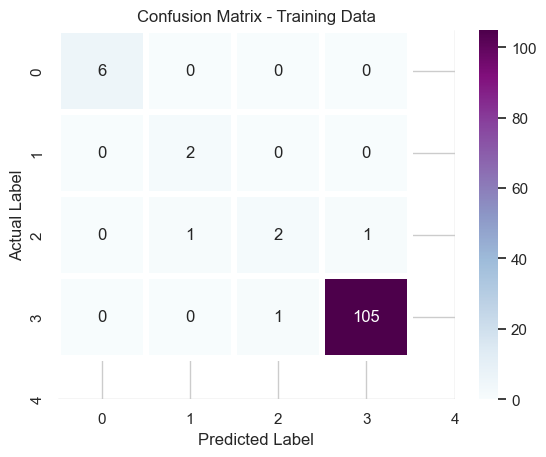

In [188]:
# Prediction using training data
pred = final_model_rf.predict(x_test)
pd.Series(final_model_rf.predict(x_test)).value_counts() # getting the count of each category
classnames = ['0','1','2','3','4']
confusionmatrix1 = confusion_matrix(y_test,final_model_rf.predict(x_test))
sns.heatmap(confusionmatrix1,annot=True,yticklabels=classnames,xticklabels=classnames,fmt='d',cmap="BuPu",linewidths=3)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Training Data")
plt.show()

## **eXtreme Gradient Boosting (XGBoost)** ##

In [189]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Creating an XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Training the model on the training data
xgb_model.fit(x_train, y_train)

print_score(xgb_model, x_train, y_train, x_test, y_test, train=False)


**********************************************************
                  TESTING RESULT
**********************************************************

ACCURACY: 95.76%

____________________________________________________________________

CLASSIFICATION REPORT:
               0      1     2        3      accuracy   macro avg  weighted avg
precision  0.857143  0.0  1.00    0.981481  0.957627    0.709656     0.959152 
recall     1.000000  0.0  0.25    1.000000  0.957627    0.562500     0.957627 
f1-score   0.923077  0.0  0.40    0.990654  0.957627    0.578433     0.950405 
support    6.000000  2.0  4.00  106.000000  0.957627  118.000000   118.000000 

____________________________________________________________________

CONFUSION MATRIX: 
 [[  6   0   0   0]
 [  1   0   0   1]
 [  0   2   1   1]
 [  0   0   0 106]]



In [190]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

classifier_xgb = xgb.XGBClassifier(random_state=1, n_jobs=1, max_depth=5, n_estimators=100)

params = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

# Instantiate the grid search model
xgb_grid_search = GridSearchCV(estimator=classifier_xgb, param_grid=params, cv = 10, n_jobs=10, verbose=1, scoring="accuracy")

xgb_grid_search.fit(inputs, target)

print('Best Score',xgb_grid_search.best_score_)

rf_best = xgb_grid_search.best_estimator_
print(rf_best)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
Best Score 0.9542080654587959
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=60, n_jobs=1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=1, reg_alpha=0, ...)


In [241]:
# Applying the best score derived by the GridSearchCV used earlier
# Best Score - RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=5, n_jobs=1, random_state=1)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from time import time

rf_xgb = RandomForestClassifier(xgb_grid_search.best_estimator_)
params = {
    'n_estimators': range(60, 220, 40),
}

rf_xgb_final_model = GridSearchCV(estimator=rf_xgb, param_grid=params, n_jobs=1, verbose=1, scoring="accuracy")

start = time()
rf_xgb_final_model.fit(x_train, y_train)
end = time()


# print_score(rf_xgb_final_model, x_train, y_train, x_test, y_test, train=True)
print_score(rf_xgb_final_model, x_train, y_train, x_test, y_test, train=False)

print("\n____________________________________________________________________\n")
print(f"BEST PARAMETERS: {rf_xgb_final_model.best_estimator_})")
print("\n____________________________________________________________________\n")

Fitting 5 folds for each of 4 candidates, totalling 20 fits

**********************************************************
                  TESTING RESULT
**********************************************************

ACCURACY: 95.76%

____________________________________________________________________

CLASSIFICATION REPORT:
            0    1       2          3      accuracy   macro avg  weighted avg
precision  1.0  0.0  0.500000    0.981481  0.957627    0.620370     0.949466 
recall     1.0  0.0  0.250000    1.000000  0.957627    0.562500     0.957627 
f1-score   1.0  0.0  0.333333    0.990654  0.957627    0.580997     0.952057 
support    6.0  2.0  4.000000  106.000000  0.957627  118.000000   118.000000 

____________________________________________________________________

CONFUSION MATRIX: 
 [[  6   0   0   0]
 [  0   0   1   1]
 [  0   2   1   1]
 [  0   0   0 106]]


____________________________________________________________________

BEST PARAMETERS: RandomForestClassifier())

__

#### *Confusion Matrix of Prediction for Final Model* ####

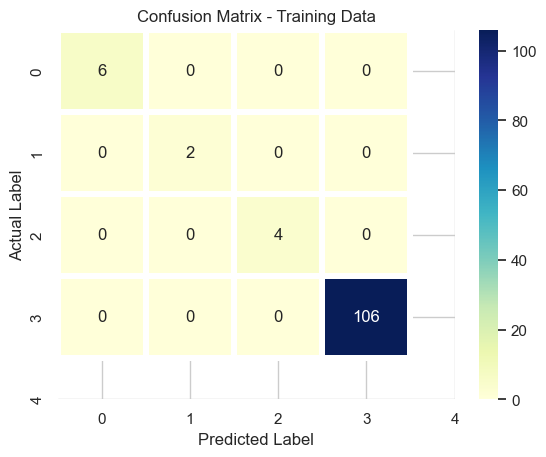

In [192]:
# Prediction using training data
# pred_xgb_final_model = rf_xgb_final_model.predict(x_test)
pd.Series(rf_xgb_final_model.predict(x_test)).value_counts() # getting the count of each category
classnames = ['0','1','2','3','4']
confusionmatrix1 = confusion_matrix(y_test,rf_xgb_final_model.predict(x_test))
sns.heatmap(confusionmatrix1,annot=True,yticklabels=classnames,xticklabels=classnames,fmt='d',cmap="YlGnBu",linewidths=3)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Training Data")
plt.show()

In [243]:
pred_rf_xgb = rf_xgb_final_model.predict(x_test)
d = "_"*70
s = "*"*70
sp = " "*20
print(f"\n{d}\n")
print(f"\n{s}")
print(f"{sp}Random Forest with XGB\n{s}\n")
print(f"ACCURACY: {accuracy_score(y_test, pred_rf_xgb) * 100:.2f}%")
print(f"\n{d}\n")


______________________________________________________________________


**********************************************************************
                    Random Forest with XGB
**********************************************************************

ACCURACY: 95.76%

______________________________________________________________________



#### ***The best accuracy that we are getting with Random Forest with XGB is 100%*** ####

### **PREDICTIONS BASED ON DIFFERENT MODELS** ###

In [194]:
# ldcdata[ldcdata['CATEGORY_N']==0] # Columns 586, 587 as Category 0
# ldcdata[ldcdata['CATEGORY_N']==1] # Columns 564, 565 as Category 1
# ldcdata[ldcdata['CATEGORY_N']==2] #  Columns 542, 543 as Category 2
# ldcdata[ldcdata['CATEGORY_N']==3] # Columns 530, 531 as Category 3
# ldcdata[ldcdata['CATEGORY_N']==4] # Columns 533, 534 as Category 4

# Index lists from the ldcdata dataframe that we will use for testing.
ind_list = [586, 587, 564, 565, 542, 543, 530, 531, 533, 534]
ind_list

ldcdata[ldcdata.index.isin(ind_list)]

AGE  ALBUMIN  ALKAL_PHOS  ALAN_AMIN  ASPA_AMINO  BILIRUBIN  CHOLI  \
530  65    33.0        74.3      13.2         16.8        4.1     7.46   
531  68    41.4       102.3      38.4         26.4        6.8     8.50   
533  47    22.5       124.0      79.5         46.7        2.3     6.83   
534  48    24.9       116.9      49.2         24.3        4.9     3.44   
542  23    47.0        19.1      38.9        164.2       17.0     7.09   
543  25    42.0        38.2      63.3        187.7       14.0     6.00   
564  29    41.0        43.1       2.4         83.5        6.0    11.49   
565  40    39.0        43.1      23.8        114.7       11.0     9.64   
586  39    34.0       137.8       4.8         35.6        9.0     3.65   
587  41    31.0        85.3       4.8         60.2      200.0     1.80   

     CHOLESTEROL  CREATININA  GAMMA_GLU_TRAN  PROTEIN  CATEGORY_N  SEX_N  
530     5.76          52.0           9.1       64.2         3        0    
531     6.79          59.0          23.8       68.9         3        0    
533     4.30         170.0         345.6       58.6         4        1    
534     5.25          29.0          83.0       47.8         4        1    
542     3.20          79.3          90.4       70.1         2        1    
543     4.28          66.9          40.2       70.5         2        1    
564     5.42          55.2         130.0       66.5         1        1    
565     4.20          70.9         127.3       81.3         1        1    
586     4.82         519.0         133.4       57.5         0        1    
587     5.34         106.4         151.0       71.8         0        1

##### *The Column data for the Categorical columns is decoded by LabelEncoder in the following way:* #####
| **Column Name** | **1st Category** | **2nd Category** | **3rd Category** | **4th Category** | **5th Category** |
| --- | --- | --- | --- | --- | --- |
| **CATEGORY_N** | 0 - cirrhosis | 1 - fibrosis | 2 - hepatitis | 3 - no_disease | 4 - suspect_disease |
| **SEX_N** | 0 - f | 1 - m |||||

In [216]:
# The model takes into consideration 13 features/colums for prediction of the Liver Disease Category i.e. "0" - "cirrhosis", "1" - "fibrosis", "2" - "hepatitis", "3" - "no_disease", "4" - "suspect_disease"
rf_prediction = final_model_rf.predict([['39','34.0','137.8','4.8','35.6','9.0','3.65','4.82','519.0','133.4','57.5','1'],['41','31.0','85.3','4.8','60.2','200.0','1.80','5.34','106.4','151.0','71.8','1'],['29','41.0','43.1','2.4','83.5','6.0','11.49','5.42','55.2','130.0','66.5','1'],['40','39.0','43.1','23.8','114.7','11.0','9.64','4.20','70.9','127.3','81.3','1'],['23','47.0','19.1','38.9','164.2','17.0','7.09','3.20','79.3','90.4','70.1','1'],['25','42.0','38.2','63.3','187.7','14.0','6.00','4.28','66.9','40.2','70.5','1'],['65','33.0','74.3','13.2','16.8','4.1','7.46','5.76','52.0','9.1','64.2','0'],['68','41.4','102.3','38.4','26.4','6.8','8.50','6.79','59.0','23.8','68.9','0'],['47','22.5','124.0','79.5','46.7','2.3','6.83','4.30','170.0','345.6','58.6','1'],['48','24.9','116.9','49.2','24.3','4.9','3.44','5.25','29.0','83.0','47.8','1']])
print(f"The 'Random Rorest' predication based on the initial model 'prediction' is: {rf_prediction[0], rf_prediction[1], rf_prediction[2], rf_prediction[3], rf_prediction[4], rf_prediction[5], rf_prediction[6], rf_prediction[7], rf_prediction[8], rf_prediction[9]}")

# The model takes into consideration 13 features/colums for prediction of the Liver Disease Category i.e. "0" - "cirrhosis", "1" - "fibrosis", "2" - "hepatitis", "3" - "no_disease", "4" - "suspect_disease"
xgb_prediction = rf_xgb_final_model.predict([['39','34.0','137.8','4.8','35.6','9.0','3.65','4.82','519.0','133.4','57.5','1'],['41','31.0','85.3','4.8','60.2','200.0','1.80','5.34','106.4','151.0','71.8','1'],['29','41.0','43.1','2.4','83.5','6.0','11.49','5.42','55.2','130.0','66.5','1'],['40','39.0','43.1','23.8','114.7','11.0','9.64','4.20','70.9','127.3','81.3','1'],['23','47.0','19.1','38.9','164.2','17.0','7.09','3.20','79.3','90.4','70.1','1'],['25','42.0','38.2','63.3','187.7','14.0','6.00','4.28','66.9','40.2','70.5','1'],['65','33.0','74.3','13.2','16.8','4.1','7.46','5.76','52.0','9.1','64.2','0'],['68','41.4','102.3','38.4','26.4','6.8','8.50','6.79','59.0','23.8','68.9','0'],['47','22.5','124.0','79.5','46.7','2.3','6.83','4.30','170.0','345.6','58.6','1'],['48','24.9','116.9','49.2','24.3','4.9','3.44','5.25','29.0','83.0','47.8','1']])
print(f"The 'eXtreme Gradient Boosting' predication based on the initial model 'prediction' is: {xgb_prediction[0], xgb_prediction[1], xgb_prediction[2], xgb_prediction[3], xgb_prediction[4], xgb_prediction[5], xgb_prediction[6], xgb_prediction[7], xgb_prediction[8], xgb_prediction[9]}")


# Note: This prediction is **correct** as these are records with index nos 586, 587, 564, 565, 542, 543, 530, 531, 533 and 534 respectively in the dataframe ldcdata.

The 'Random Rorest' predication based on the initial model 'prediction' is: (0, 0, 1, 1, 2, 2, 3, 3, 4, 4)
The 'eXtreme Gradient Boosting' predication based on the initial model 'prediction' is: (0, 0, 1, 1, 2, 2, 3, 3, 4, 4)


In [232]:
import pickle
pickle.dump(rf_xgb_final_model, open('RF_XGB_MODEL.pkl', 'wb'))
pickled_rf_xgb_model = pickle.load(open('RF_XGB_MODEL.pkl', 'rb'))

In [248]:
import pickle
pickle.dump(final_model_rf, open('RF_MODEL.pkl', 'wb'))
pickled_rf_model = pickle.load(open('RF_MODEL.pkl', 'rb'))

In [249]:
# The model takes into consideration 13 features/colums for prediction of the Liver Disease Category i.e. "0" - "cirrhosis", "1" - "fibrosis", "2" - "hepatitis", "3" - "no_disease", "4" - "suspect_disease"
xgb_prediction = pickled_rf_xgb_model.predict([['39','34.0','137.8','4.8','35.6','9.0','3.65','4.82','519.0','133.4','57.5','1'],['41','31.0','85.3','4.8','60.2','200.0','1.80','5.34','106.4','151.0','71.8','1'],['29','41.0','43.1','2.4','83.5','6.0','11.49','5.42','55.2','130.0','66.5','1'],['40','39.0','43.1','23.8','114.7','11.0','9.64','4.20','70.9','127.3','81.3','1'],['23','47.0','19.1','38.9','164.2','17.0','7.09','3.20','79.3','90.4','70.1','1'],['25','42.0','38.2','63.3','187.7','14.0','6.00','4.28','66.9','40.2','70.5','1'],['65','33.0','74.3','13.2','16.8','4.1','7.46','5.76','52.0','9.1','64.2','0'],['68','41.4','102.3','38.4','26.4','6.8','8.50','6.79','59.0','23.8','68.9','0'],['47','22.5','124.0','79.5','46.7','2.3','6.83','4.30','170.0','345.6','58.6','1'],['48','24.9','116.9','49.2','24.3','4.9','3.44','5.25','29.0','83.0','47.8','1']])
print(f"The 'eXtreme Gradient Boosting' predication based on the initial model 'prediction' is: {xgb_prediction[0], xgb_prediction[1], xgb_prediction[2], xgb_prediction[3], xgb_prediction[4], xgb_prediction[5], xgb_prediction[6], xgb_prediction[7], xgb_prediction[8], xgb_prediction[9]}")

rf_pred = pickled_rf_model.predict([['39','34.0','137.8','4.8','35.6','9.0','3.65','4.82','519.0','133.4','57.5','1'],['41','31.0','85.3','4.8','60.2','200.0','1.80','5.34','106.4','151.0','71.8','1'],['29','41.0','43.1','2.4','83.5','6.0','11.49','5.42','55.2','130.0','66.5','1'],['40','39.0','43.1','23.8','114.7','11.0','9.64','4.20','70.9','127.3','81.3','1'],['23','47.0','19.1','38.9','164.2','17.0','7.09','3.20','79.3','90.4','70.1','1'],['25','42.0','38.2','63.3','187.7','14.0','6.00','4.28','66.9','40.2','70.5','1'],['65','33.0','74.3','13.2','16.8','4.1','7.46','5.76','52.0','9.1','64.2','0'],['68','41.4','102.3','38.4','26.4','6.8','8.50','6.79','59.0','23.8','68.9','0'],['47','22.5','124.0','79.5','46.7','2.3','6.83','4.30','170.0','345.6','58.6','1'],['48','24.9','116.9','49.2','24.3','4.9','3.44','5.25','29.0','83.0','47.8','1']])
print(f"The 'Random Forest' predication based on the initial model 'prediction' is: {rf_pred[0], rf_pred[1], rf_pred[2], rf_pred[3], rf_pred[4], rf_pred[5], rf_pred[6], rf_pred[7], rf_pred[8], rf_pred[9]}")


The 'eXtreme Gradient Boosting' predication based on the initial model 'prediction' is: (0, 0, 1, 1, 2, 2, 3, 3, 4, 4)
The 'Random Forest' predication based on the initial model 'prediction' is: (0, 0, 1, 1, 2, 2, 3, 3, 4, 4)


In [236]:
xgb_prediction = pickled_rf_xgb_model.predict([['39','34.0','137.8','4.8','35.6','9.0','3.65','4.82','519.0','133.4','57.5','1']])
xgb_prediction[0]

0

In [237]:
Age = 48
Albumin = 24.9
Alkaline_Phosphatase = 116.9
Alanine_Aminotransferase = 49.2
Aspartate_Aminotransferase = 24.3
Bilirubin = 4.9
Cholinesterase = 3.44
Cholesterol = 5.25
Creatinina = 29.0
Gamma_Glutamyl_Transferase = 83.0
Protein = 47.8
Sex = 1

results = [[Age, Albumin, Alkaline_Phosphatase, Alanine_Aminotransferase, Aspartate_Aminotransferase, Bilirubin, Cholinesterase, Cholesterol, Creatinina, Gamma_Glutamyl_Transferase, Protein, Sex]]

In [238]:
pre = pickled_rf_xgb_model.predict(results)
pre[0]

4